![human heart illustration.jpeg](attachment:a5f4d8bc-cbed-4b0d-a388-dc71b6e45f34.jpeg)

<a id="0"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>

<div style = 'border : 3px solid non; background-color:#f2f2f2
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
    
* **[1. A Brief Explanation](#1)**
    

   - What is this project about?  
    
    
* **[2. Import Libraries ](#2)**
    
      
   - Libraries that we need
    
  
* **[3. Import Dataset ](#3)**  
    
   
   - The main dataset  
    
   
* **[4. Data Preprocessing ](#4)**
    
    
   - Data description
    
    
   - Variable explanation
    
    
   - Noise Detection
    
    
   - Separation dataset
    
    
   - Visualization
    
    
   - Normalize dataset
    
   
* **[5. Machine Learning Models ](#5)**
    
    
   - KNN + tune hyperparameters
    
    
   - SVM + tune hyperparameters
    
    
   - Decision Trees + tune hyperparameters
    
    
   - Random Forest + tune hyperparameters
      
    
* **[6. Conclusion ](#6)**
    

<a id="1"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Brief Explanation </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is this project about?**

  - In this project, heart data is used, the target of which is in two classes. People who have heart disease and people who don't. The importance of this type of project in the medical world is very high and it should be given more attention. In this kernel, I create a predictive model with the help of different classification algorithms so that people can be predicted to have or not have a disease.

<a id="2"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Libraries that we need**

  - In this project, I used numpy, pandas, matplotlib, seaborn, colorma and some sklearn packages.
    


In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.5 MB/s eta 0:00:00


In [2]:
!pip install colorama


In [25]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import colorama
from colorama import Back
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

<a id="3"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

* **[Table of Content](#0)**

In [26]:
Main_Dataset = pd.read_csv('/content/heart_disease_final_filled.csv')
Main_Dataset = pd.DataFrame(Main_Dataset)

In [28]:
print(Main_Dataset.shape)
Main_Dataset.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})


(19787, 13)


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Note:**

  - The samples in this dataset are really few and may cause challenges in the work. Only 303 examples are not enough.

<a id="4"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing </p>

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Data desciption:**

  - With a simple, easy an excellent "def describe" function that is below, we can extract some interesting results.
    Such as name of variables, type of variables, count of them, how many unique values are here, count of missing values and min,max of each column.

In [29]:
def describe(Main_Dataset):


    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    min_ = []
    max_ = []


    for item in Main_Dataset.columns:
        variables.append(item)
        dtypes.append(Main_Dataset[item].dtype)
        count.append(len(Main_Dataset[item]))
        unique.append(len(Main_Dataset[item].unique()))
        missing.append(Main_Dataset[item].isna().sum())

        if Main_Dataset[item].dtypes == 'float64' or Main_Dataset[item].dtypes == 'int64':
            min_.append(Main_Dataset[item].min())
            max_.append(Main_Dataset[item].max())
        else:
            min_.append('Str')
            max_.append('Str')


    output = pd.DataFrame({
        'variable': variables,
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })

    return output

In [30]:
Styles = [dict(selector = "caption",
               props = [("color", "white"),
                        ("text-align", "center"),
                       ('font-size', '15pt'),
                       ('background-color', '#E72B3B')])]

In [31]:
desc_df = describe(Main_Dataset)
desc_df = desc_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

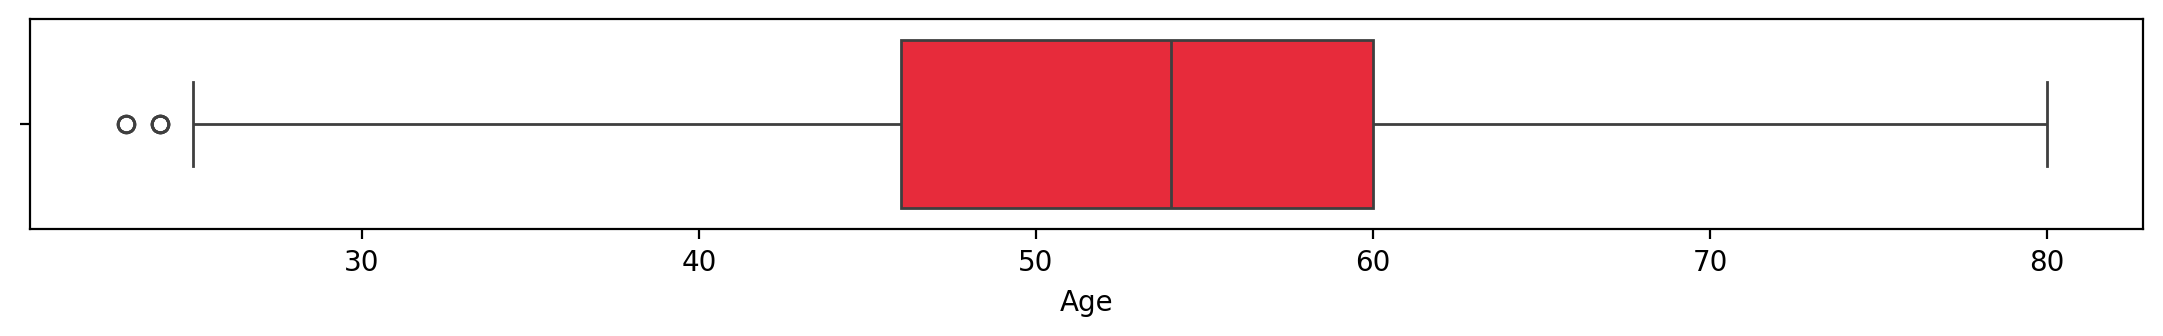

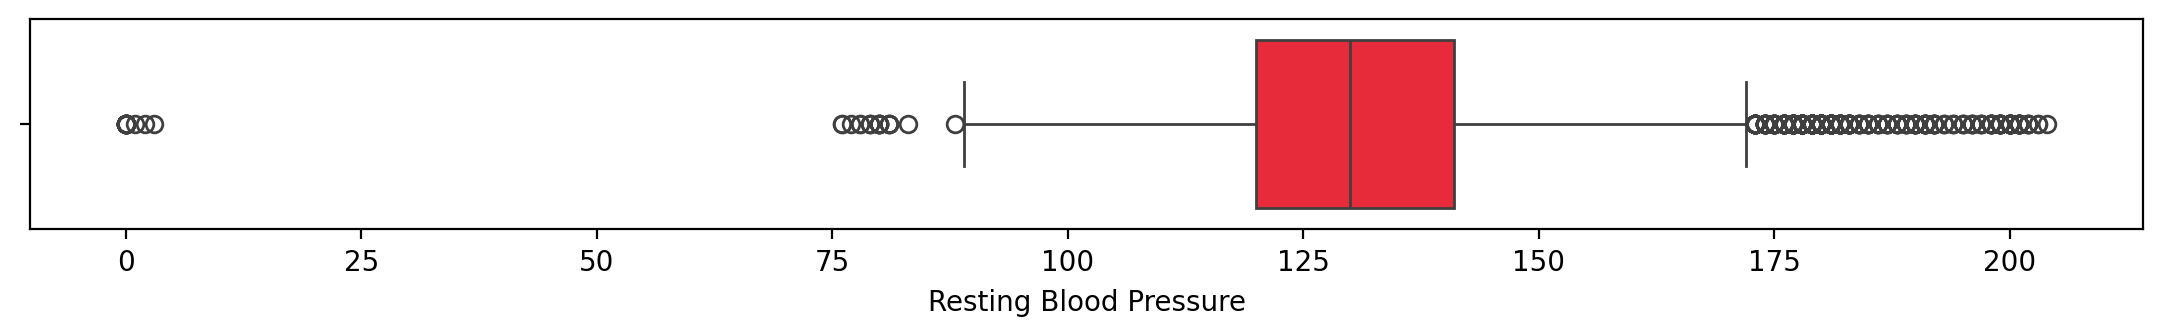

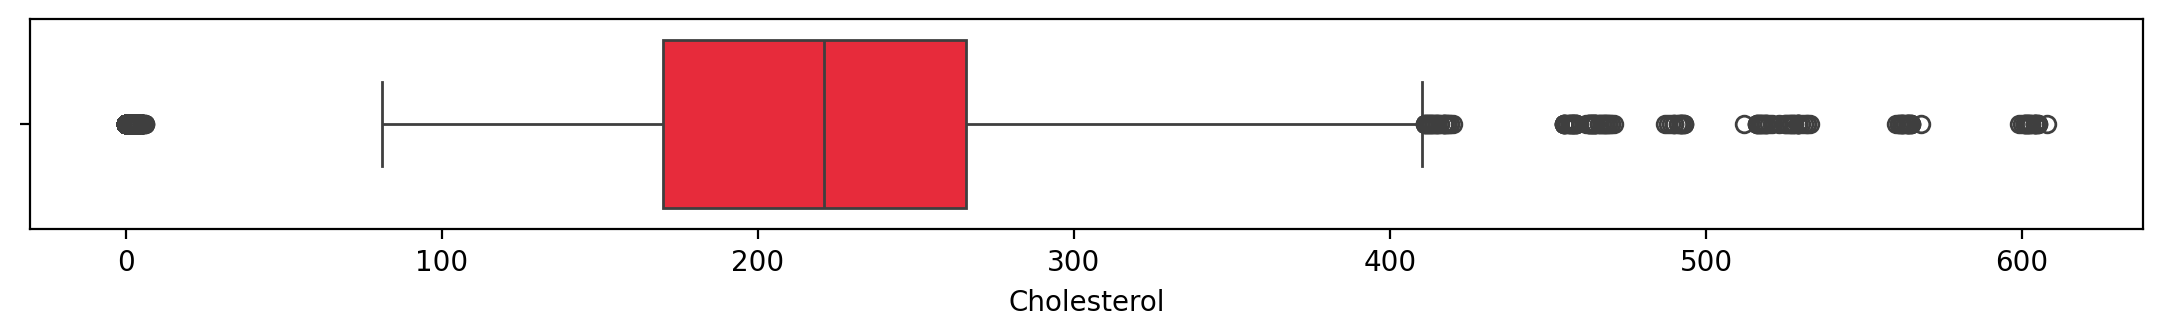

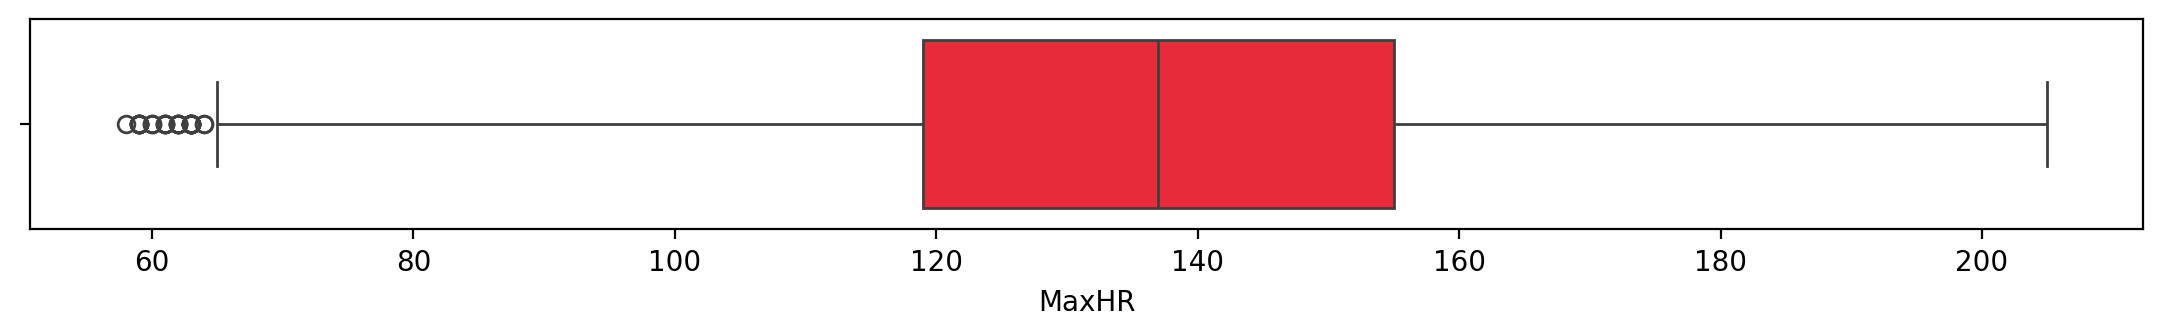

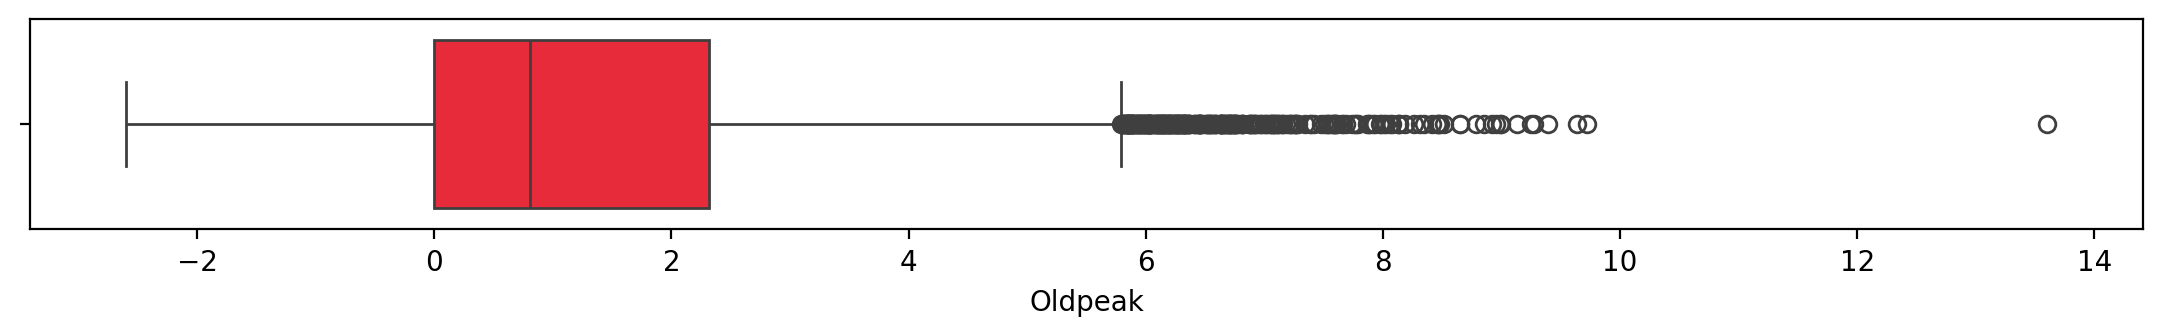

In [32]:
Numerical = ['Age', 'Resting Blood Pressure','Cholesterol','MaxHR','Oldpeak']
i = 0
while i < 5:
    fig = plt.figure(figsize = [30,3], dpi=200)
    plt.subplot(2,2,1)
    sns.boxplot(x = Numerical[i], data = Main_Dataset,
           boxprops = dict(facecolor = "#E72B3B"))
    i += 1
    plt.show()

In [33]:
Chol_noise = Main_Dataset[Main_Dataset["Cholesterol"]>500].index
Chol_noise

Index([   30,    76,   149,   614,  1026,  1118,  1517,  1840,  2098,  2573,
        3170,  3556,  3607,  3871,  4241,  4752,  5145,  5156,  5810,  5850,
        5870,  6028,  6033,  6207,  6455,  6519,  6926,  6989,  7012,  7290,
        7465,  7674,  8330,  8547,  9307,  9339, 10052, 10241, 10262, 10377,
       10483, 10508, 10629, 11084, 11142, 11823, 12886, 12942, 13263, 13303,
       13612, 13684, 14238, 14243, 14277, 14445, 14623, 14798, 14937, 15048,
       15160, 15164, 15215, 16287, 16413, 16674, 16776, 17010, 17149, 17187,
       17379, 17533, 17553, 17862, 18105, 18375, 18572, 18682, 18860, 18994,
       19086, 19203, 19318, 19334, 19345, 19359, 19642],
      dtype='int64')

In [34]:
Main_Dataset.drop(index=[85], inplace=True)
Main_Dataset.shape

(19786, 13)

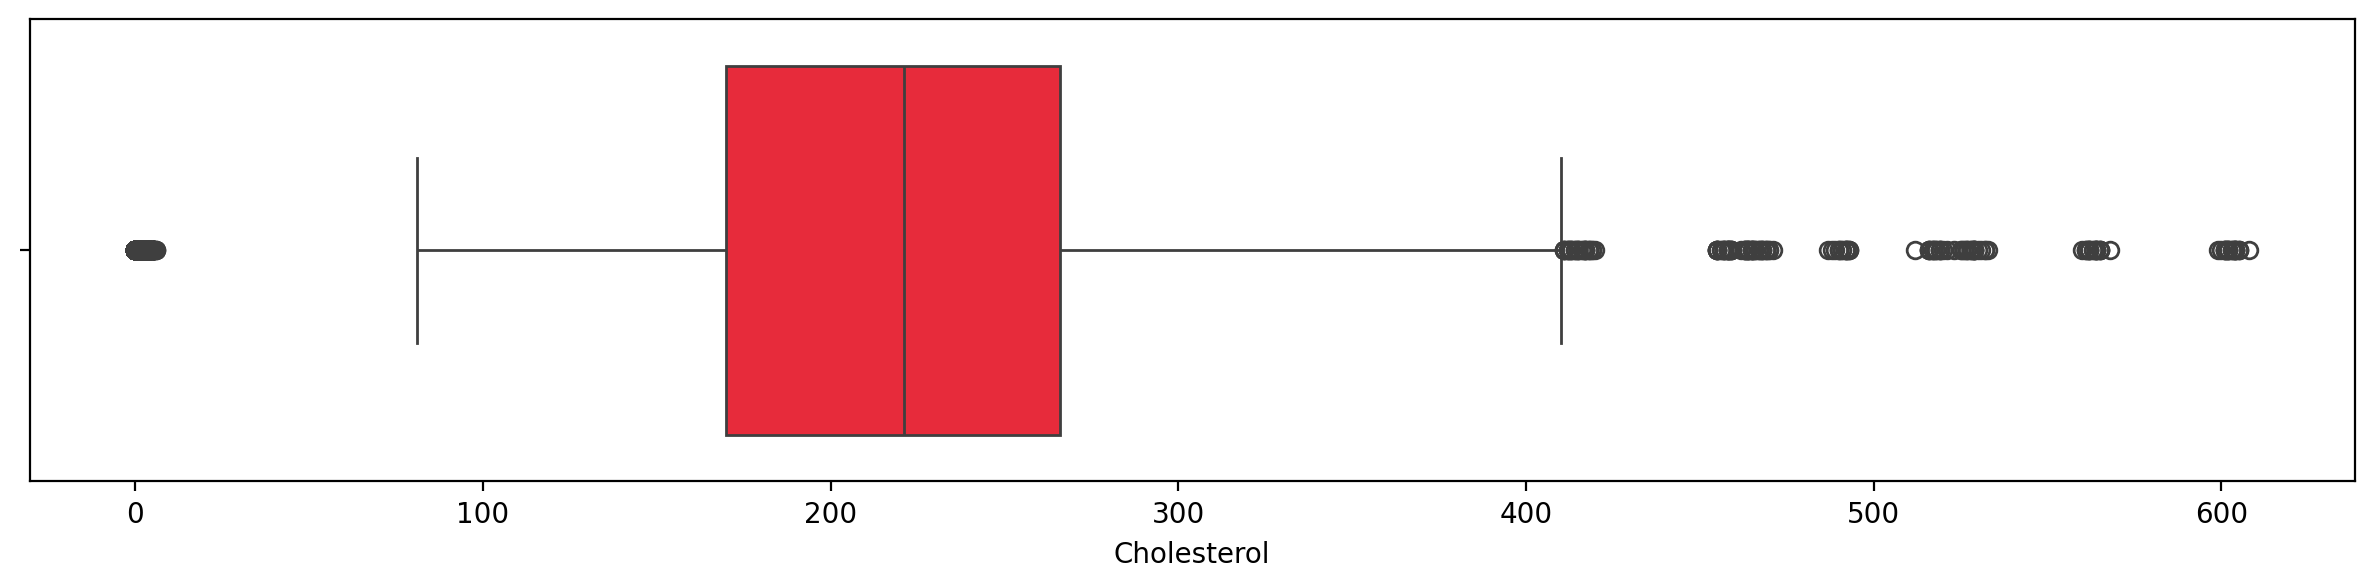

In [35]:
fig = plt.figure(figsize = [15,3], dpi=200)
sns.boxplot(x = 'Cholesterol', data = Main_Dataset,
        boxprops = dict(facecolor = "#E72B3B"))

plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Seperation Dataset:**

  - Let's devide dataset to two parts for analysis. 1: People that don't have heart disease and 2: People who have it.



In [36]:
Target_0_data = Main_Dataset[Main_Dataset["Output"]==0]
Target_0_data = pd.DataFrame(Target_0_data)
Target_1_data = Main_Dataset[Main_Dataset["Output"]==1]
Target_1_data = pd.DataFrame(Target_1_data)
print("The shape of data when target is '0': Not disease",Target_0_data.shape)
print("The shape of data when target is '1': Disease",Target_1_data.shape)

The shape of data when target is '0': Not disease (8828, 13)
The shape of data when target is '1': Disease (10958, 13)


In [37]:
Target_0_data.sort_values(by=['Age'], inplace=True)
Target_1_data.sort_values(by=['Age'], inplace=True)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Visualization:**

  - In this part of visualization, I use "sns.barplot" for categorical variables vs "age".
    We can see how the rate of change is affected by age.



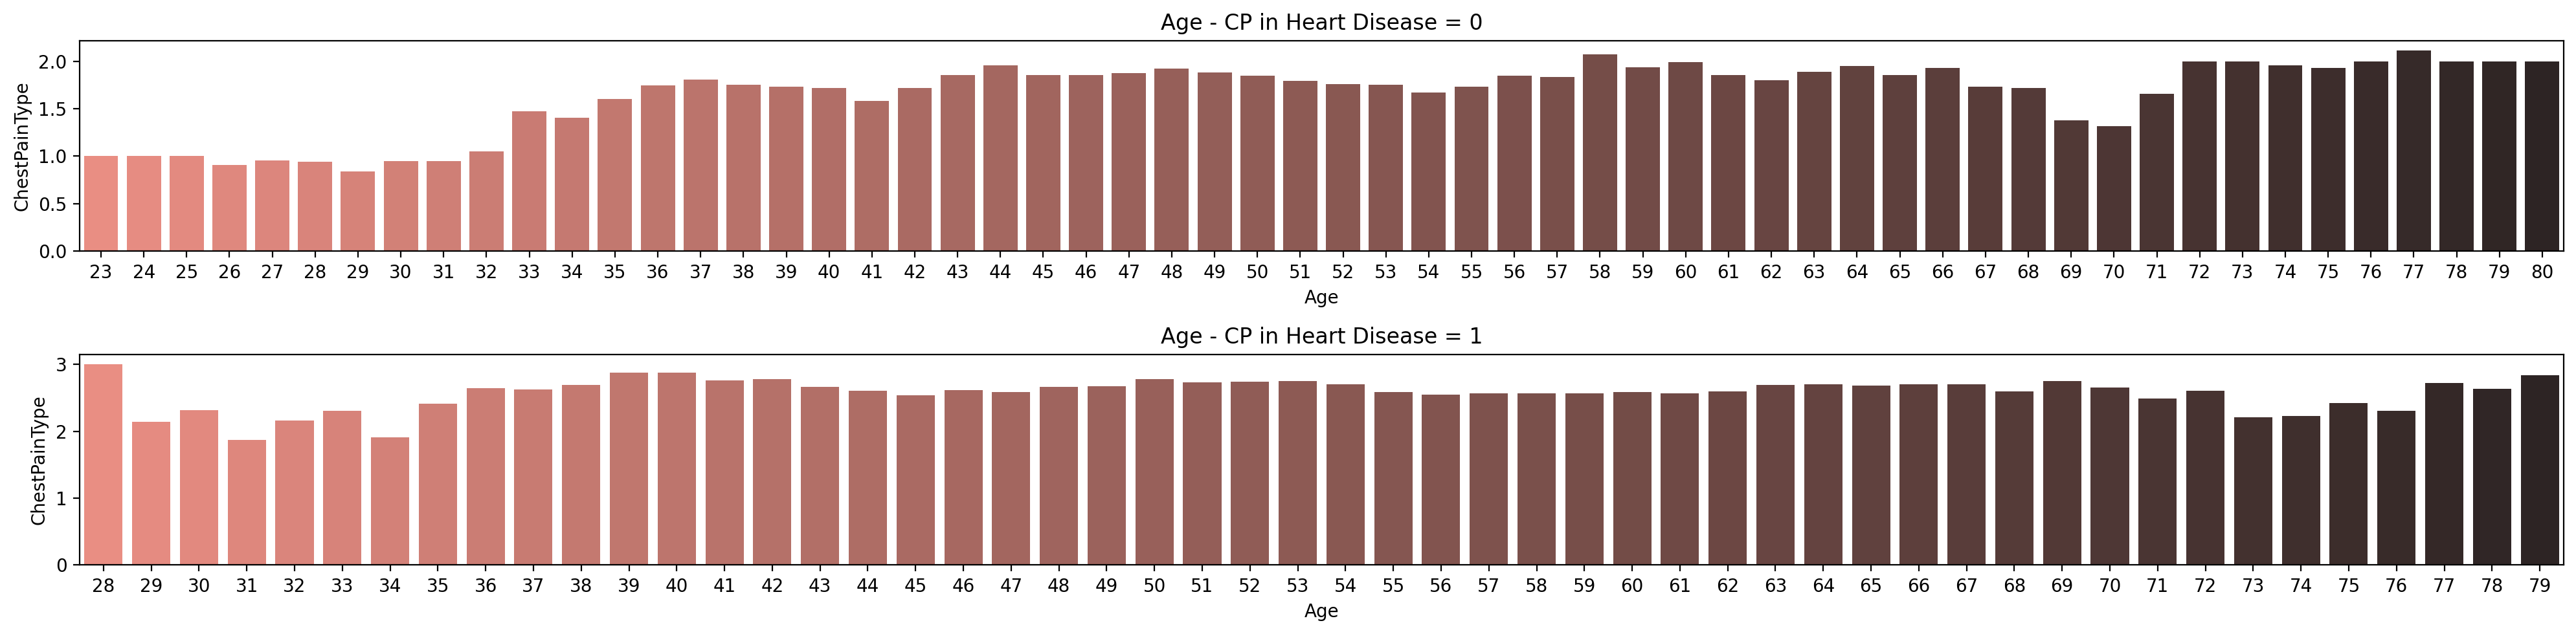

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5), dpi=200)
sns.barplot(x= Target_0_data['Age'], y= Target_0_data['ChestPainType'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - CP in Heart Disease = 0')
sns.barplot(x= Target_1_data['Age'], y= Target_1_data['ChestPainType'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - CP in Heart Disease = 1')


plt.tight_layout()

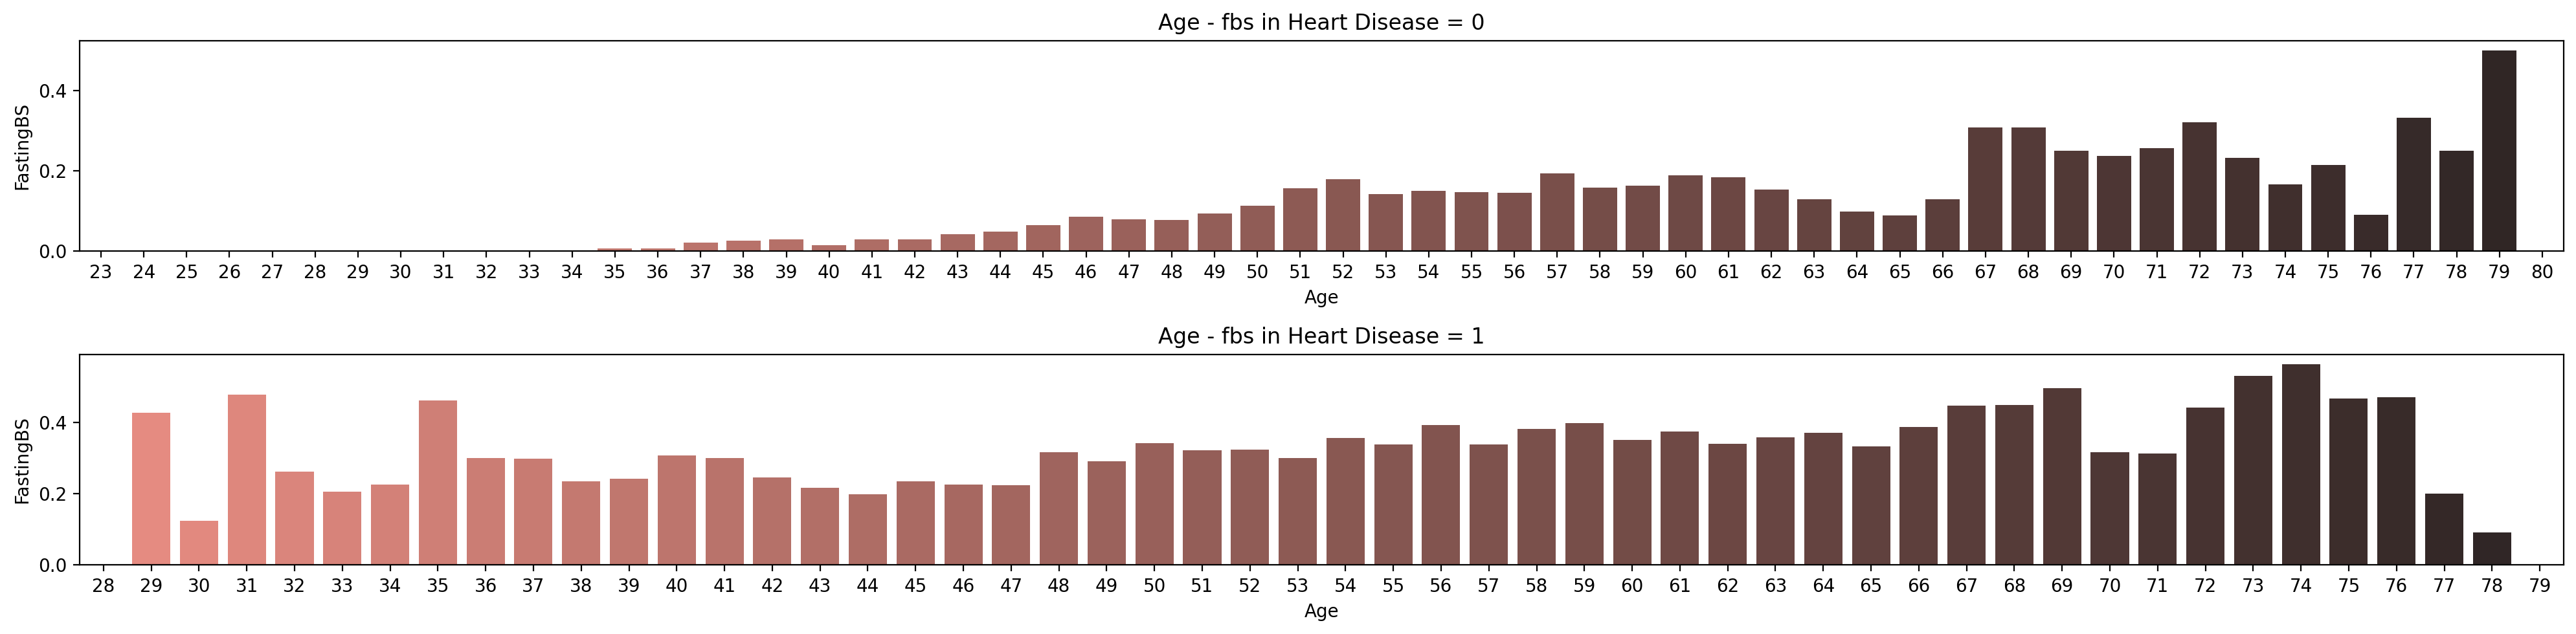

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5), dpi=200)
sns.barplot(x= Target_0_data['Age'], y= Target_0_data['FastingBS'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - fbs in Heart Disease = 0')
sns.barplot(x= Target_1_data['Age'], y= Target_1_data['FastingBS'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - fbs in Heart Disease = 1')


plt.tight_layout()

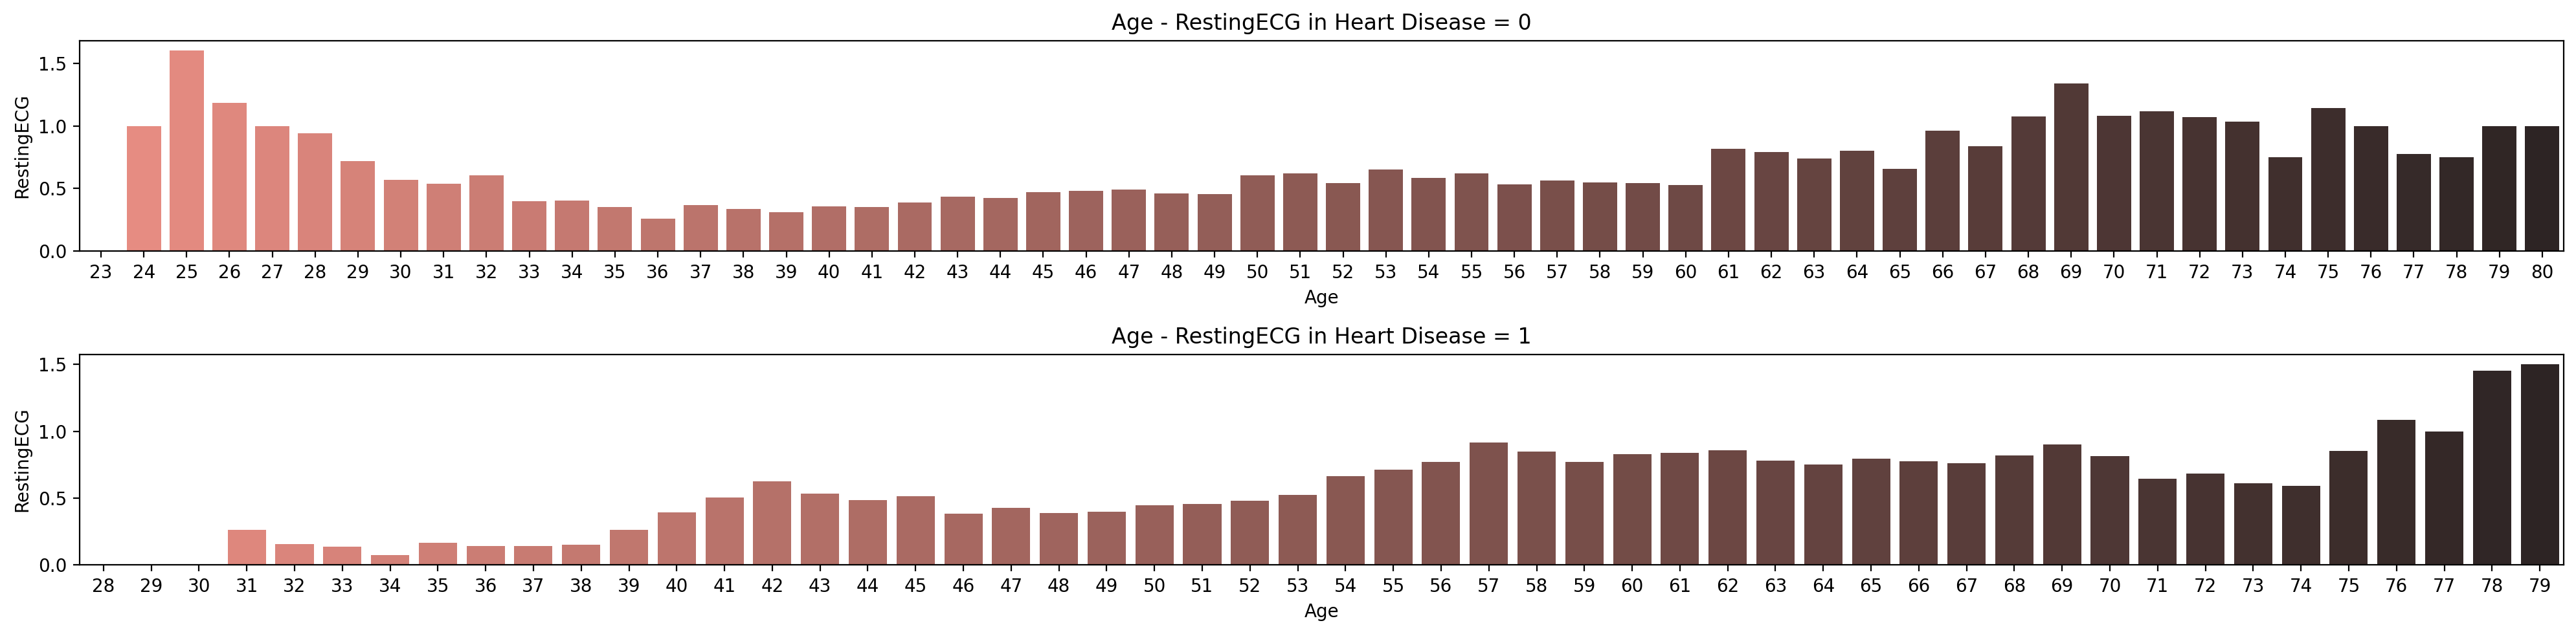

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5), dpi=200)
sns.barplot(x= Target_0_data['Age'], y= Target_0_data['RestingECG'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - RestingECG in Heart Disease = 0')
sns.barplot(x= Target_1_data['Age'], y= Target_1_data['RestingECG'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - RestingECG in Heart Disease = 1')


plt.tight_layout()

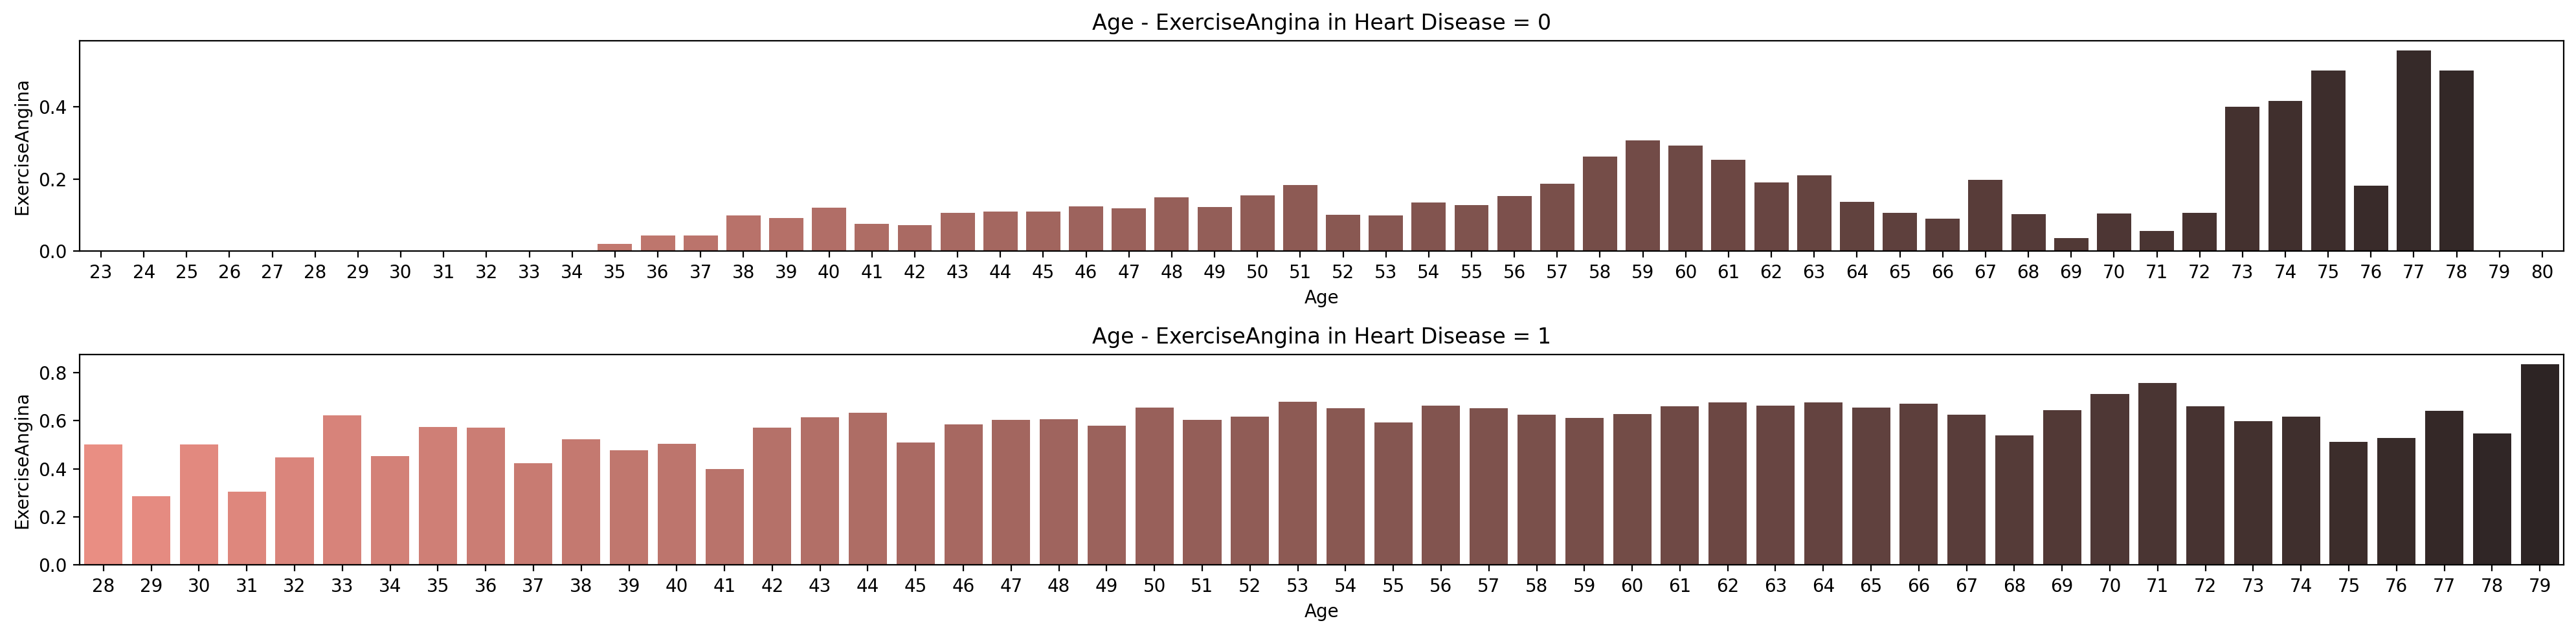

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5), dpi=200)
sns.barplot(x= Target_0_data['Age'], y= Target_0_data['ExerciseAngina'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - ExerciseAngina in Heart Disease = 0')
sns.barplot(x= Target_1_data['Age'], y= Target_1_data['ExerciseAngina'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - ExerciseAngina in Heart Disease = 1')


plt.tight_layout()

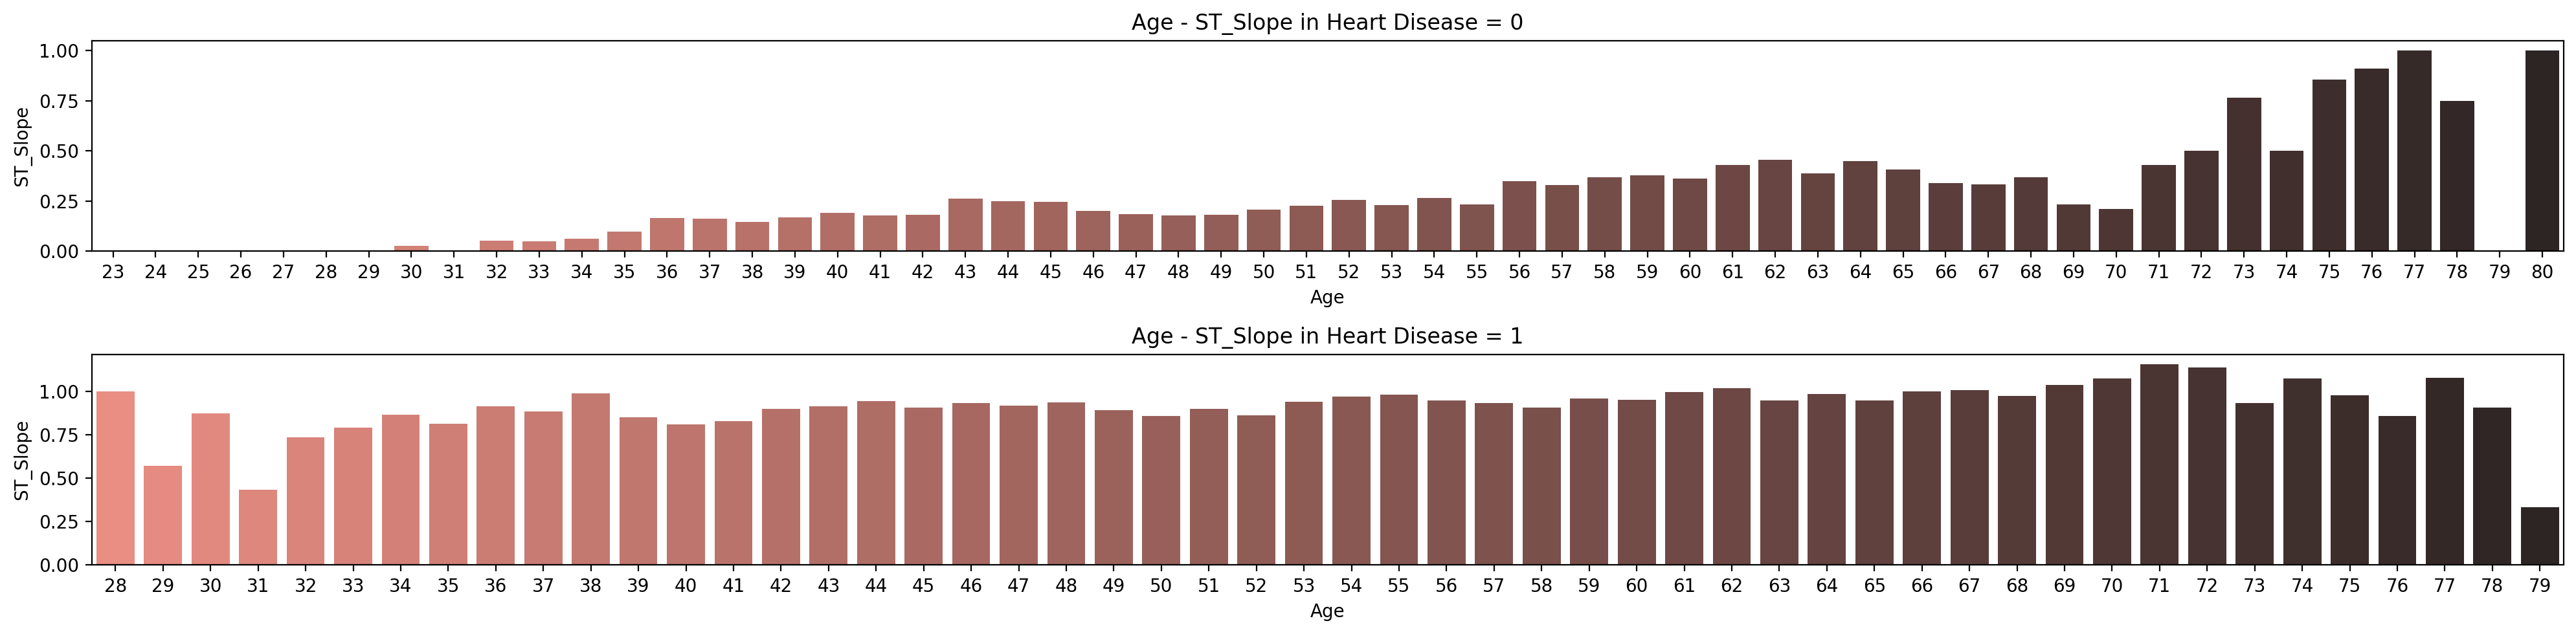

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5), dpi=200)
sns.barplot(x= Target_0_data['Age'], y= Target_0_data['ST_Slope'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - ST_Slope in Heart Disease = 0')
sns.barplot(x= Target_1_data['Age'], y= Target_1_data['ST_Slope'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - ST_Slope in Heart Disease = 1')


plt.tight_layout()

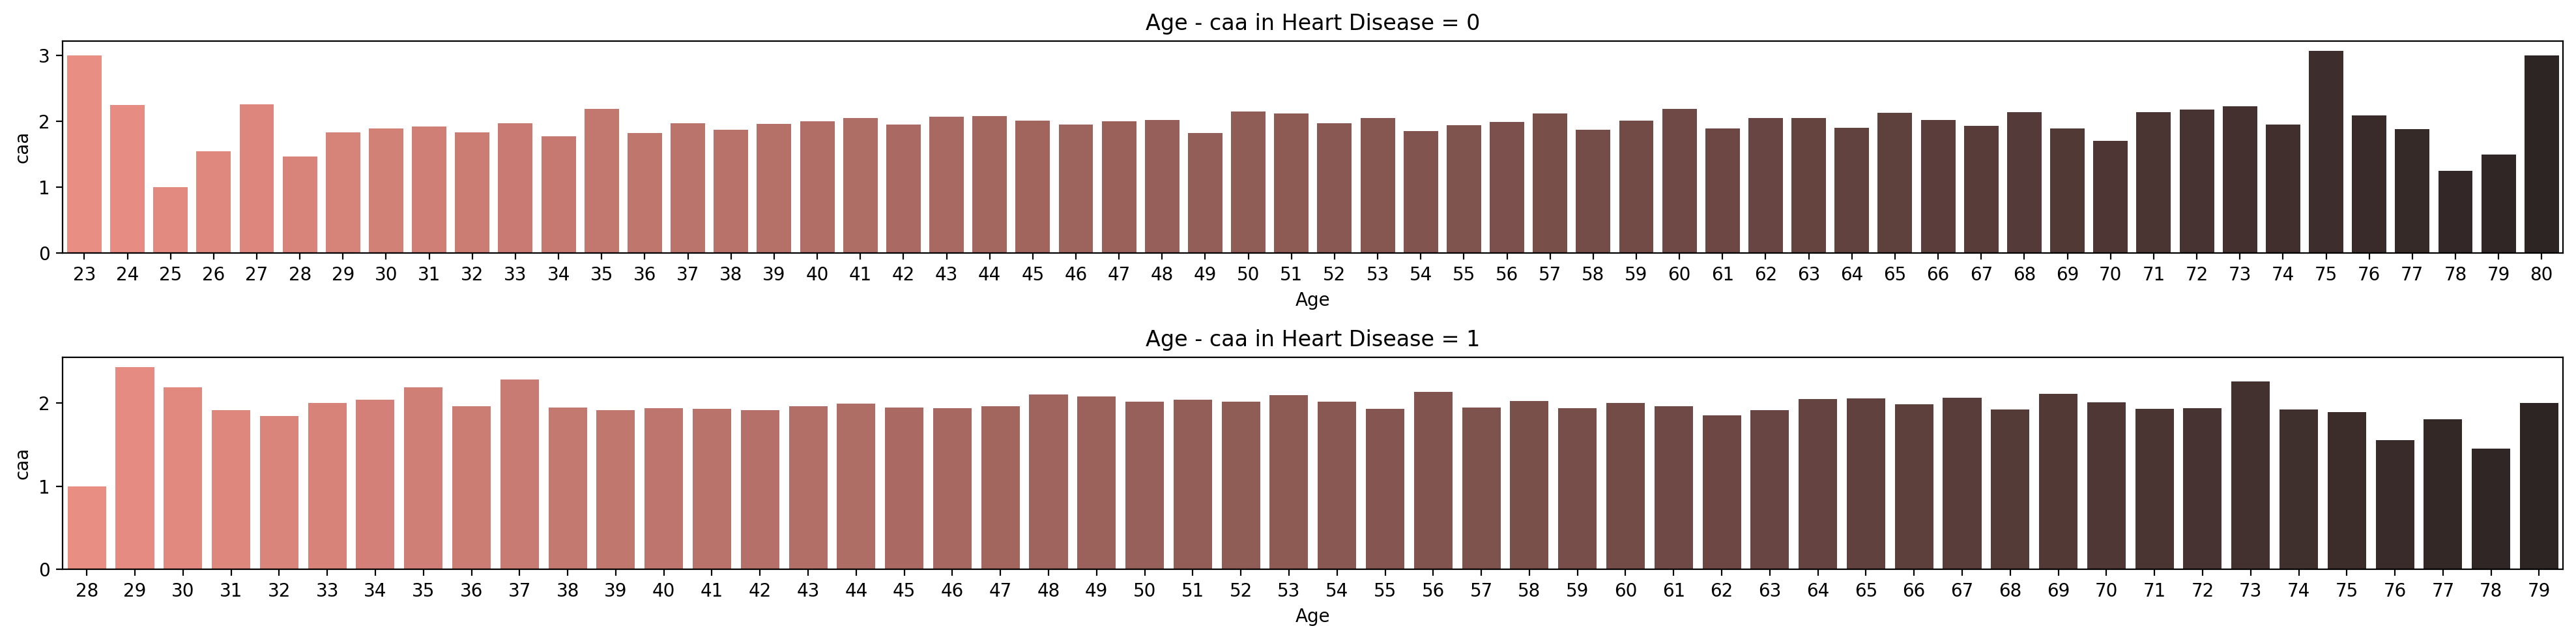

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5), dpi=200)
sns.barplot(x= Target_0_data['Age'], y= Target_0_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - caa in Heart Disease = 0')
sns.barplot(x= Target_1_data['Age'], y= Target_1_data['caa'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - caa in Heart Disease = 1')


plt.tight_layout()

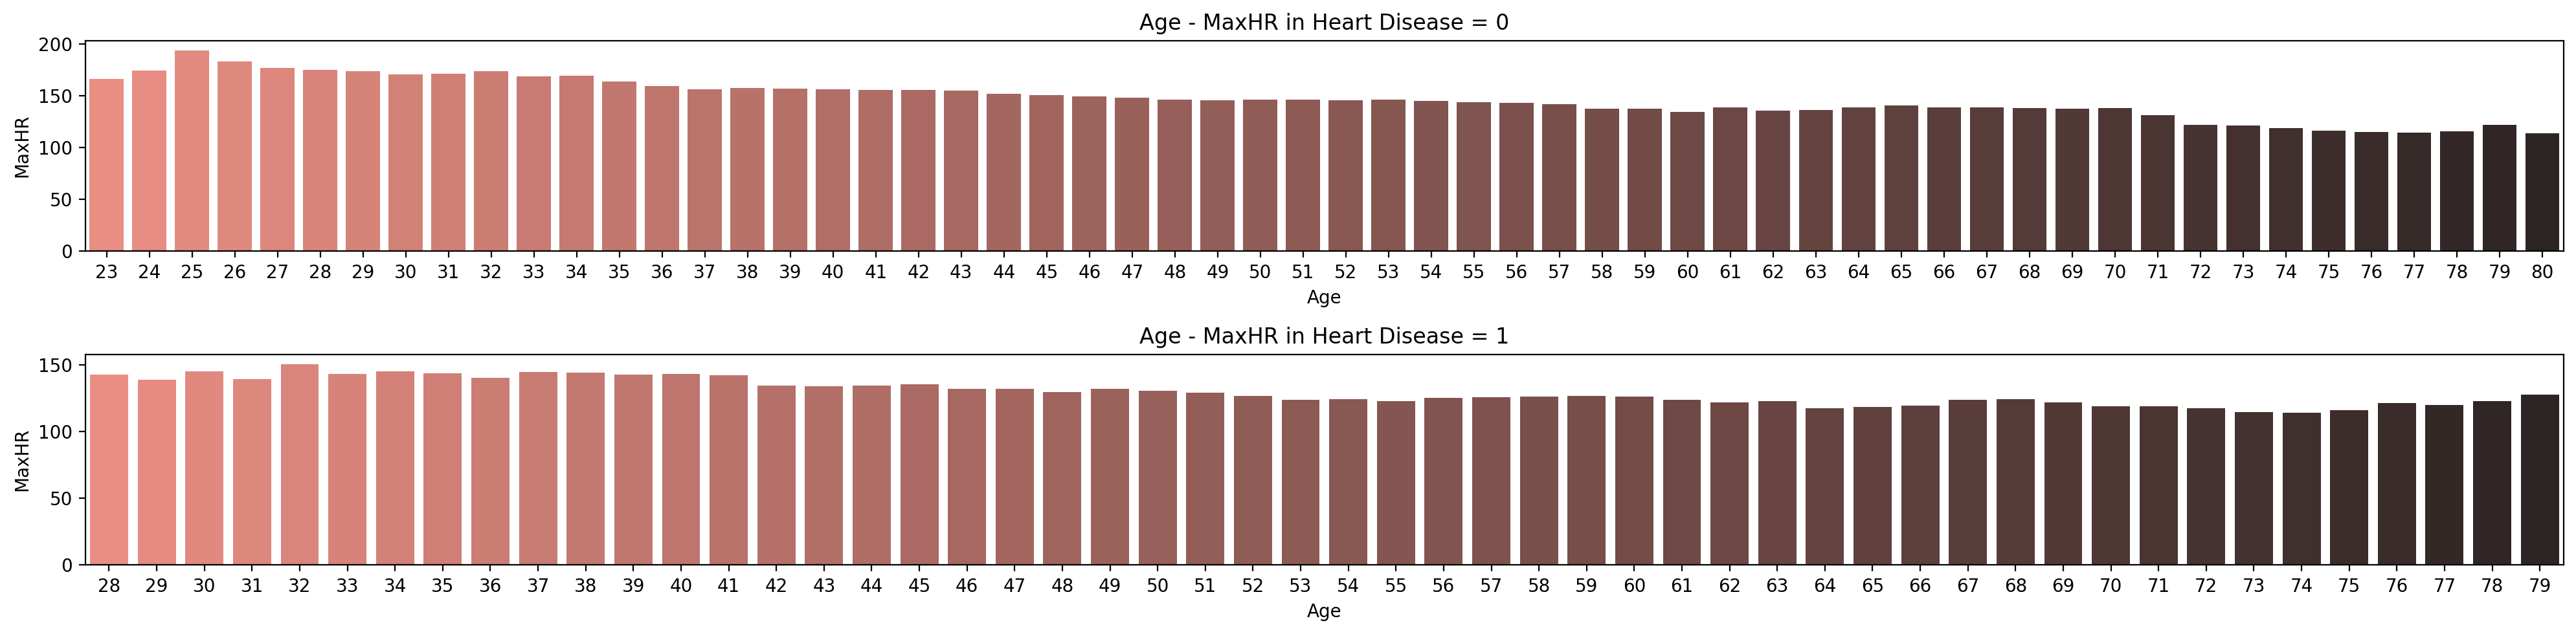

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 5), dpi=200)
sns.barplot(x= Target_0_data['Age'], y= Target_0_data['MaxHR'], errorbar=None,
            palette="dark:salmon_r",ax= axes[0]).set(title='Age - MaxHR in Heart Disease = 0')
sns.barplot(x= Target_1_data['Age'], y= Target_1_data['MaxHR'], errorbar=None,
            palette="dark:salmon_r",ax= axes[1]).set(title='Age - MaxHR in Heart Disease = 1')


plt.tight_layout()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>



  - In this part of the visualization, I use a "scatter plot" versus a "line plot" to compare people who have heart disease and people who don't.
    Of course we can see how the rate of change is affected by age.
    



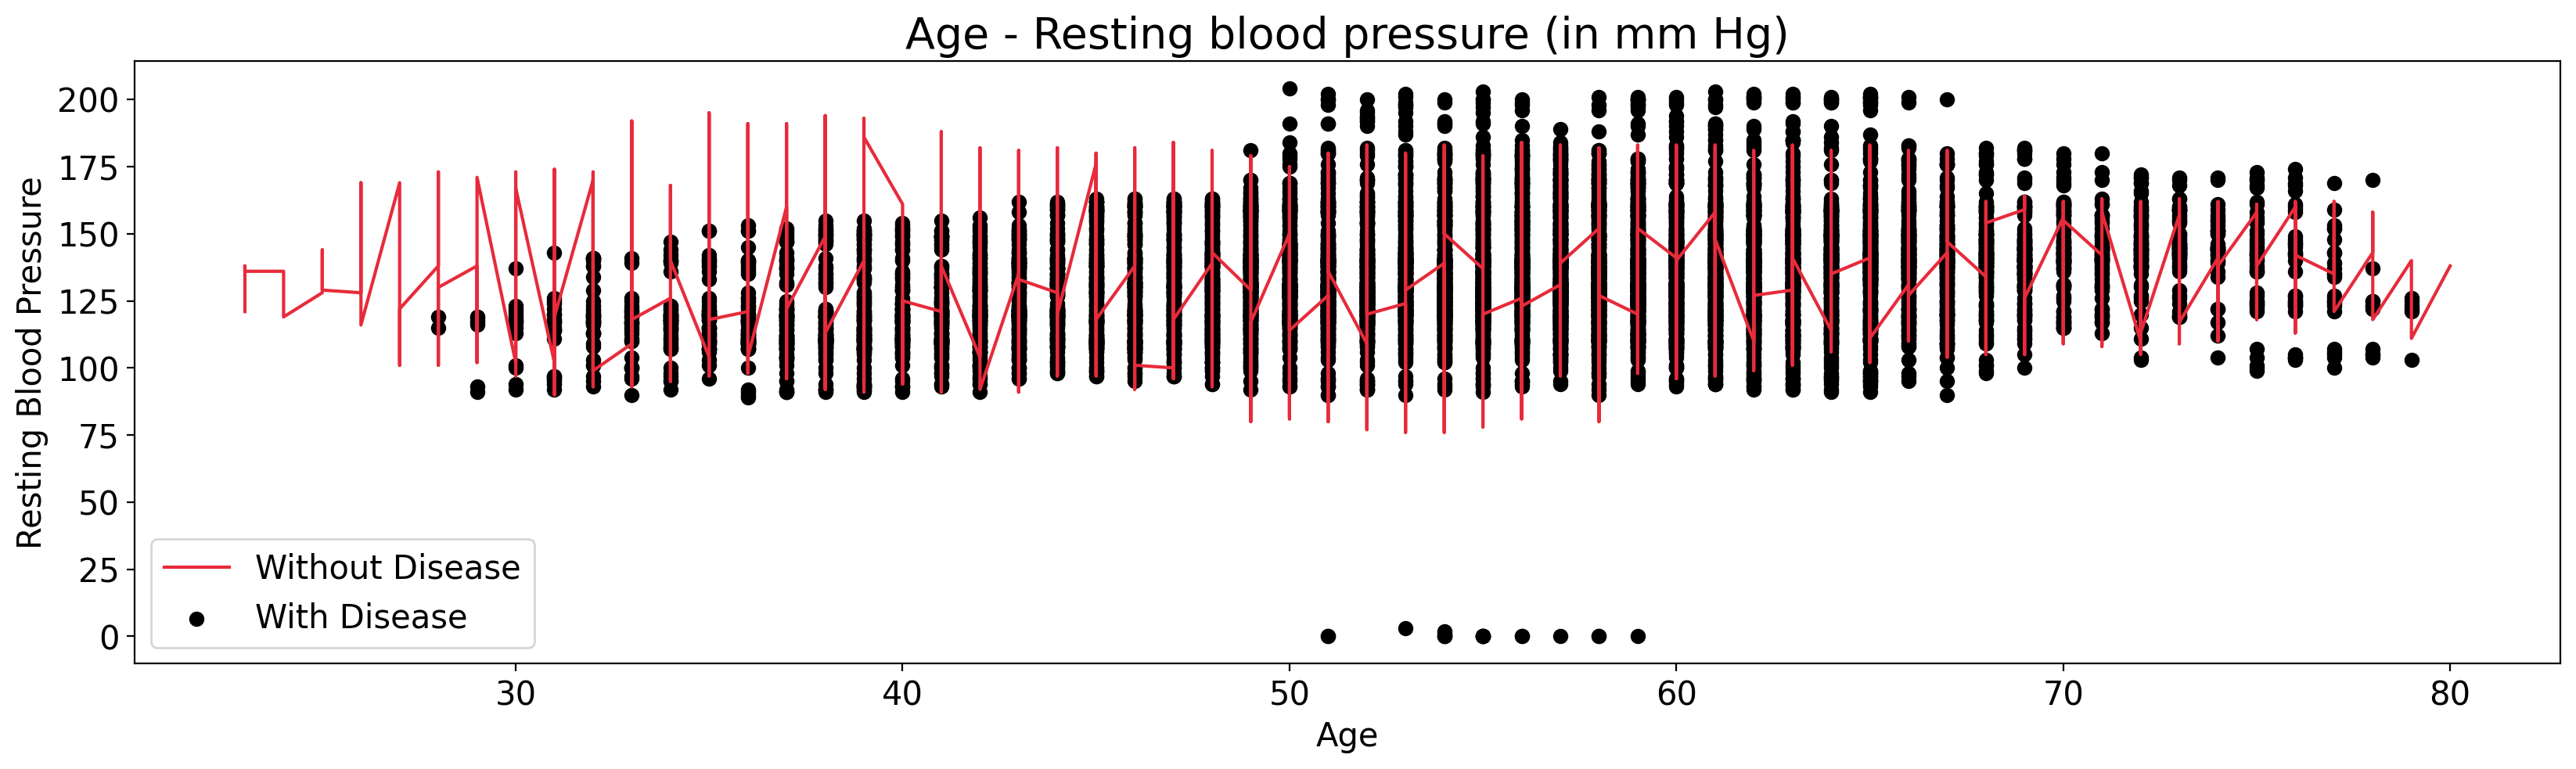

In [45]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['Age'], Target_0_data['Resting Blood Pressure'], color= '#E72B3B')
plt.scatter(Target_1_data['Age'], Target_1_data['Resting Blood Pressure'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Resting blood pressure (in mm Hg)", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Resting Blood Pressure", fontsize=15)


plt.show()

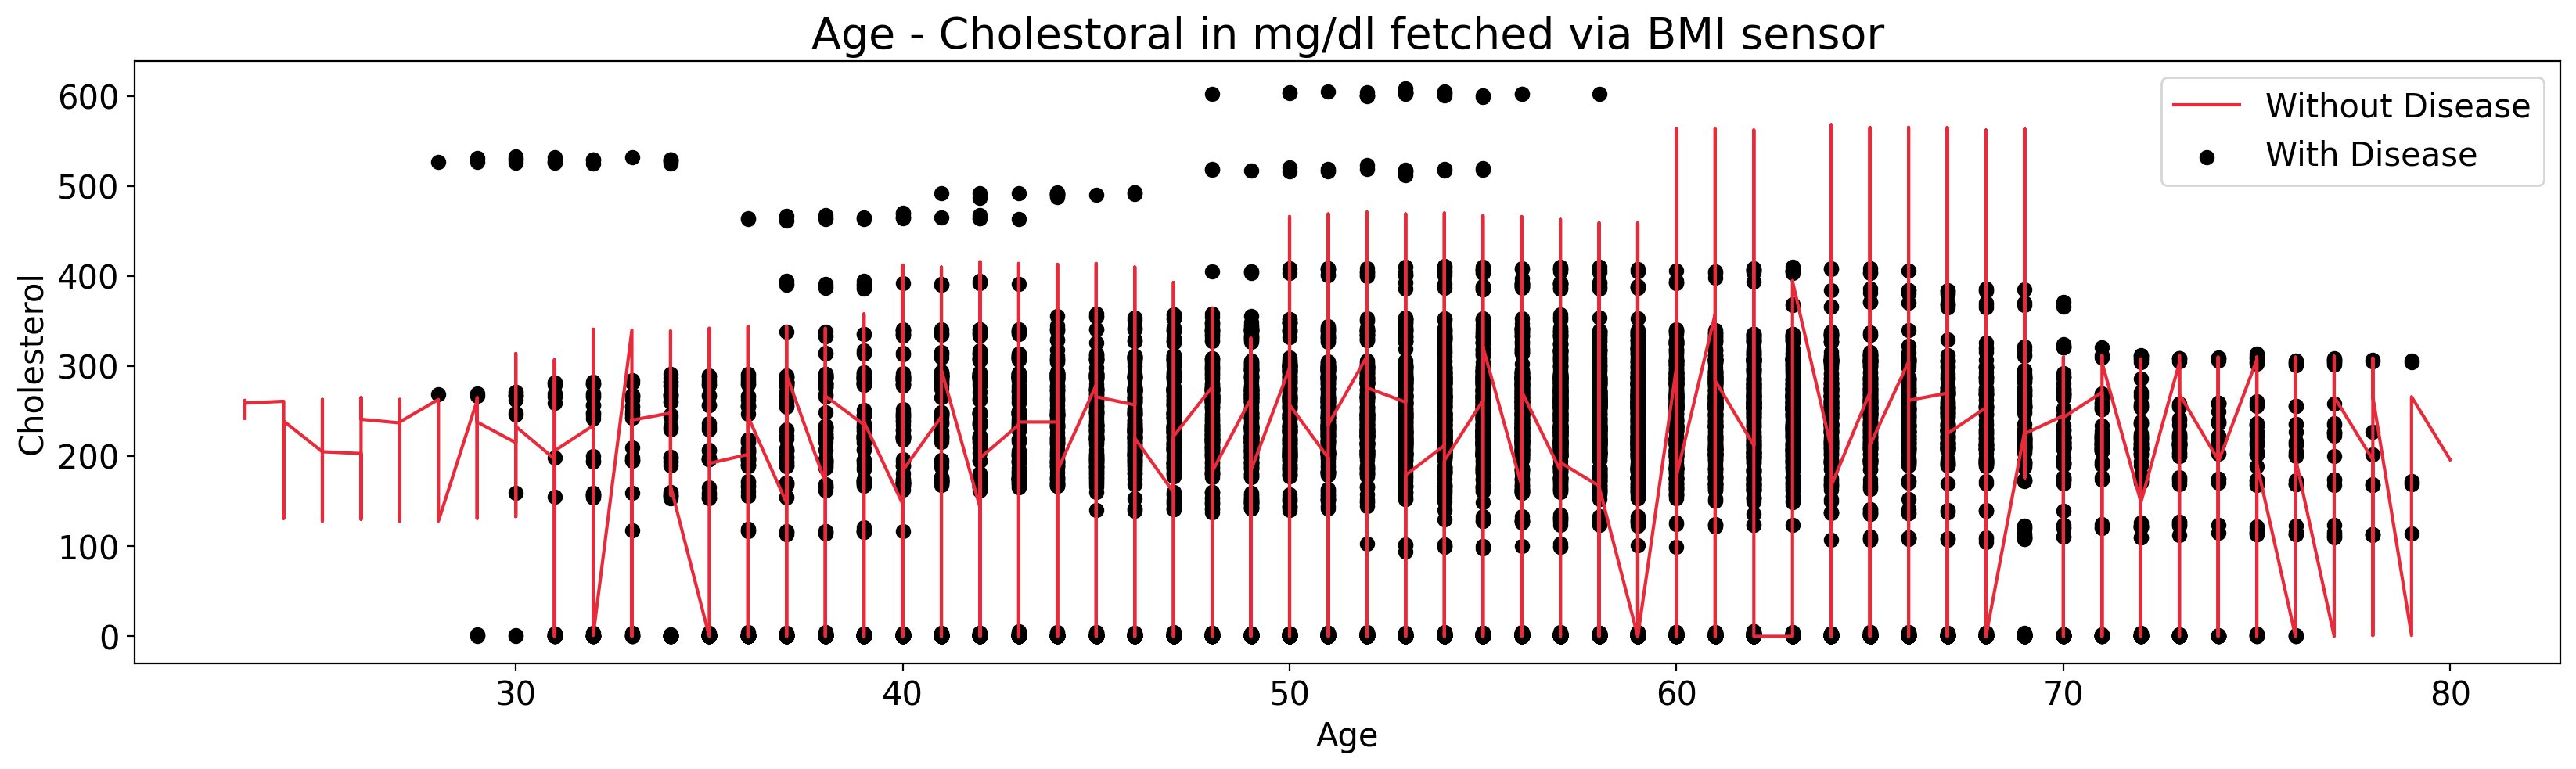

In [46]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['Age'], Target_0_data['Cholesterol'], color= '#E72B3B')
plt.scatter(Target_1_data['Age'], Target_1_data['Cholesterol'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Cholestoral in mg/dl fetched via BMI sensor", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Cholesterol", fontsize=15)


plt.show()

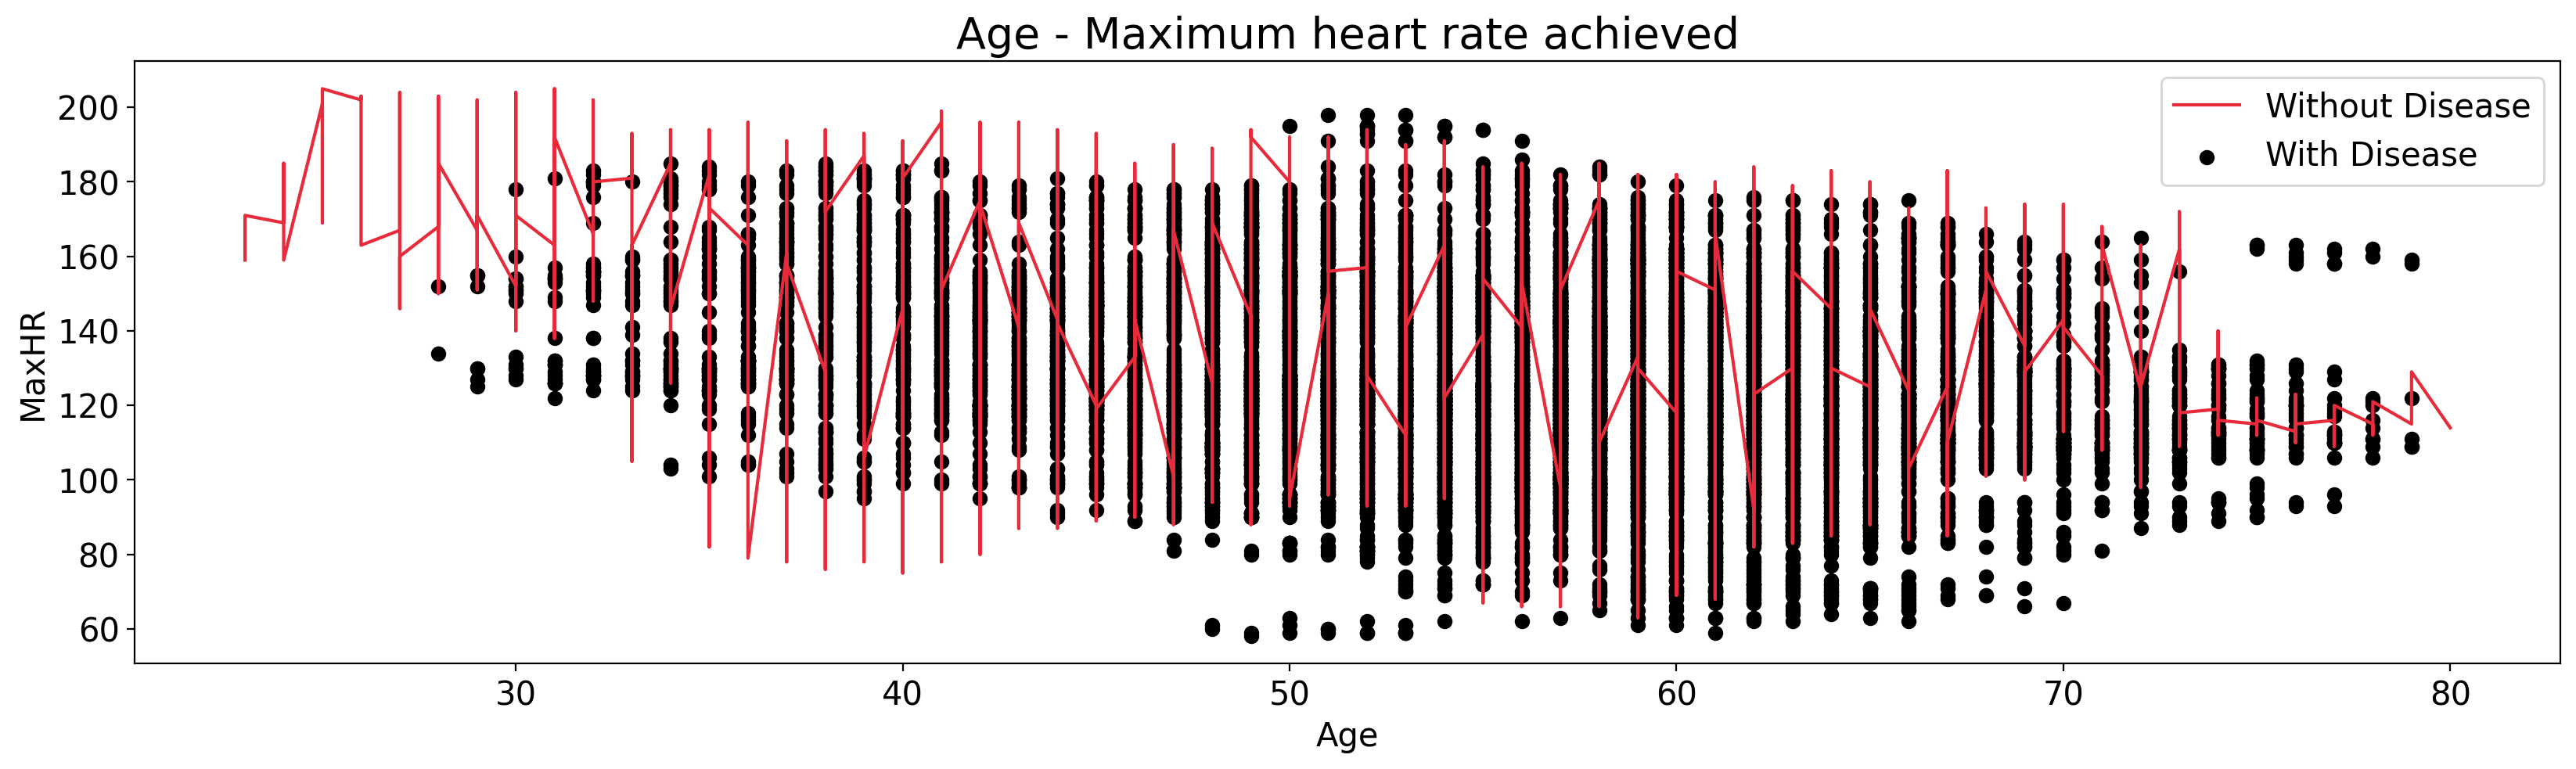

In [47]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['Age'], Target_0_data['MaxHR'], color= '#E72B3B')
plt.scatter(Target_1_data['Age'], Target_1_data['MaxHR'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - Maximum heart rate achieved", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("MaxHR", fontsize=15)


plt.show()

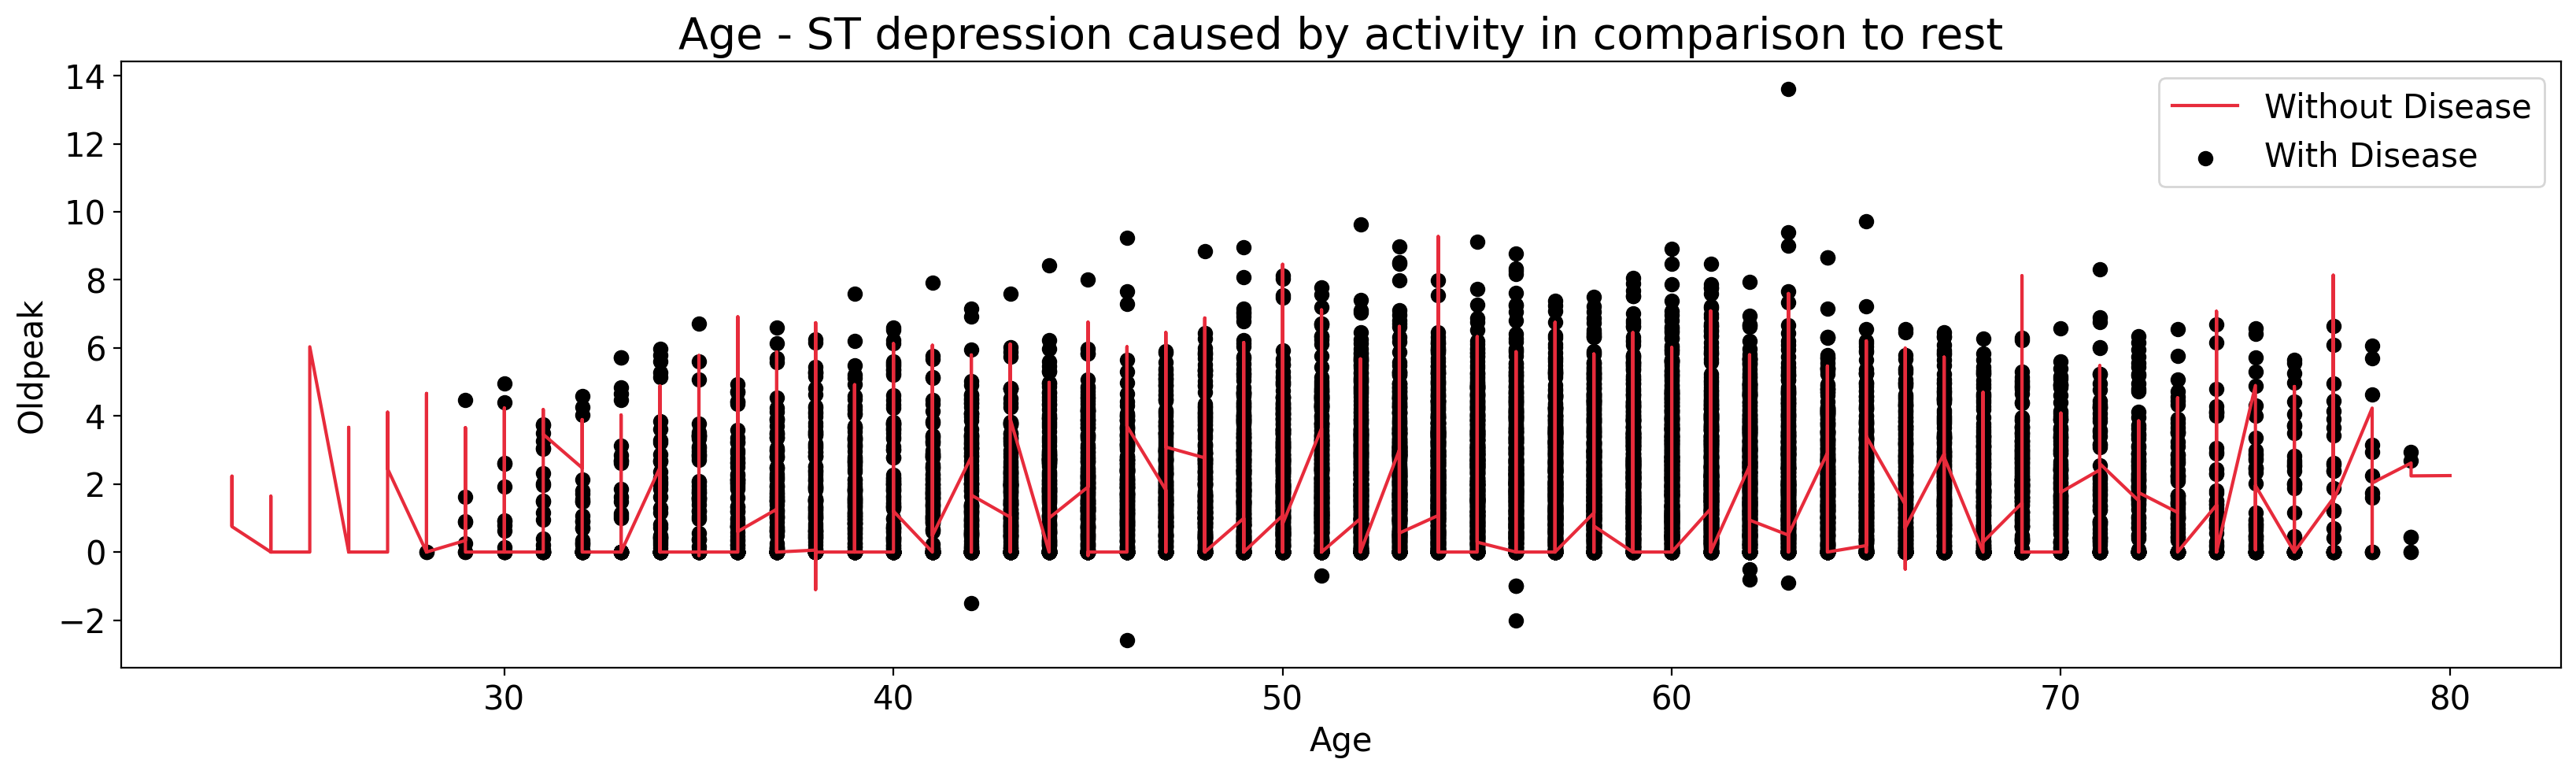

In [48]:
plt.figure(figsize=(20,5), dpi=200)
plt.plot(Target_0_data['Age'], Target_0_data['Oldpeak'], color= '#E72B3B')
plt.scatter(Target_1_data['Age'], Target_1_data['Oldpeak'], color= 'black')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(["Without Disease","With Disease"], fontsize=15)

plt.title("Age - ST depression caused by activity in comparison to rest", fontsize=20)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Oldpeak", fontsize=15)


plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>




  - Count plot for various categorical variables.
    



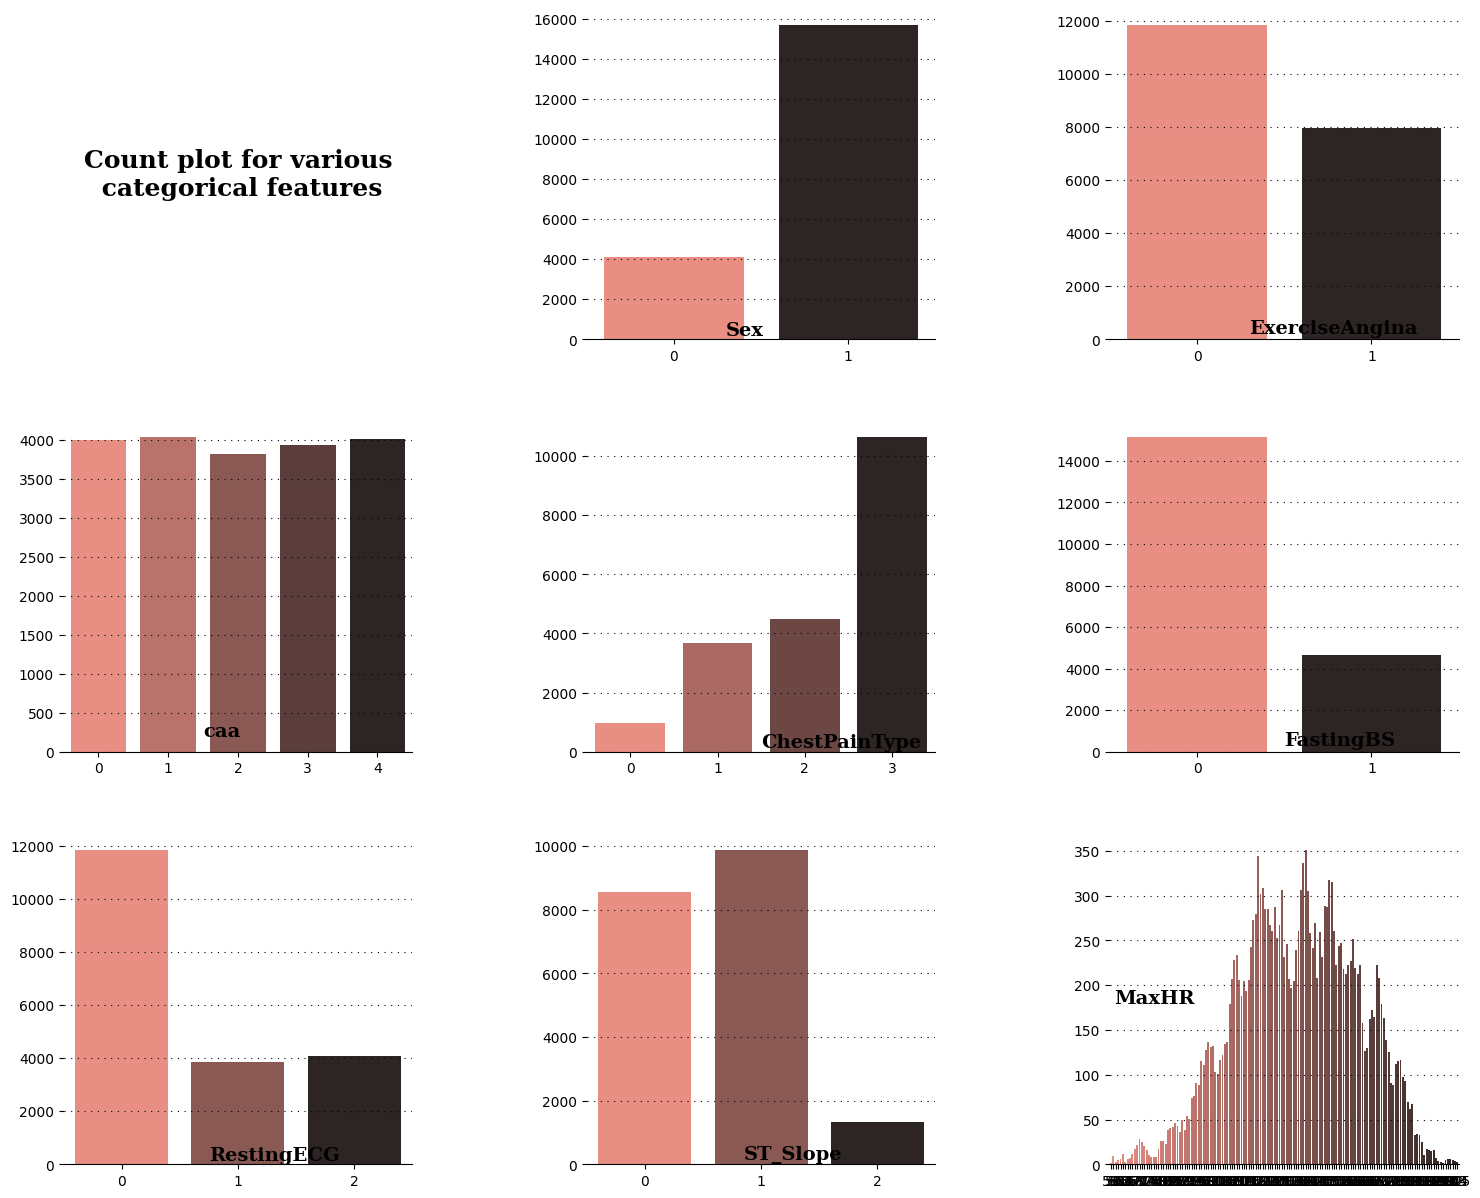

In [49]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "white"
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Count plot for various\n categorical features',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=Main_Dataset,x='Sex',palette="dark:salmon_r")
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'ExerciseAngina', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=Main_Dataset,x='ExerciseAngina',palette="dark:salmon_r")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'caa', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=Main_Dataset,x='caa',palette="dark:salmon_r")
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'ChestPainType', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=Main_Dataset,x='ChestPainType',palette="dark:salmon_r")
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'FastingBS', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=Main_Dataset,x='FastingBS',palette="dark:salmon_r")
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'RestingECG', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=Main_Dataset,x='RestingECG',palette="dark:salmon_r")
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'ST_Slope', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=Main_Dataset,x='ST_Slope',palette="dark:salmon_r")
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'MaxHR', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=Main_Dataset,x='MaxHR',palette="dark:salmon_r")
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Normalize:**

  - Before starting the machine learning part, we must normalize the entire dataset (except target, but in this case, the target is binary and it's ok).
    



In [50]:
Features = Main_Dataset.drop(columns='Output')
Features = pd.DataFrame(Features)
Features = pd.get_dummies(Features, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [51]:
scaler = MinMaxScaler()
Norm_data = scaler.fit_transform(Features)
Norm_df = pd.DataFrame(Norm_data, columns= Features.columns)

desc_norm_df = describe(Norm_df)
desc_norm_df = desc_norm_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_norm_df.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

In [52]:
Norm_df.head(10).style.set_properties(**{'background-color': '#F6E7E8',
                           'color': 'black',
                           'border-color': 'black'})

<a id="5"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Machine Learning Models </p>

* **[Table of Content](#0)**

In [53]:
X = Norm_df#This dataframe is created for features
y = Main_Dataset['Output'].values.reshape(-1,1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=40)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **KNN + tune hyperparameters**

  - The first algorithm is KNN. The strategy is simple. Create two empty lists for appending the accuracies of the model, then change some of the important hyperparameters. In knn, I consider the range of K and P as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



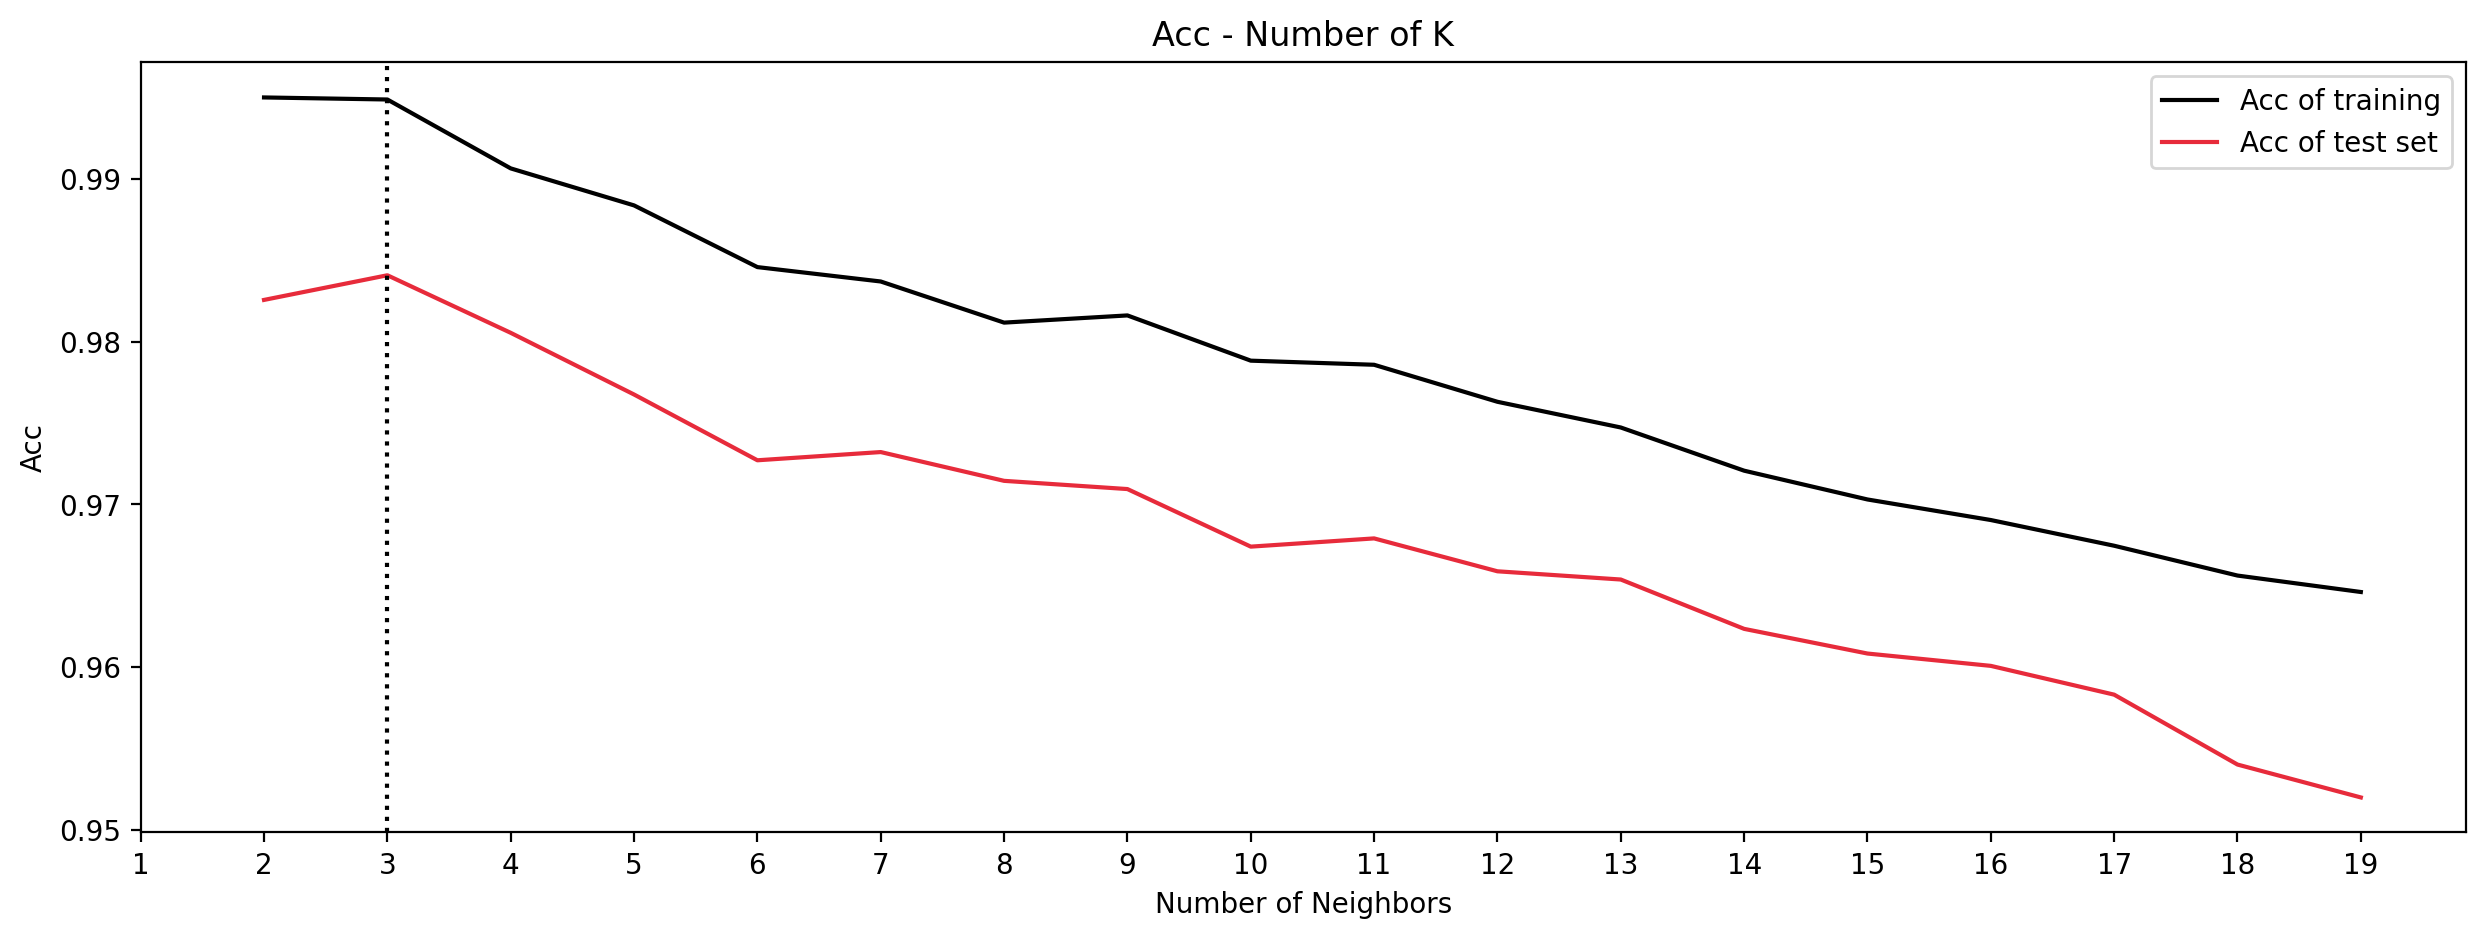

In [55]:
training_acc_1 = []
test_acc_1 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=1)
    knn.fit (X_train, y_train.ravel())
    training_acc_1.append(knn.score(X_train,y_train))
    test_acc_1.append(knn.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(range_k, training_acc_1, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_1, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best K_neighbor', xy=(3,0.89),xytext=(7.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

In [56]:
K = 3
clf_1 = KNeighborsClassifier(K, p=1)
clf_1.fit(X_train, y_train.ravel())
y_pred_1 = clf_1.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_1))
Best_knn = metrics.accuracy_score(y_test,y_pred_1)

Accuracy 0.9840828701364326


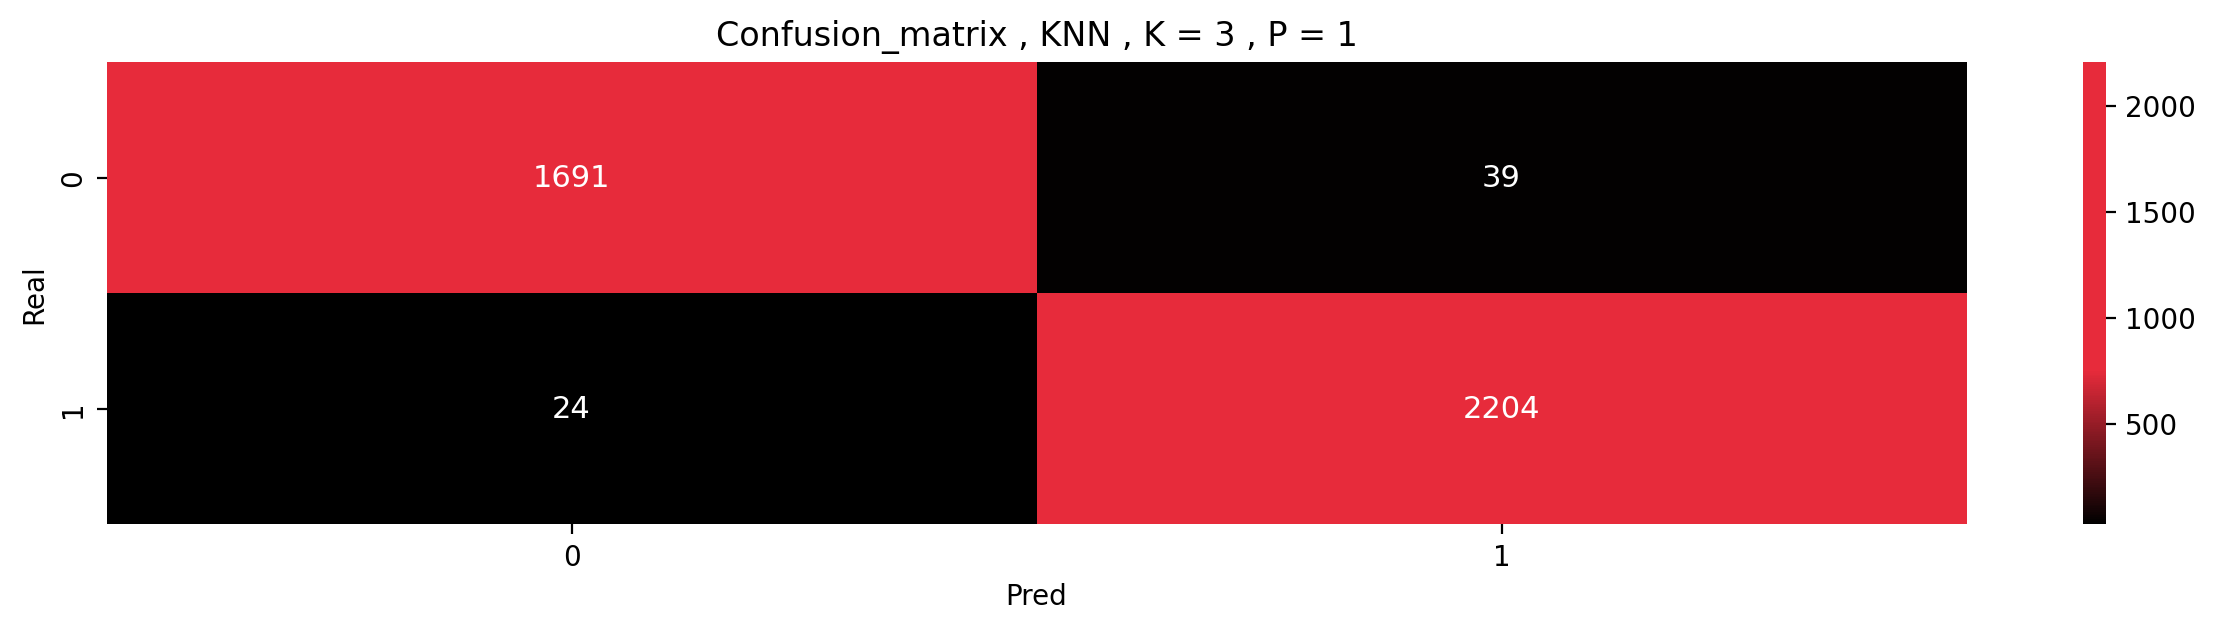

In [57]:
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 1")
annot = np.array([[f"{conf_matrix_1[0, 0]}", f"{conf_matrix_1[0, 1]}"],
                  [f"{conf_matrix_1[1, 0]}", f"{conf_matrix_1[1, 1]}"]], dtype=object)


sns.heatmap(conf_matrix_1,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

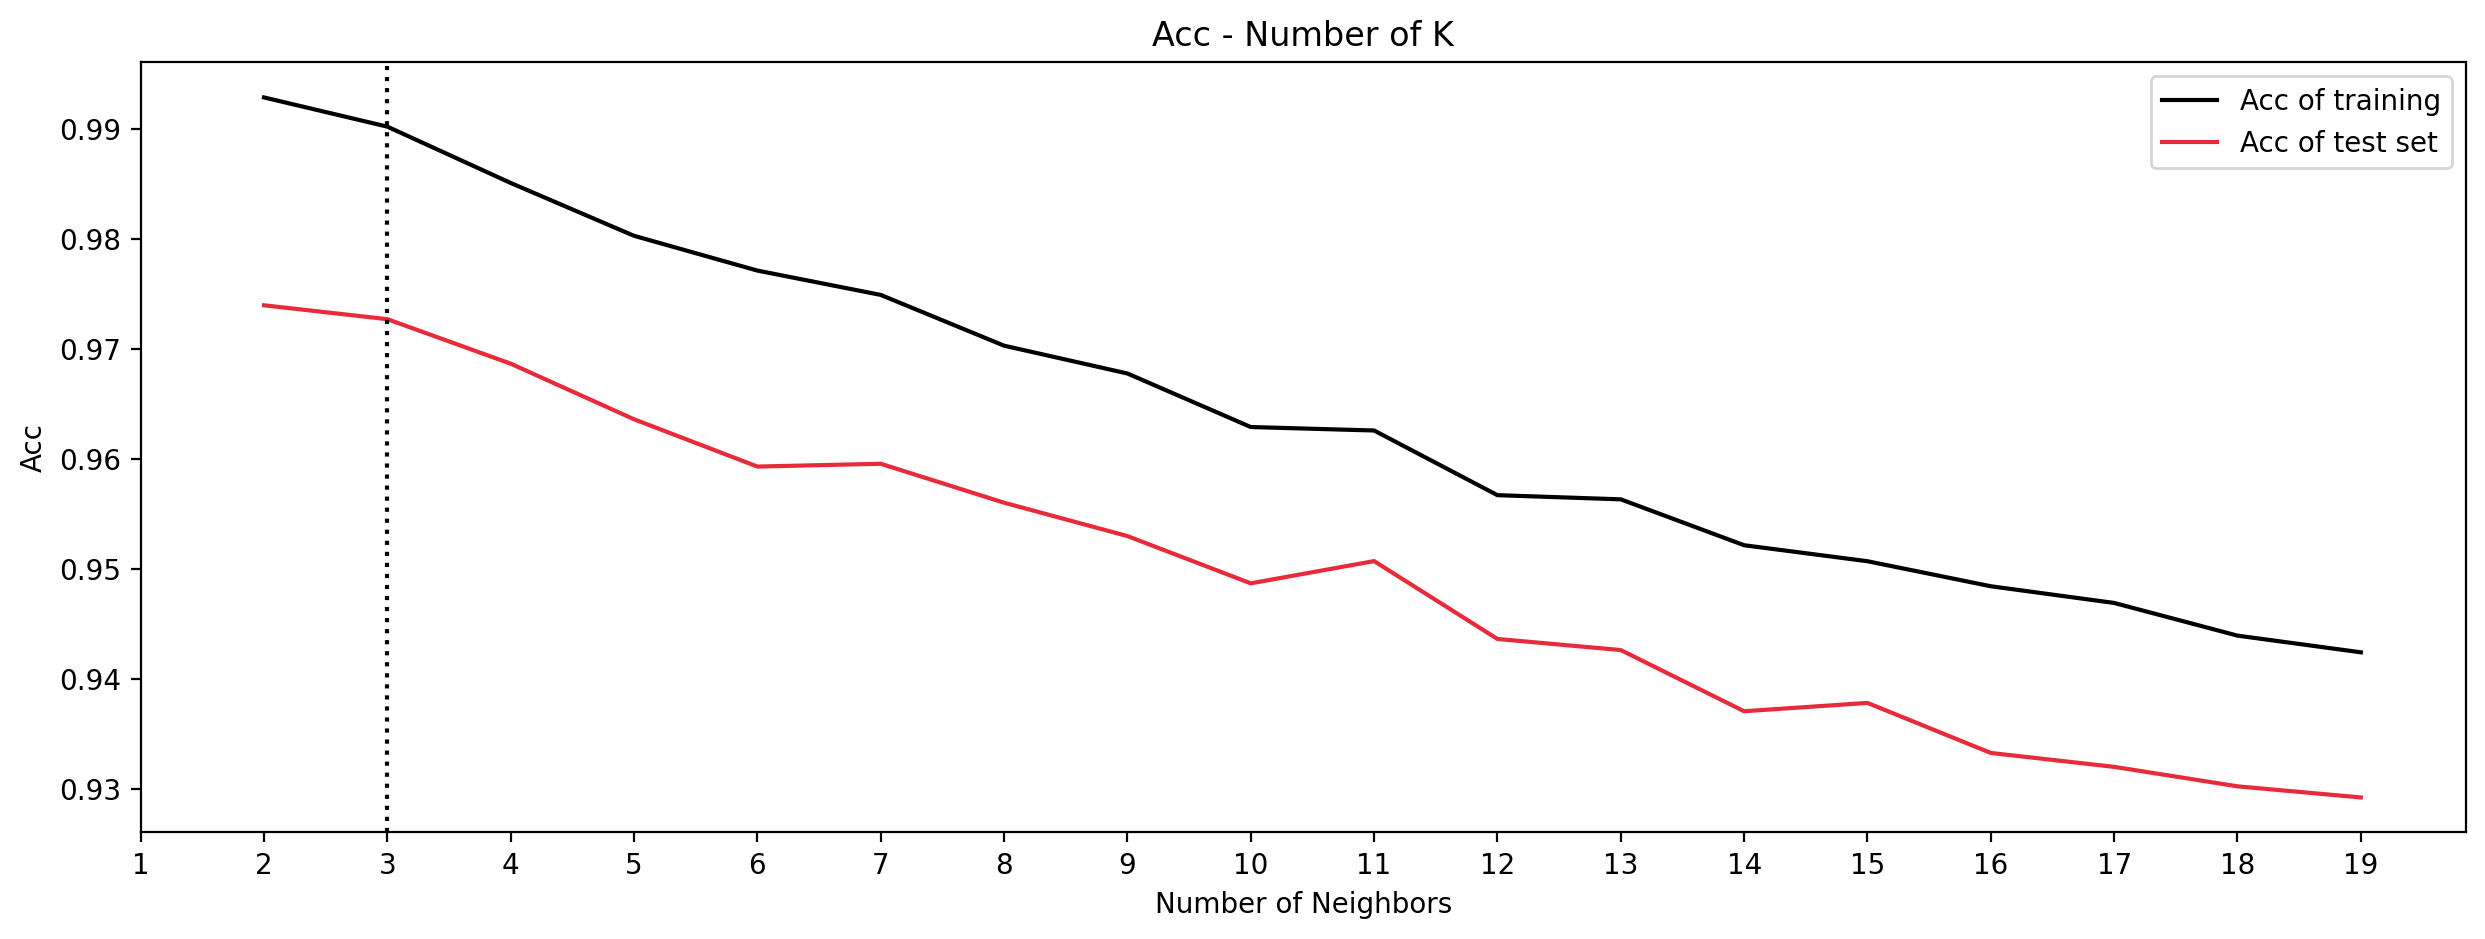

In [58]:
training_acc_2 = []
test_acc_2 = []

range_k = range(2,20)

for number_k in range_k:
    knn = KNeighborsClassifier(n_neighbors = number_k, p=2)
    knn.fit (X_train, y_train.ravel())
    training_acc_2.append(knn.score(X_train,y_train))
    test_acc_2.append(knn.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(range_k, training_acc_2, label='Acc of training', color= 'black')
plt.plot(range_k, test_acc_2, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of Neighbors')
plt.title('Acc - Number of K')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best K_neighbor', xy=(3,0.87),xytext=(7.2,0.82), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 3, linestyle= 'dotted', c= 'black')
plt.show()

In [59]:
K = 3
clf_2 = KNeighborsClassifier(K, p=2)
clf_2.fit(X_train, y_train.ravel())
y_pred_2 = clf_2.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_2))

Accuracy 0.9727134916624558


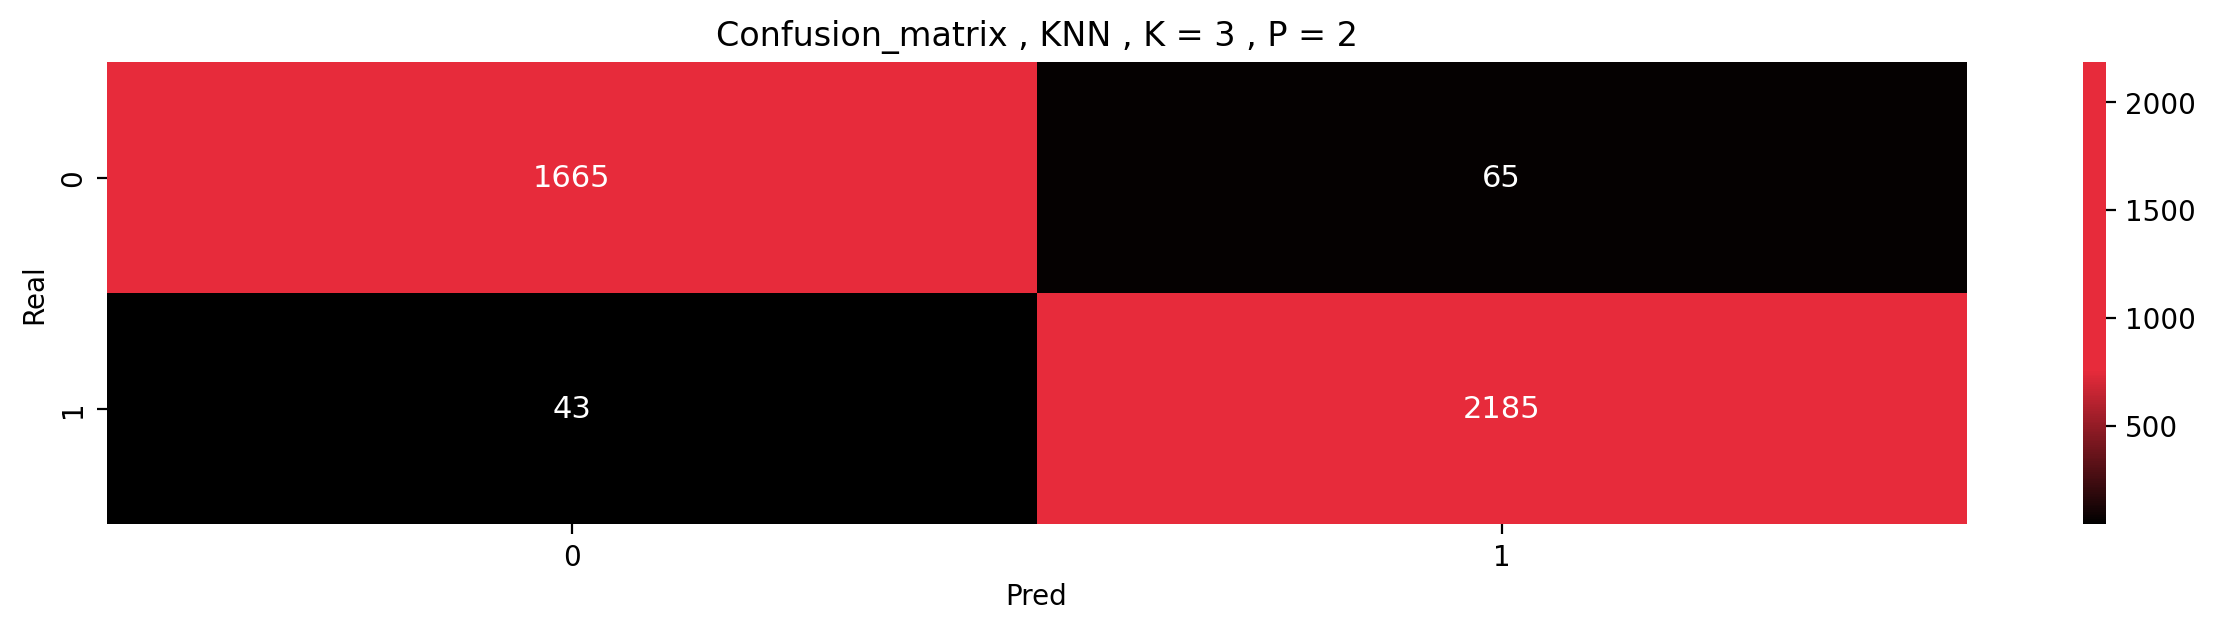

In [60]:
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix , KNN , K = 3 , P = 2")
annot = np.array([[f"{conf_matrix_2[0, 0]}", f"{conf_matrix_2[0, 1]}"],
                  [f"{conf_matrix_2[1, 0]}", f"{conf_matrix_2[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_2,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [61]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [62]:
print(Back.RED +color.BOLD+ "Classification report for clf_1 (K= 3 and p = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_1.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_2 (K= 3 and p = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_2.predict(X_train)))

Classification report for clf_1 (K= 3 and p = 1):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7098
           1       0.99      1.00      1.00      8730

    accuracy                           0.99     15828
   macro avg       0.99      0.99      0.99     15828
weighted avg       0.99      0.99      0.99     15828

Classification report for clf_2 (K= 3 and p = 2):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7098
           1       0.99      0.99      0.99      8730

    accuracy                           0.99     15828
   macro avg       0.99      0.99      0.99     15828
weighted avg       0.99      0.99      0.99     15828



<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **SVM + tune hyperparameters**

  - The second algorithm is SVM. In SVM, I consider the range of C "0.05 - 50" and Kernles "Linear, Poly, RBF and sigmoid" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



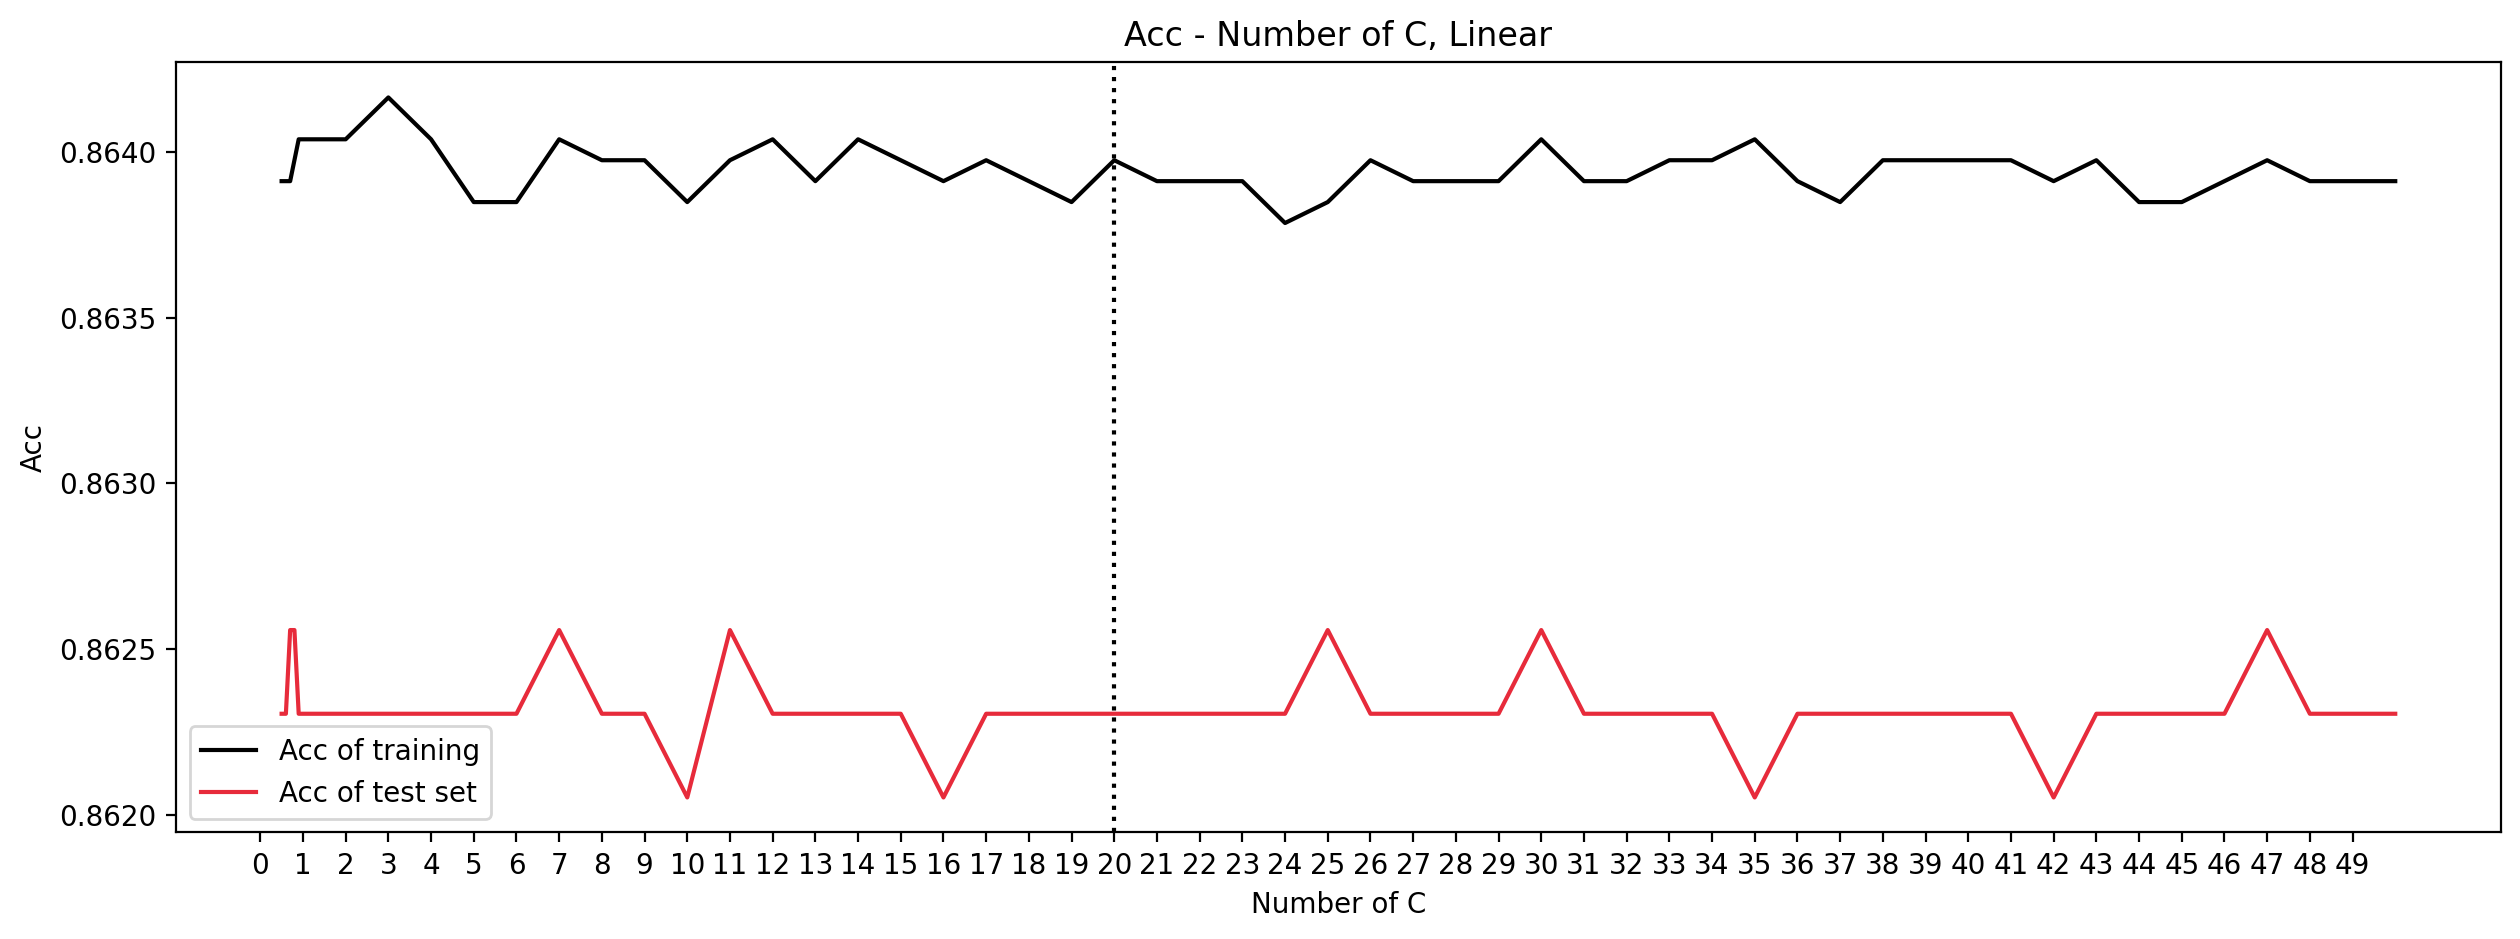

In [63]:
training_acc_3 = []
test_acc_3 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'linear')
    SVM.fit (X_train, y_train.ravel())
    training_acc_3.append(SVM.score(X_train,y_train))
    test_acc_3.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_3, label='Acc of training', color= 'black')
plt.plot(C, test_acc_3, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C')
plt.title('Acc - Number of C, Linear')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(20,0.86),xytext=(27.2,0.86), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 20, linestyle= 'dotted', c= 'black')
plt.show()

In [64]:
clf_3 = SVC(C= 20, kernel= 'linear')
clf_3.fit(X_train, y_train.ravel())
y_pred_3 = clf_3.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_3))
Best_SVM = metrics.accuracy_score(y_test,y_pred_3)

Accuracy 0.8623041940373927


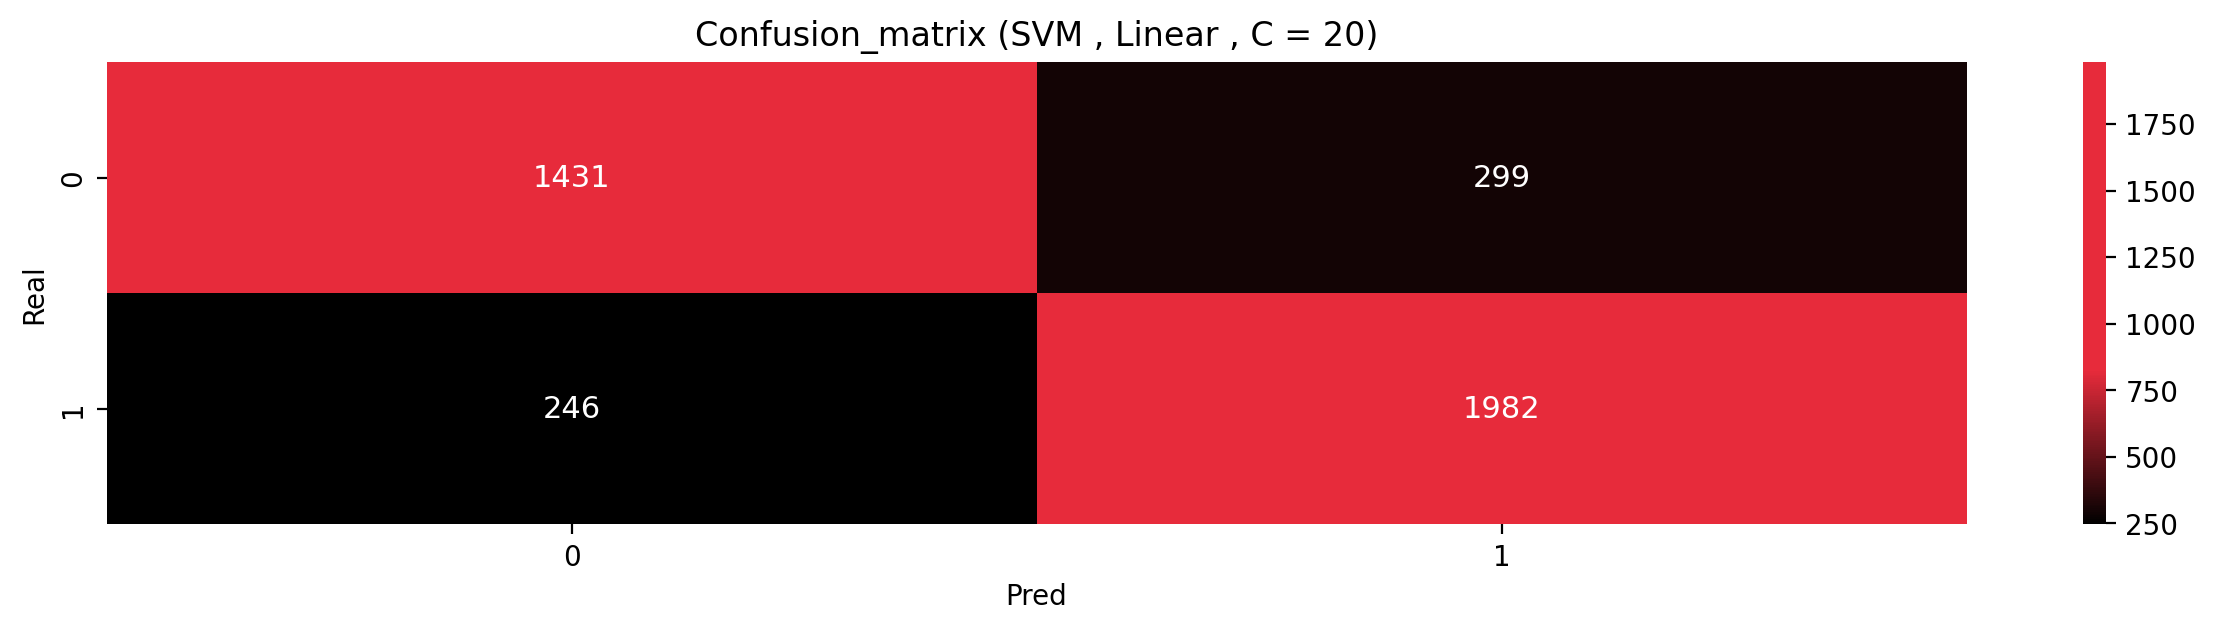

In [65]:
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Linear , C = 20)")
annot = np.array([[f"{conf_matrix_3[0, 0]}", f"{conf_matrix_3[0, 1]}"],
                  [f"{conf_matrix_3[1, 0]}", f"{conf_matrix_3[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_3,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

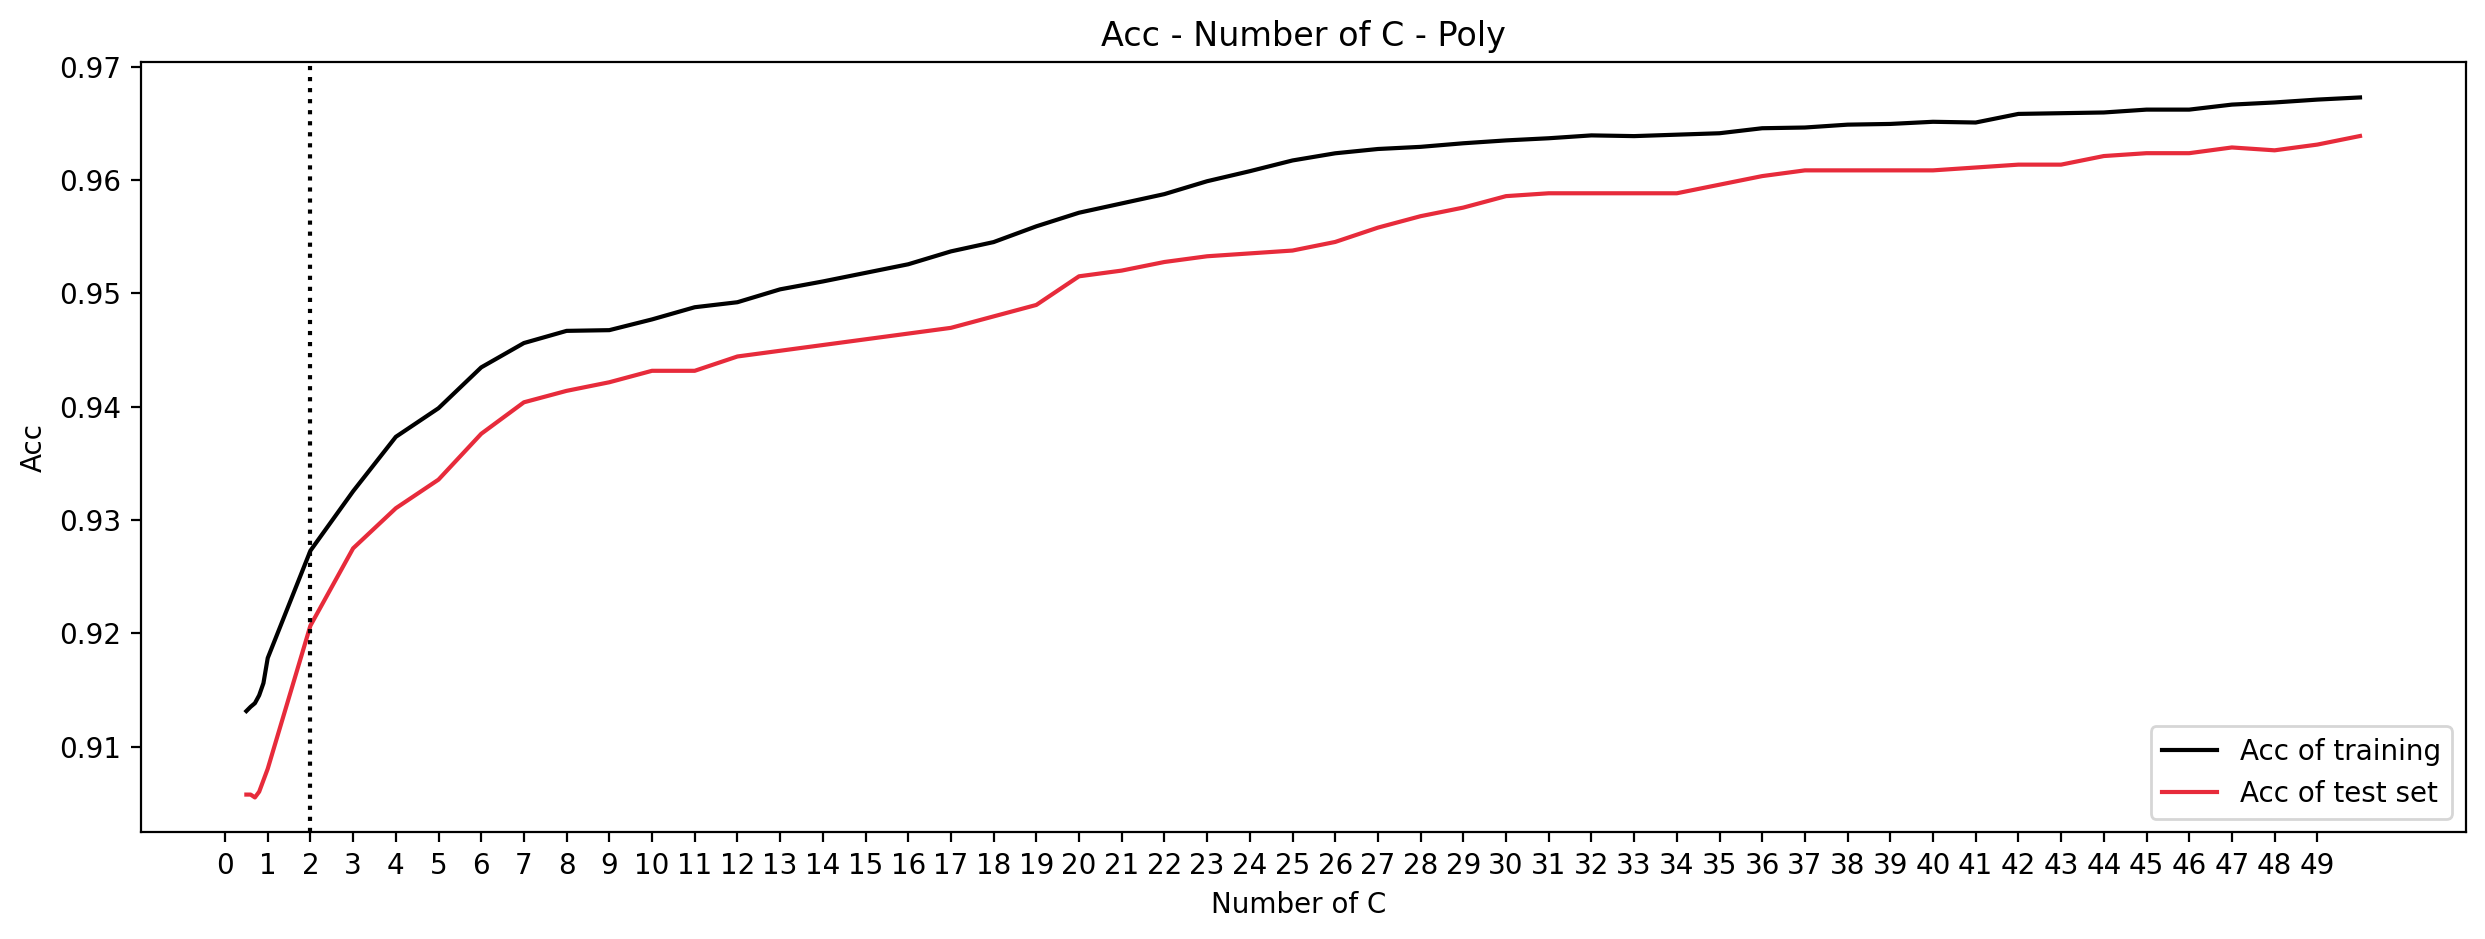

In [66]:
training_acc_4 = []
test_acc_4 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'poly')
    SVM.fit (X_train, y_train.ravel())
    training_acc_4.append(SVM.score(X_train,y_train))
    test_acc_4.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_4, label='Acc of training', color= 'black')
plt.plot(C, test_acc_4, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - Poly')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(2,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 2, linestyle= 'dotted', c= 'black')
plt.show()

In [67]:
clf_4 = SVC(C= 2, kernel= 'poly')
clf_4.fit(X_train, y_train.ravel())
y_pred_4 = clf_4.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_4))

Accuracy 0.9206670035371399


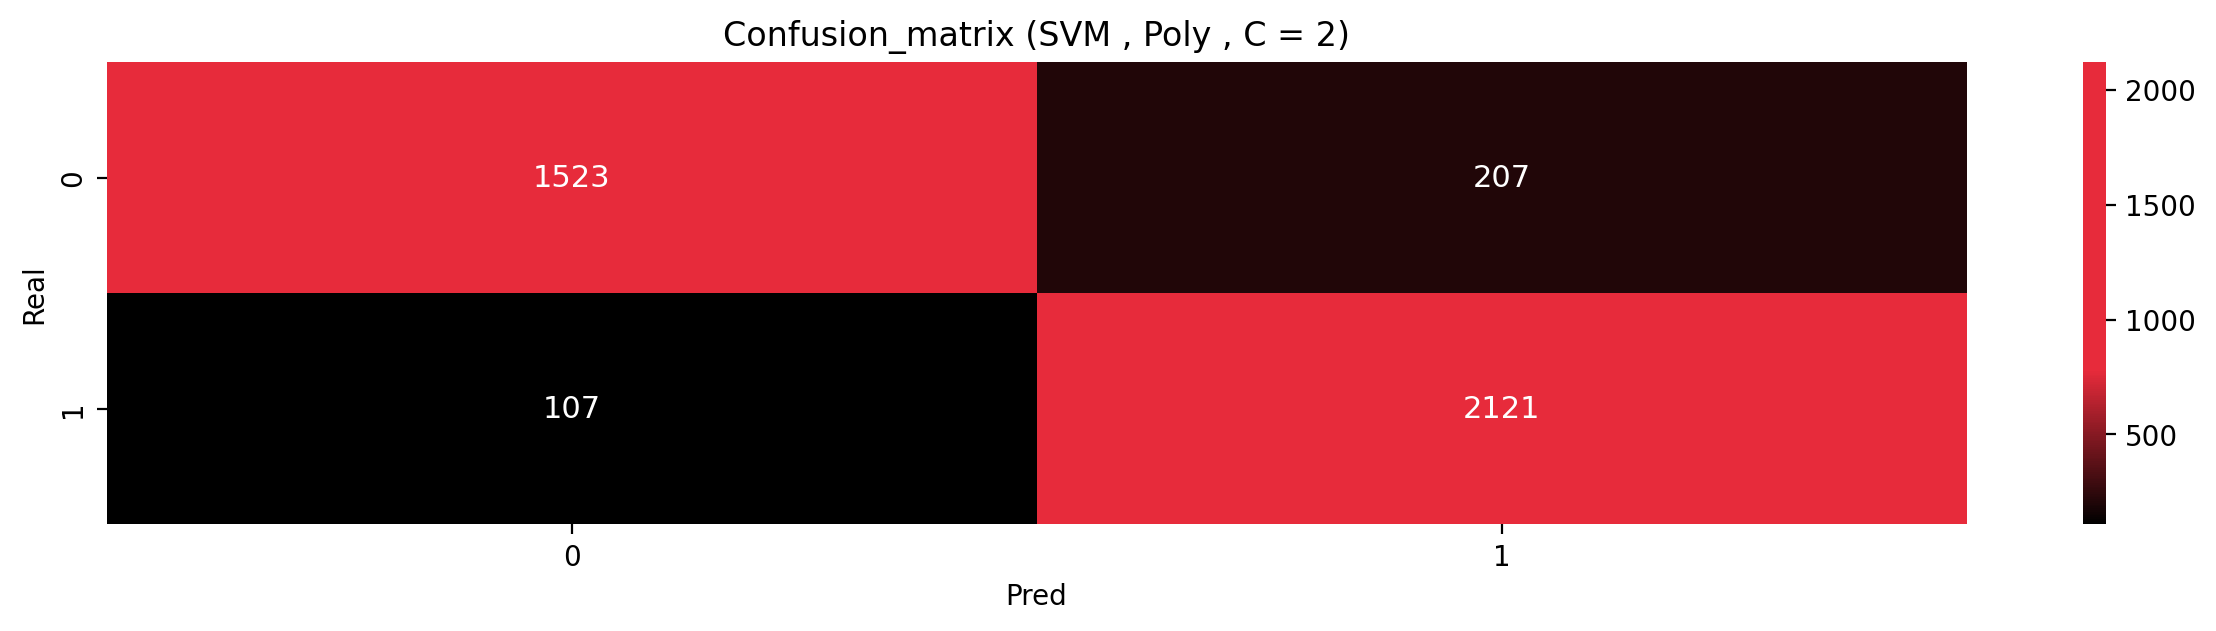

In [68]:
conf_matrix_4 = confusion_matrix(y_test, y_pred_4)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , Poly , C = 2)")
annot = np.array([[f"{conf_matrix_4[0, 0]}", f"{conf_matrix_4[0, 1]}"],
                  [f"{conf_matrix_4[1, 0]}", f"{conf_matrix_4[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_4,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

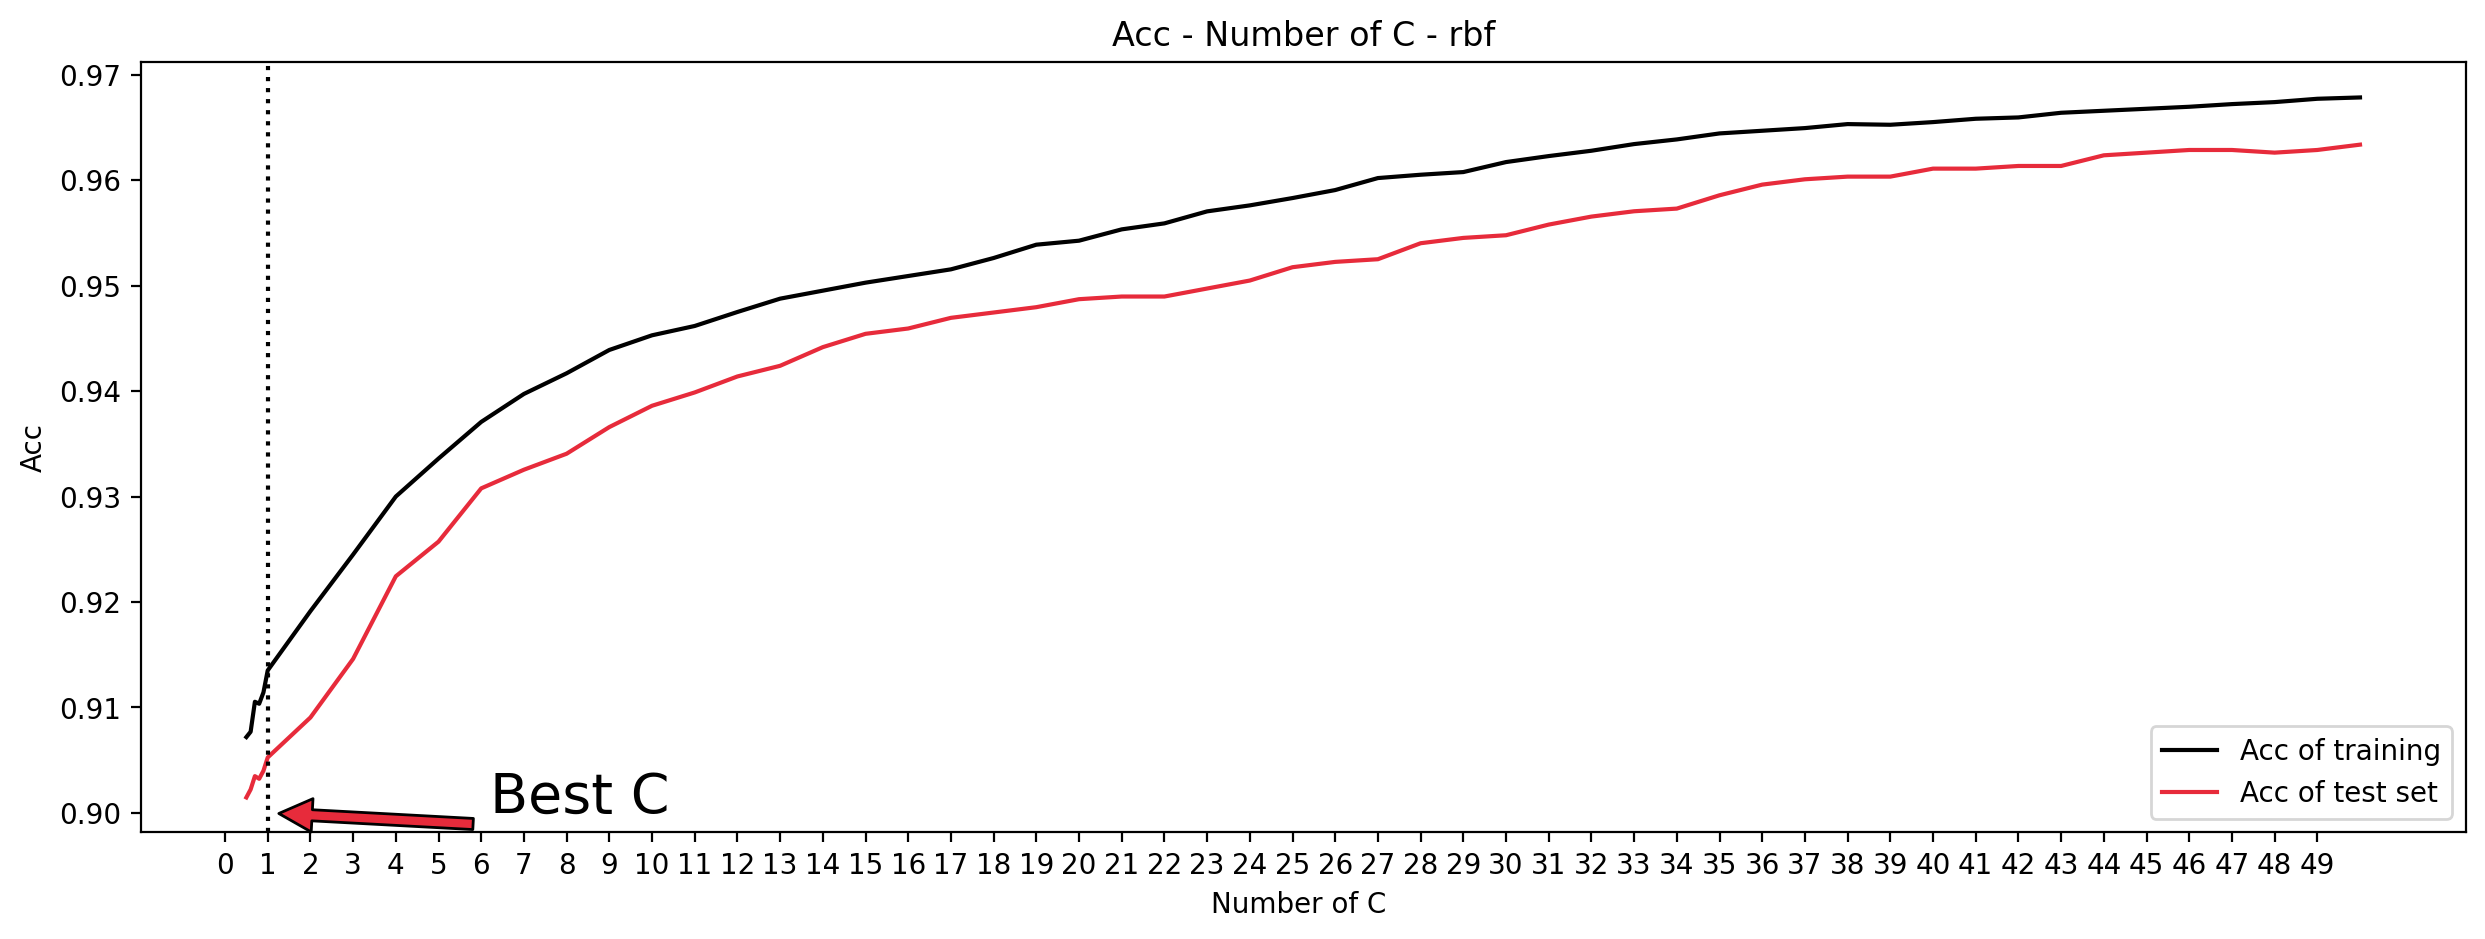

In [69]:
training_acc_5 = []
test_acc_5 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'rbf')
    SVM.fit (X_train, y_train.ravel())
    training_acc_5.append(SVM.score(X_train,y_train))
    test_acc_5.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_5, label='Acc of training', color= 'black')
plt.plot(C, test_acc_5, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - rbf')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(1,0.9),xytext=(6.2,0.9), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x = 1, linestyle= 'dotted', c= 'black')
plt.show()

In [70]:
clf_5 = SVC(C= 1, kernel= 'rbf')
clf_5.fit(X_train, y_train.ravel())
y_pred_5 = clf_5.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_5))

Accuracy 0.9052551793835271


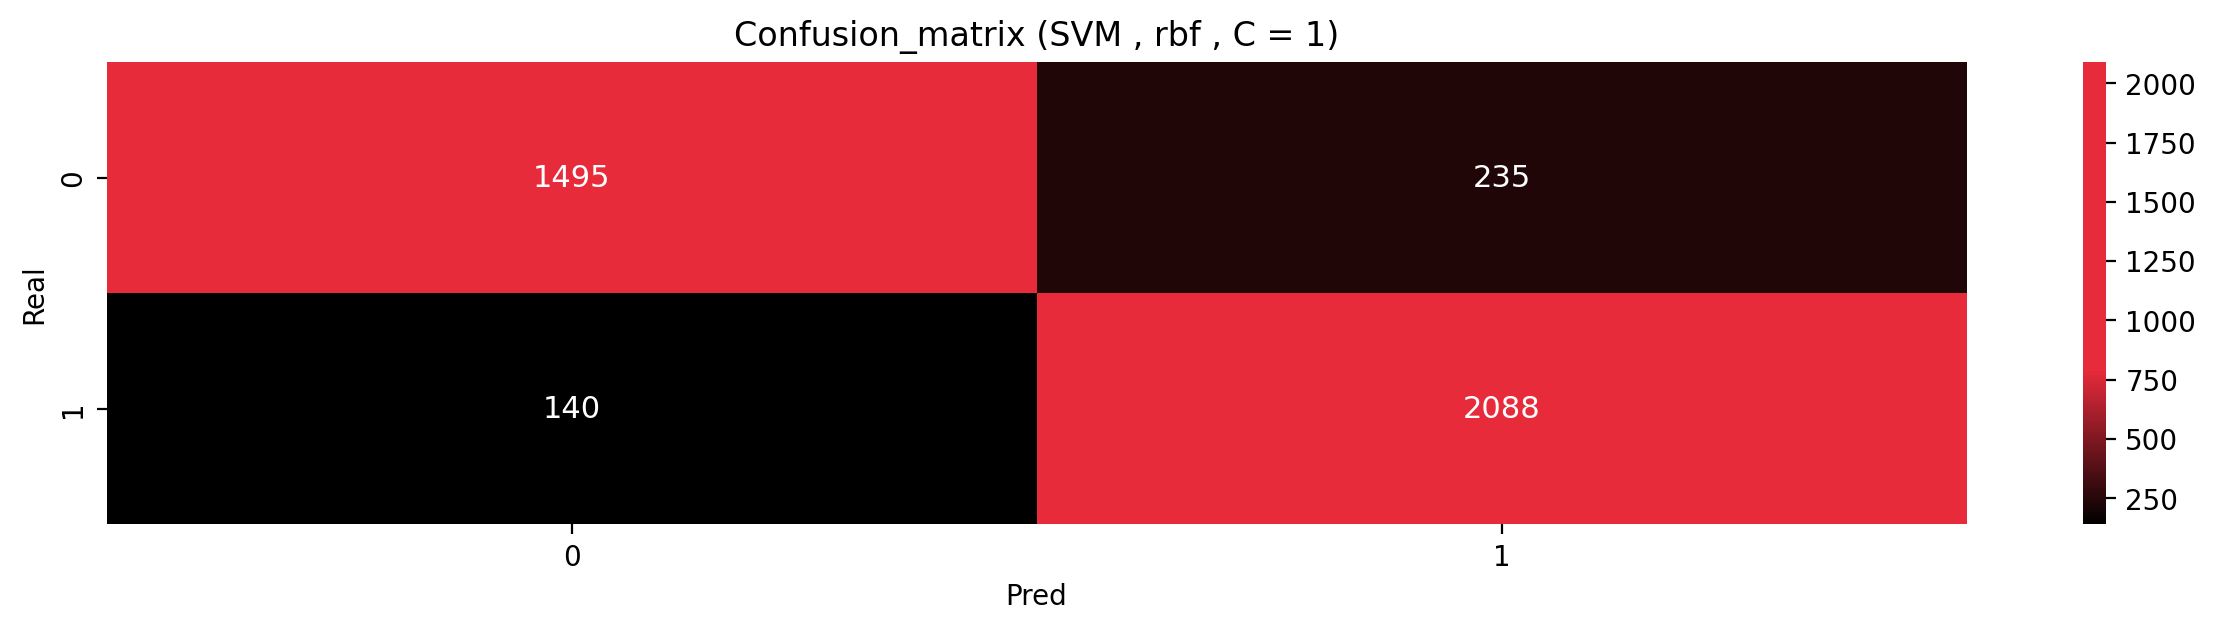

In [71]:
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , rbf , C = 1)")
annot = np.array([[f"{conf_matrix_5[0, 0]}", f"{conf_matrix_5[0, 1]}"],
                  [f"{conf_matrix_5[1, 0]}", f"{conf_matrix_5[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_5,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

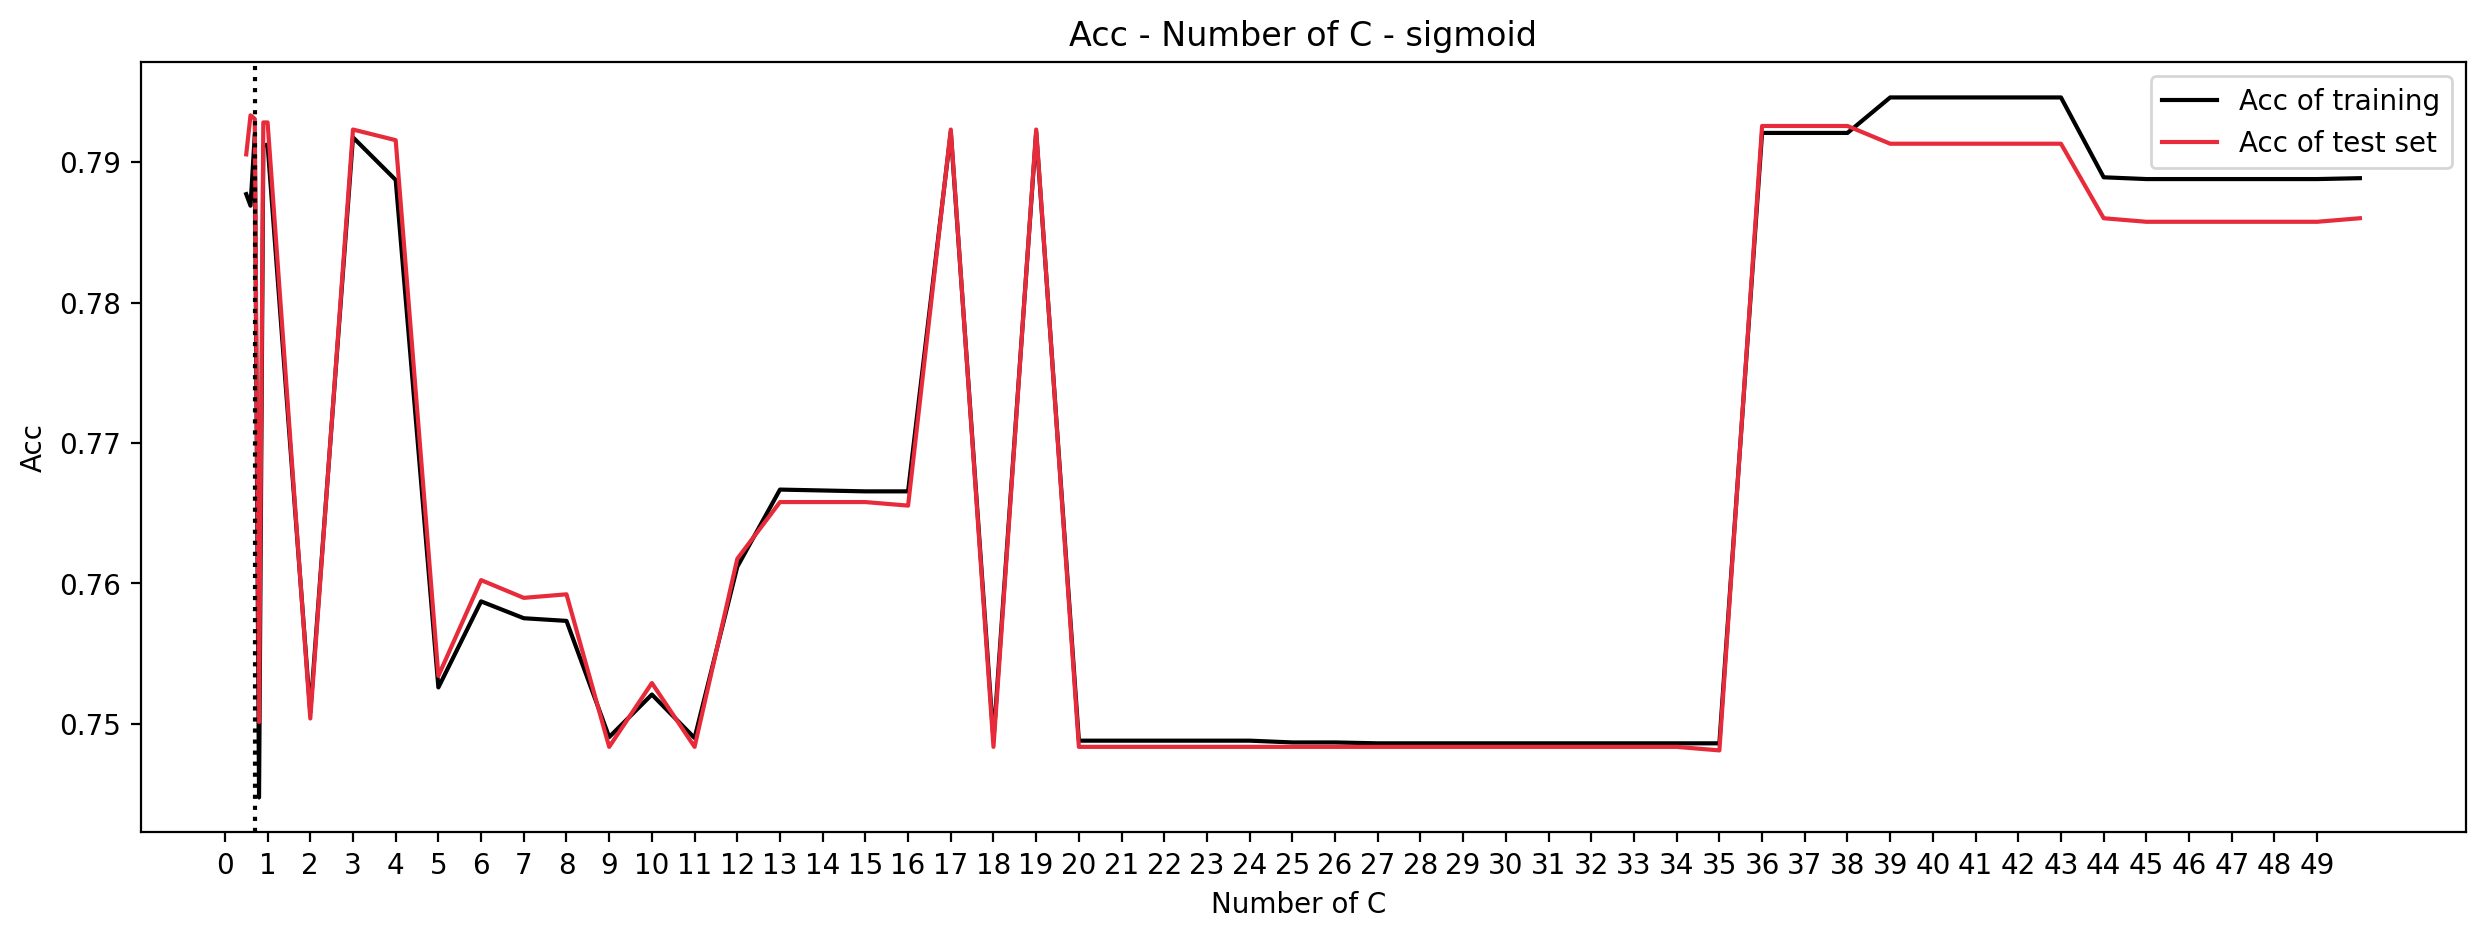

In [72]:
training_acc_6 = []
test_acc_6 = []

C = [0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
    26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
#Kernel = {'linear', 'poly', 'rbf', 'sigmoid'}

for C_ in C:
    SVM = SVC(C= C_, kernel= 'sigmoid')
    SVM.fit (X_train, y_train.ravel())
    training_acc_6.append(SVM.score(X_train,y_train))
    test_acc_6.append(SVM.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(C, training_acc_6, label='Acc of training', color= 'black')
plt.plot(C, test_acc_6, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Number of C ')
plt.title('Acc - Number of C - sigmoid')
plt.legend()
plt.xticks(range(0,50))
plt.annotate('Best C', xy=(0.7,0.8),xytext=(5.2,0.8), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =0.7, linestyle= 'dotted', c= 'black')
plt.show()

In [73]:
clf_6 = SVC(C= 0.7, kernel= 'sigmoid')
clf_6.fit(X_train, y_train.ravel())
y_pred_6 = clf_6.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_6))

Accuracy 0.7930773117736231


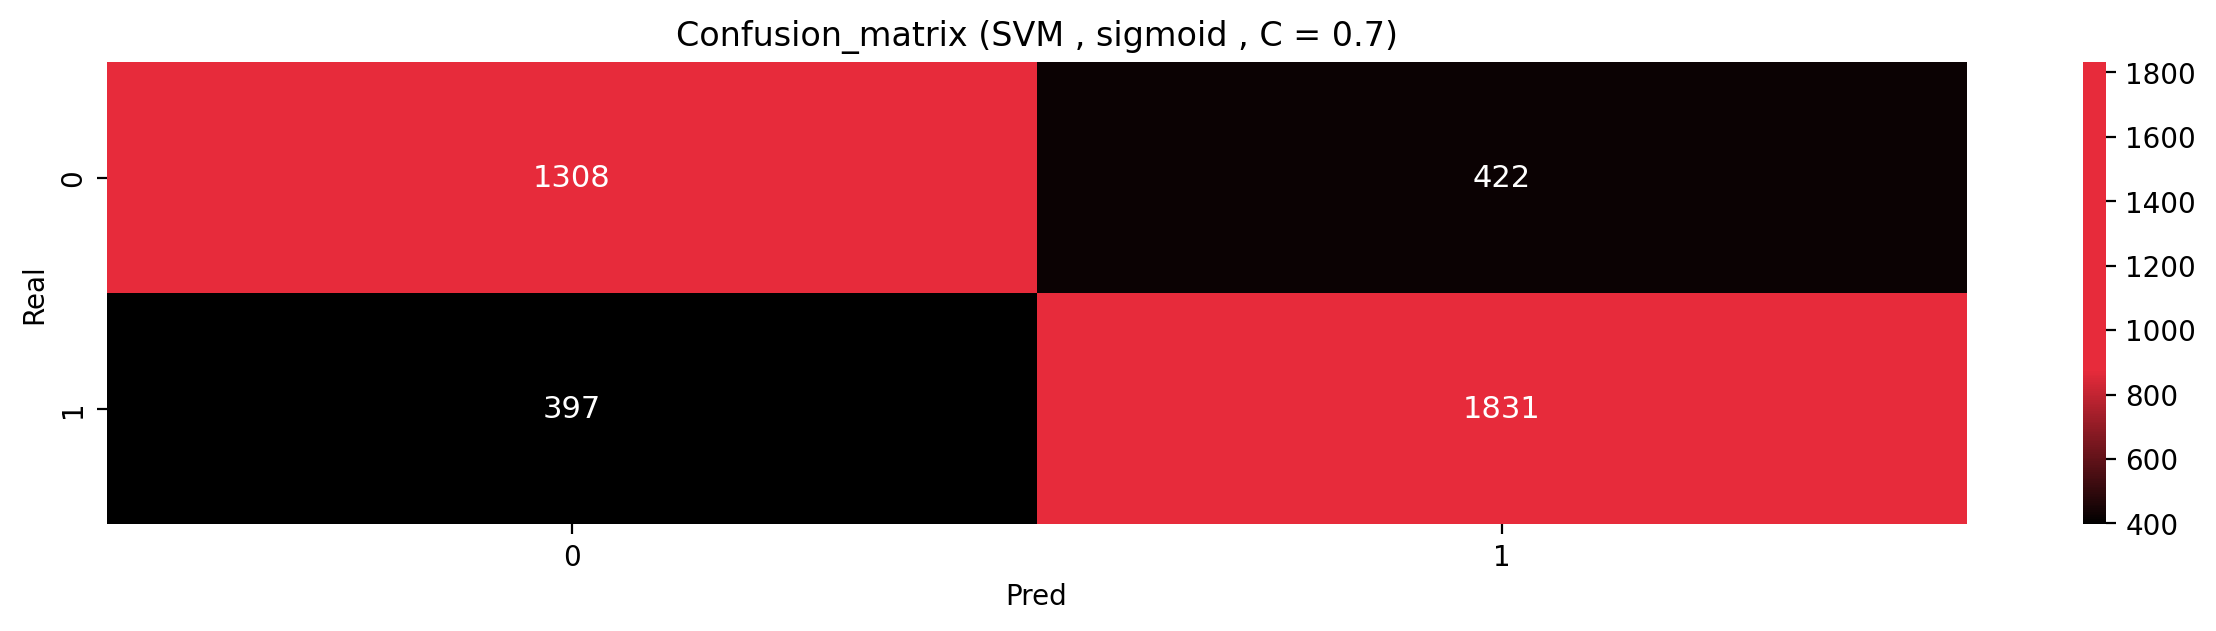

In [74]:
conf_matrix_6 = confusion_matrix(y_test, y_pred_6)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (SVM , sigmoid , C = 0.7)")
annot = np.array([[f"{conf_matrix_6[0, 0]}", f"{conf_matrix_6[0, 1]}"],
                  [f"{conf_matrix_6[1, 0]}", f"{conf_matrix_6[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_6,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [75]:
print(Back.RED +color.BOLD+ "Classification report for clf_3 (Svm, kernel = Linear, C = 20):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_3.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_4 (Svm, kernel = Poly, C = 2):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_4.predict(X_train)))
print(Back.RED +color.BOLD+ "Classification report for clf_5 (Svm, kernel = rbf, C = 1):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_5.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_6 (Svm, kernel = Sigmoid, C = 0.7):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_6.predict(X_train)))

Classification report for clf_3 (Svm, kernel = Linear, C = 20):
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      7098
           1       0.87      0.89      0.88      8730

    accuracy                           0.86     15828
   macro avg       0.86      0.86      0.86     15828
weighted avg       0.86      0.86      0.86     15828

Classification report for clf_4 (Svm, kernel = Poly, C = 2):
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      7098
           1       0.92      0.95      0.94      8730

    accuracy                           0.93     15828
   macro avg       0.93      0.92      0.93     15828
weighted avg       0.93      0.93      0.93     15828

Classification report for clf_5 (Svm, kernel = rbf, C = 1):
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      7098
           1       0.91      0.94      0.92      873

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Decision Trees + tune hyperparameters**

  - The third algorithm is Decision trees. In DT, I consider the range of max depth "1 - 20" and Criterions "gini, entropy and log_loss" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



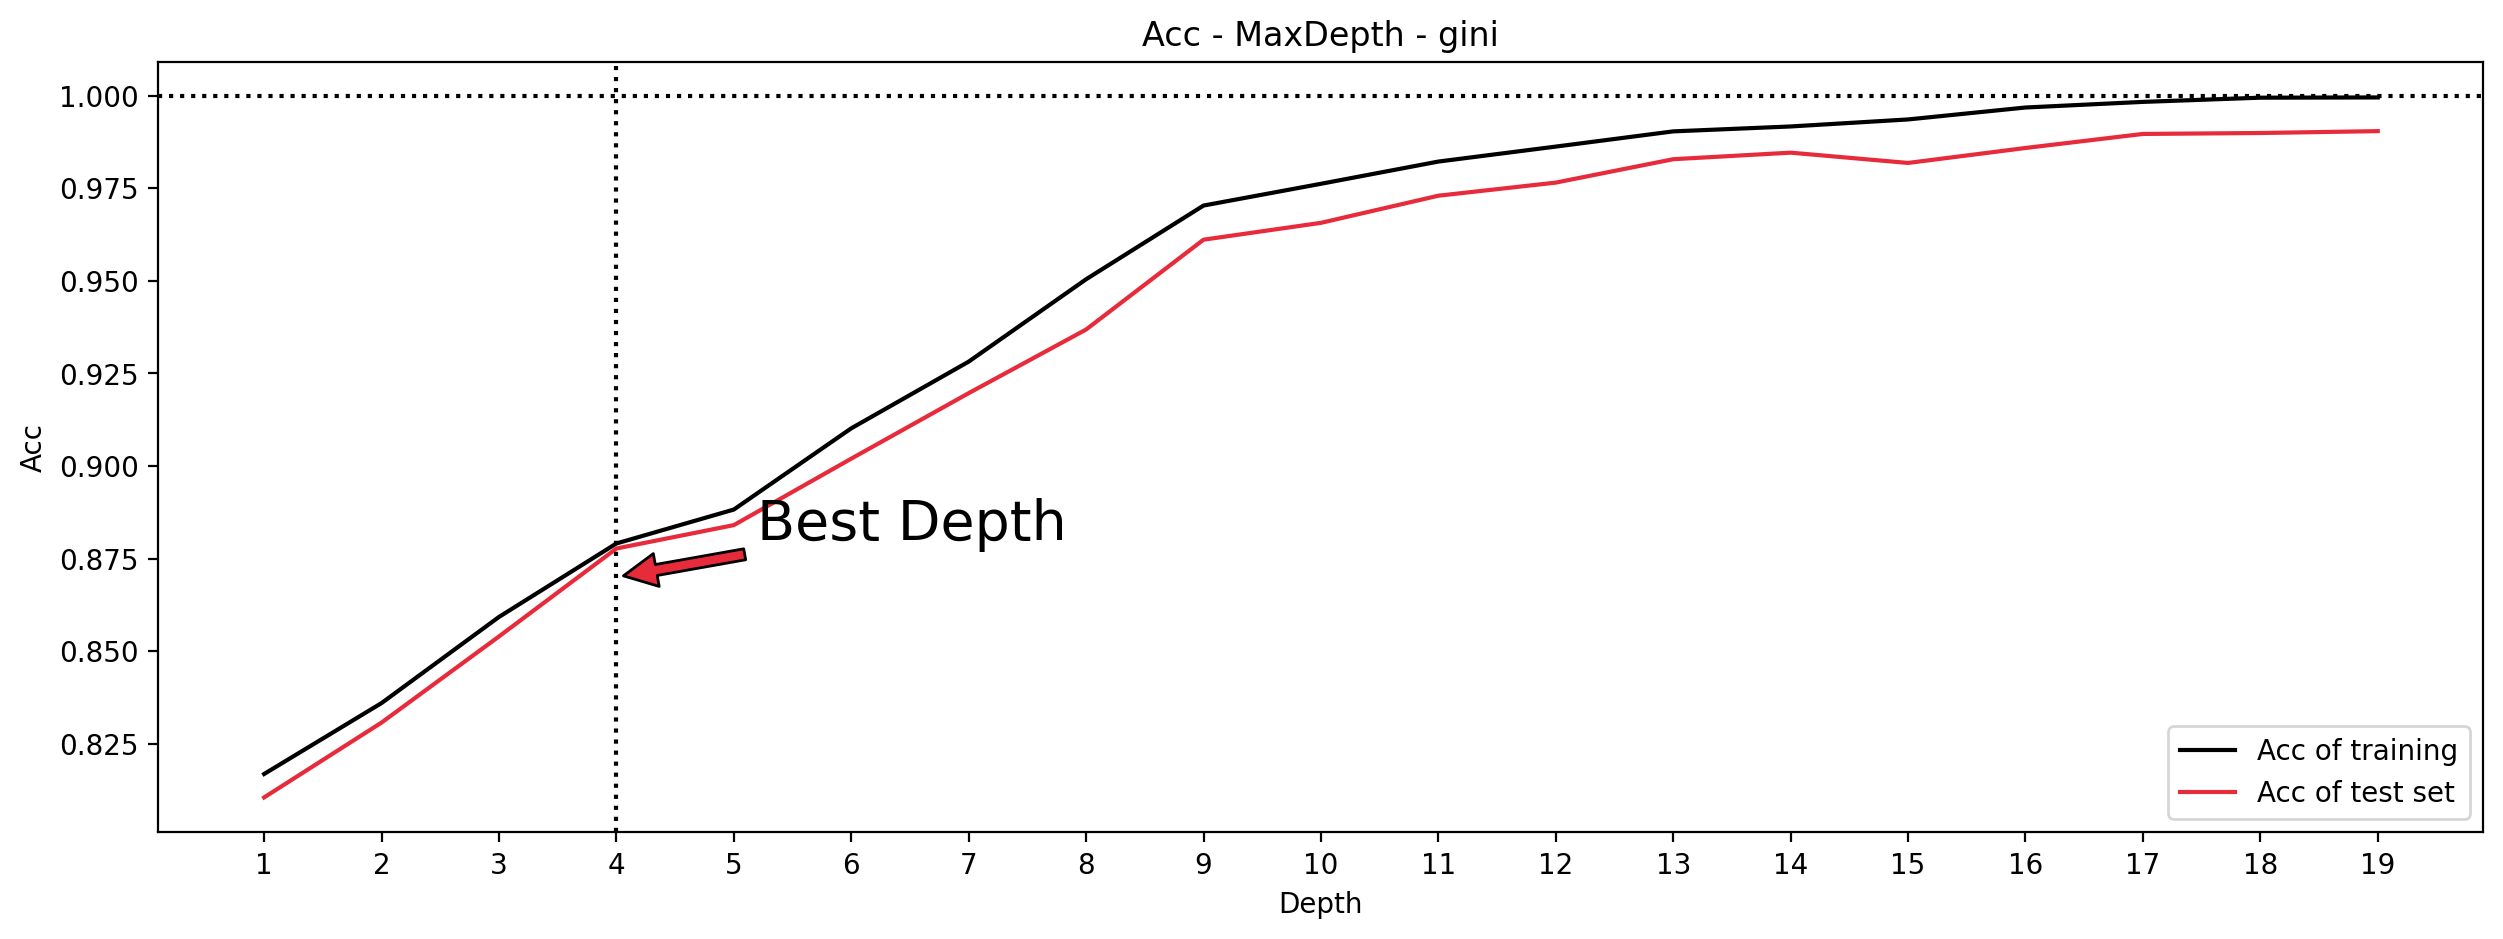

In [76]:
training_acc_7 = []
test_acc_7 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'gini', random_state=40)
    DT.fit (X_train, y_train.ravel())
    training_acc_7.append(DT.score(X_train,y_train))
    test_acc_7.append(DT.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(max_depth, training_acc_7, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_7, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - gini')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(4,0.87),xytext=(5.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =4, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [77]:
clf_7 = DecisionTreeClassifier(max_depth = 4 , criterion= 'gini', random_state=40)
clf_7.fit(X_train, y_train.ravel())
y_pred_7 = clf_7.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_7))

Accuracy 0.8777160181910055


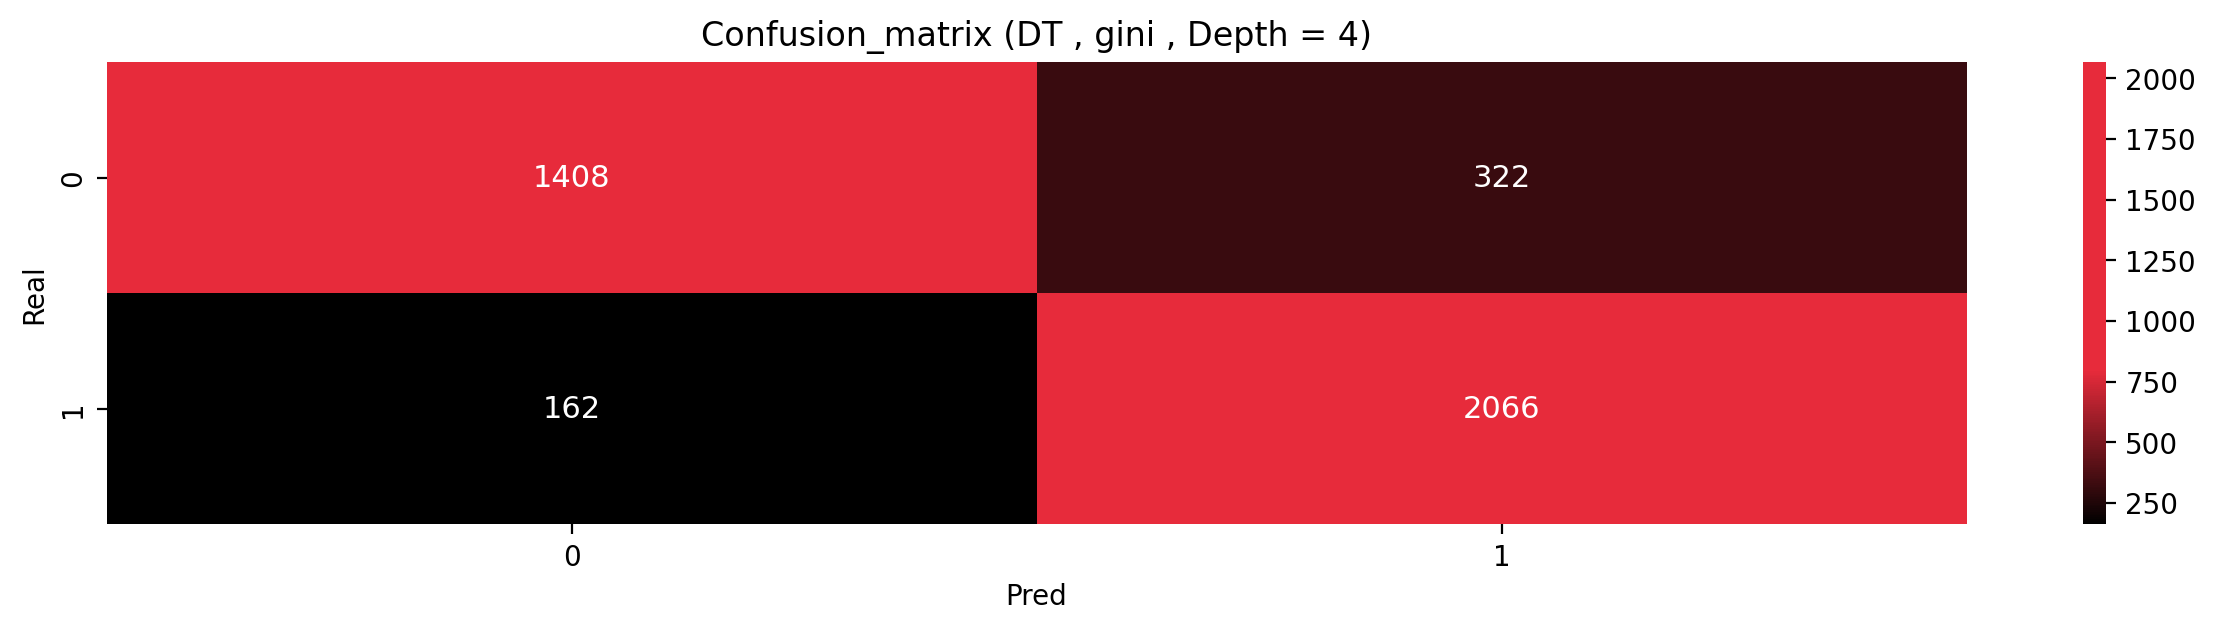

In [78]:
conf_matrix_7 = confusion_matrix(y_test, y_pred_7)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , gini , Depth = 4)")
annot = np.array([[f"{conf_matrix_7[0, 0]}", f"{conf_matrix_7[0, 1]}"],
                  [f"{conf_matrix_7[1, 0]}", f"{conf_matrix_7[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_7,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

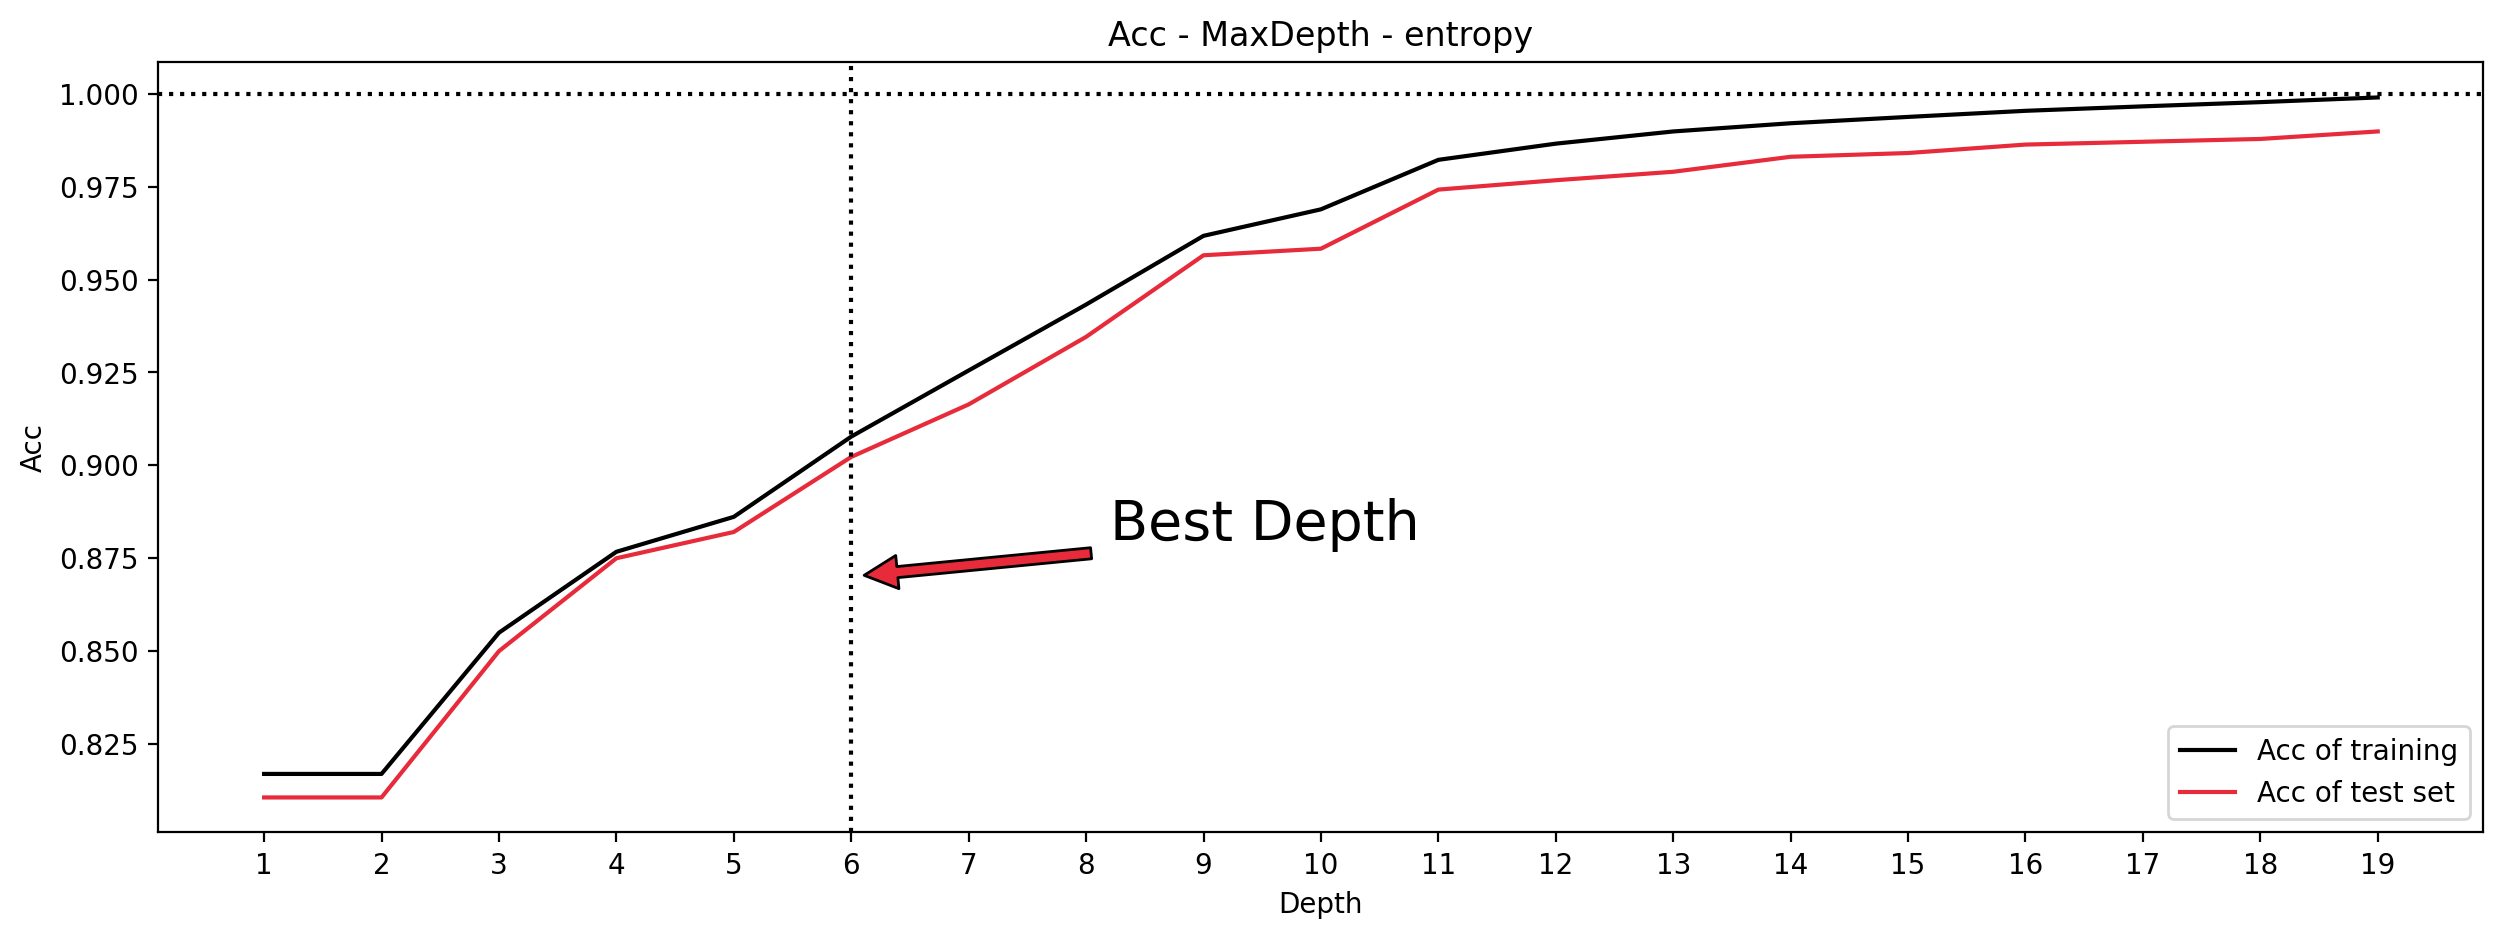

In [79]:
training_acc_8 = []
test_acc_8 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'entropy', random_state=5)
    DT.fit (X_train, y_train.ravel())
    training_acc_8.append(DT.score(X_train,y_train))
    test_acc_8.append(DT.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(max_depth, training_acc_8, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_8, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - entropy')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(6,0.87),xytext=(8.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =6, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [80]:
clf_8 = DecisionTreeClassifier(max_depth = 6, criterion= 'entropy', random_state=5)
clf_8.fit(X_train, y_train.ravel())
y_pred_8 = clf_8.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_8))
Best_DT = metrics.accuracy_score(y_test,y_pred_8)

Accuracy 0.9022233451237999


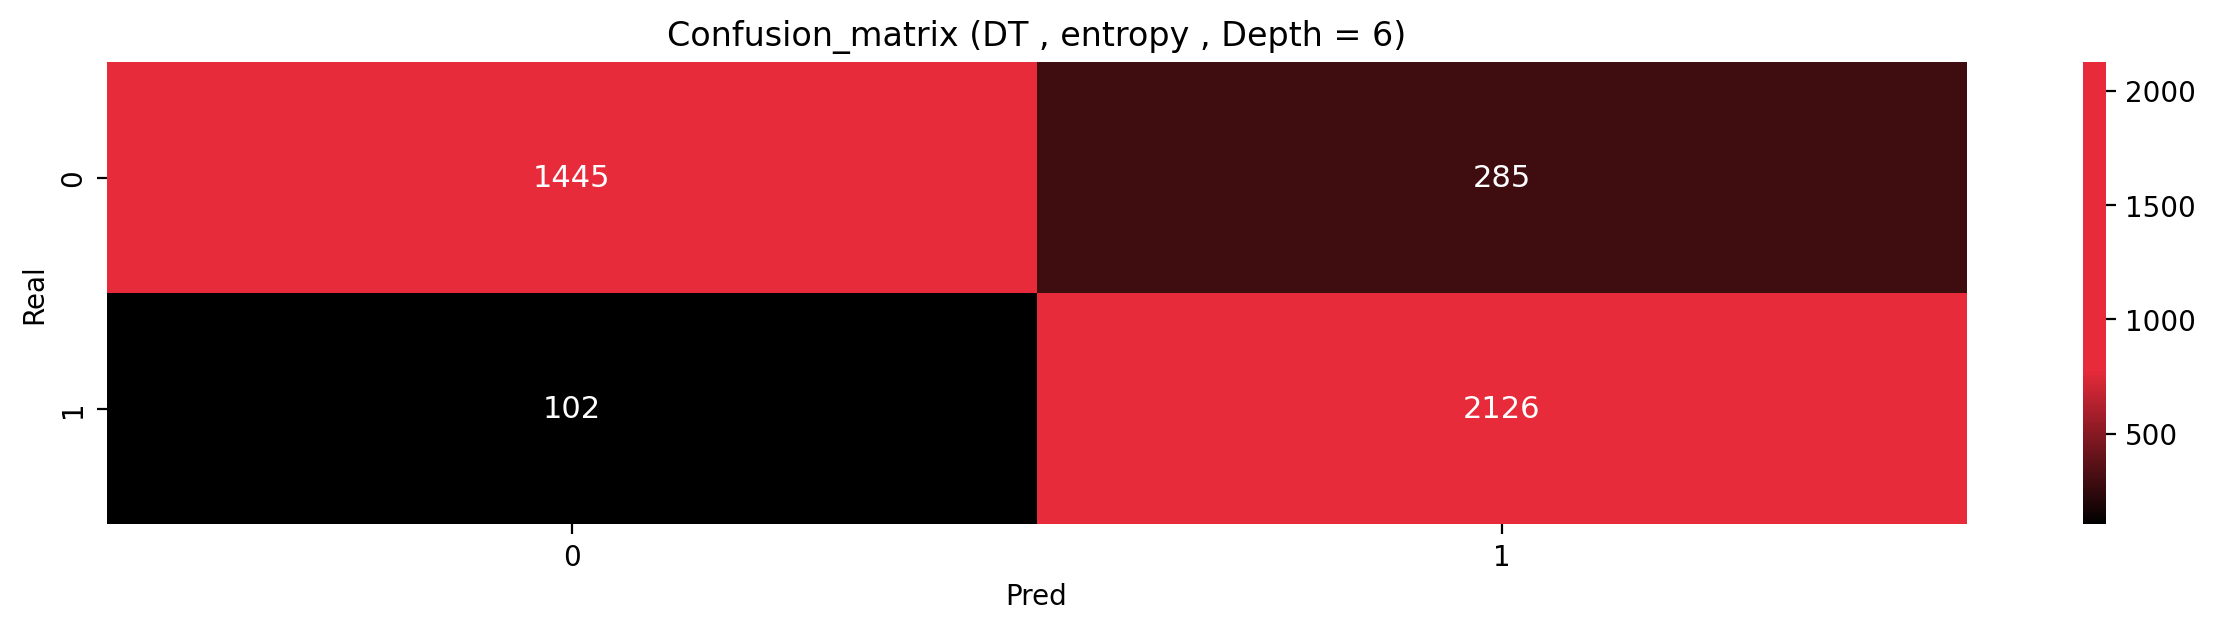

In [81]:
conf_matrix_8 = confusion_matrix(y_test, y_pred_8)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , entropy , Depth = 6)")
annot = np.array([[f"{conf_matrix_8[0, 0]}", f"{conf_matrix_8[0, 1]}"],
                  [f"{conf_matrix_8[1, 0]}", f"{conf_matrix_8[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_8,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

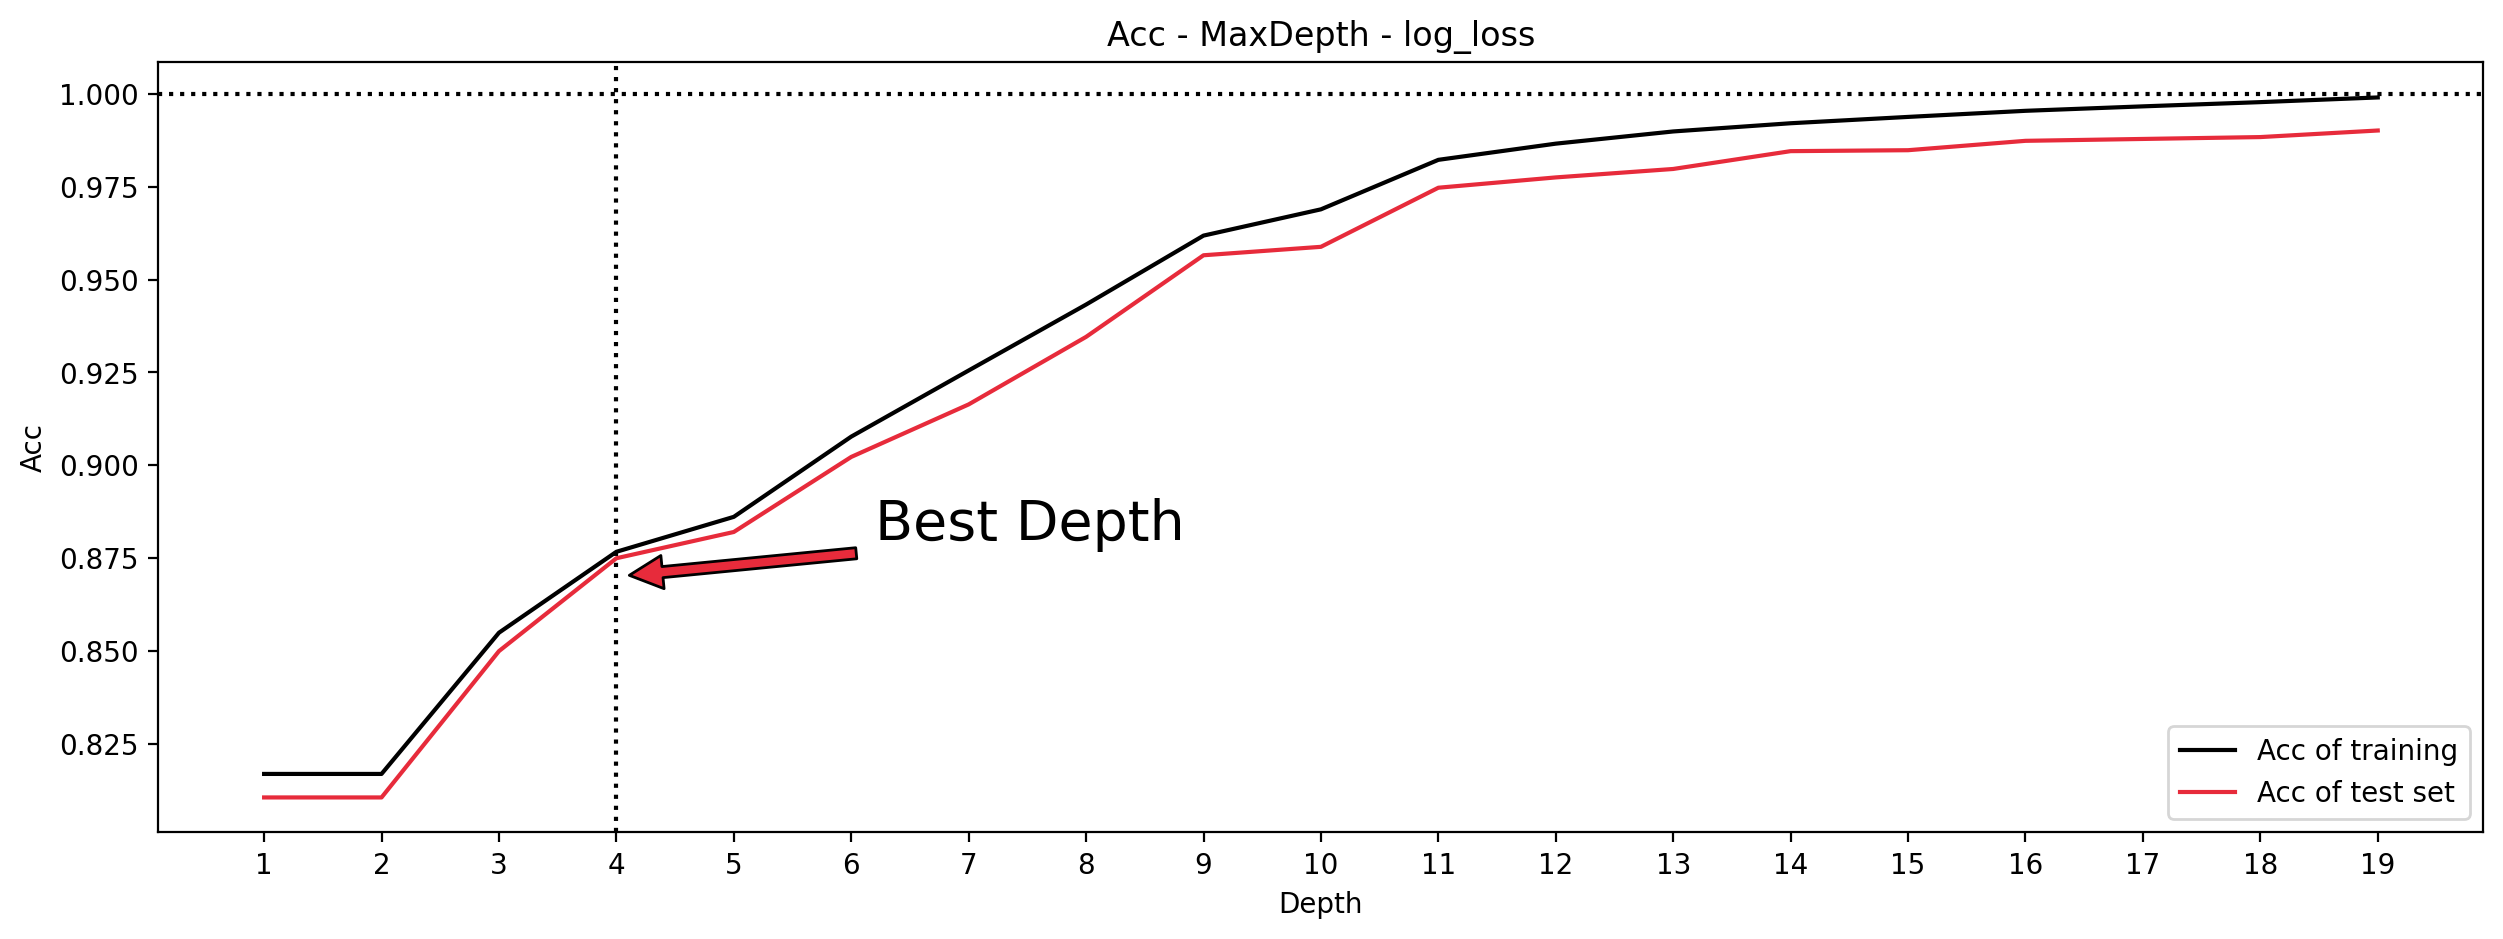

In [82]:
training_acc_9 = []
test_acc_9 = []

max_depth = range(1,20)
#Criterion = gini, entropy, log_loss

for depth in max_depth:
    DT = DecisionTreeClassifier(max_depth= depth, criterion= 'log_loss', random_state=4)
    DT.fit (X_train, y_train.ravel())
    training_acc_9.append(DT.score(X_train,y_train))
    test_acc_9.append(DT.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(max_depth, training_acc_9, label='Acc of training', color= 'black')
plt.plot(max_depth, test_acc_9, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Depth')
plt.title('Acc - MaxDepth - log_loss')
plt.legend()
plt.xticks(range(1,20))
plt.annotate('Best Depth', xy=(4,0.87),xytext=(6.2,0.88), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =4, linestyle= 'dotted', c= 'black')
plt.axhline(y =1, linestyle= 'dotted', c= 'black')
plt.show();

In [83]:
clf_9 = DecisionTreeClassifier(max_depth = 4, criterion= 'log_loss', random_state=4)
clf_9.fit(X_train, y_train.ravel())
y_pred_9 = clf_9.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_9))

Accuracy 0.8749368367862557


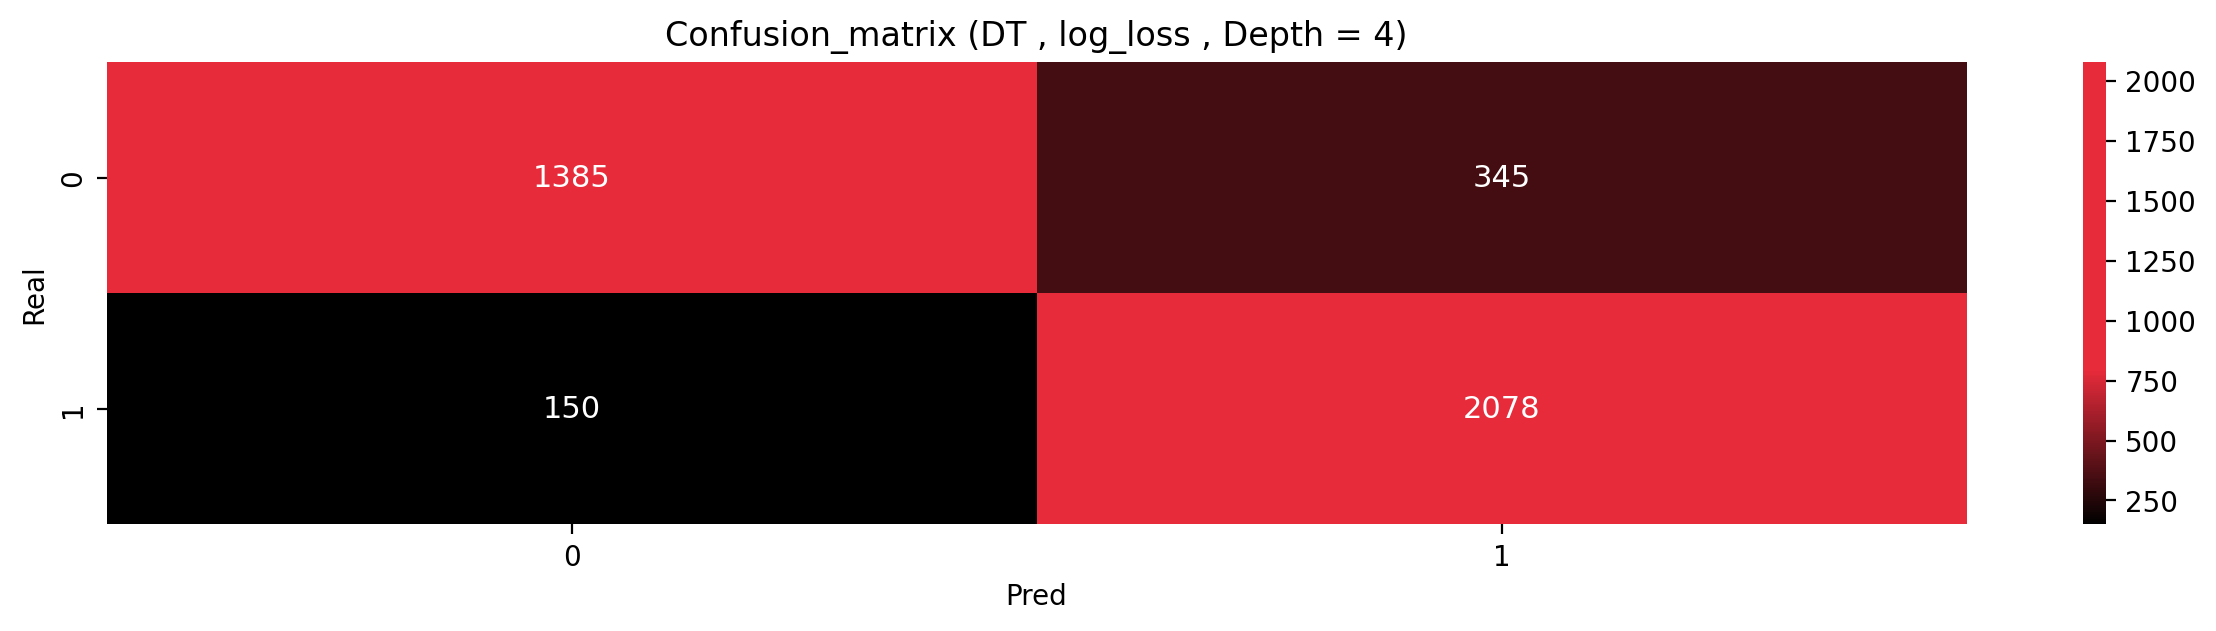

In [84]:
conf_matrix_9 = confusion_matrix(y_test, y_pred_9)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (DT , log_loss , Depth = 4)")
annot = np.array([[f"{conf_matrix_9[0, 0]}", f"{conf_matrix_9[0, 1]}"],
                  [f"{conf_matrix_9[1, 0]}", f"{conf_matrix_9[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_9,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [85]:
print(Back.RED +color.BOLD+ "Classification report for clf_7 (DT, criterion = gini, Depth = 4):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_7.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_8 (DT, criterion = entropy, Depth = 6):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_8.predict(X_train)))
print(Back.RED +color.BOLD+ "Classification report for clf_9 (DT, criterion = log_loss, Depth = 4):"+ Back.RESET+ color.END)
print(classification_report(y_train, clf_9.predict(X_train)))

Classification report for clf_7 (DT, criterion = gini, Depth = 4):
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      7098
           1       0.87      0.92      0.89      8730

    accuracy                           0.88     15828
   macro avg       0.88      0.87      0.88     15828
weighted avg       0.88      0.88      0.88     15828

Classification report for clf_8 (DT, criterion = entropy, Depth = 6):
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      7098
           1       0.89      0.95      0.92      8730

    accuracy                           0.91     15828
   macro avg       0.91      0.90      0.91     15828
weighted avg       0.91      0.91      0.91     15828

Classification report for clf_9 (DT, criterion = log_loss, Depth = 4):
              precision    recall  f1-score   support

           0       0.91      0.81      0.85      7098
           1       0.86      

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Decision Trees + tune hyperparameters**

  - The fourth algorithm is Random Forest. In RF, I consider the range of number of estimators "10 - 100" and Criterions "gini and entropy" as the hyperparameters for change. Then, I compare all of the results and scores and finally chose the best one.
    



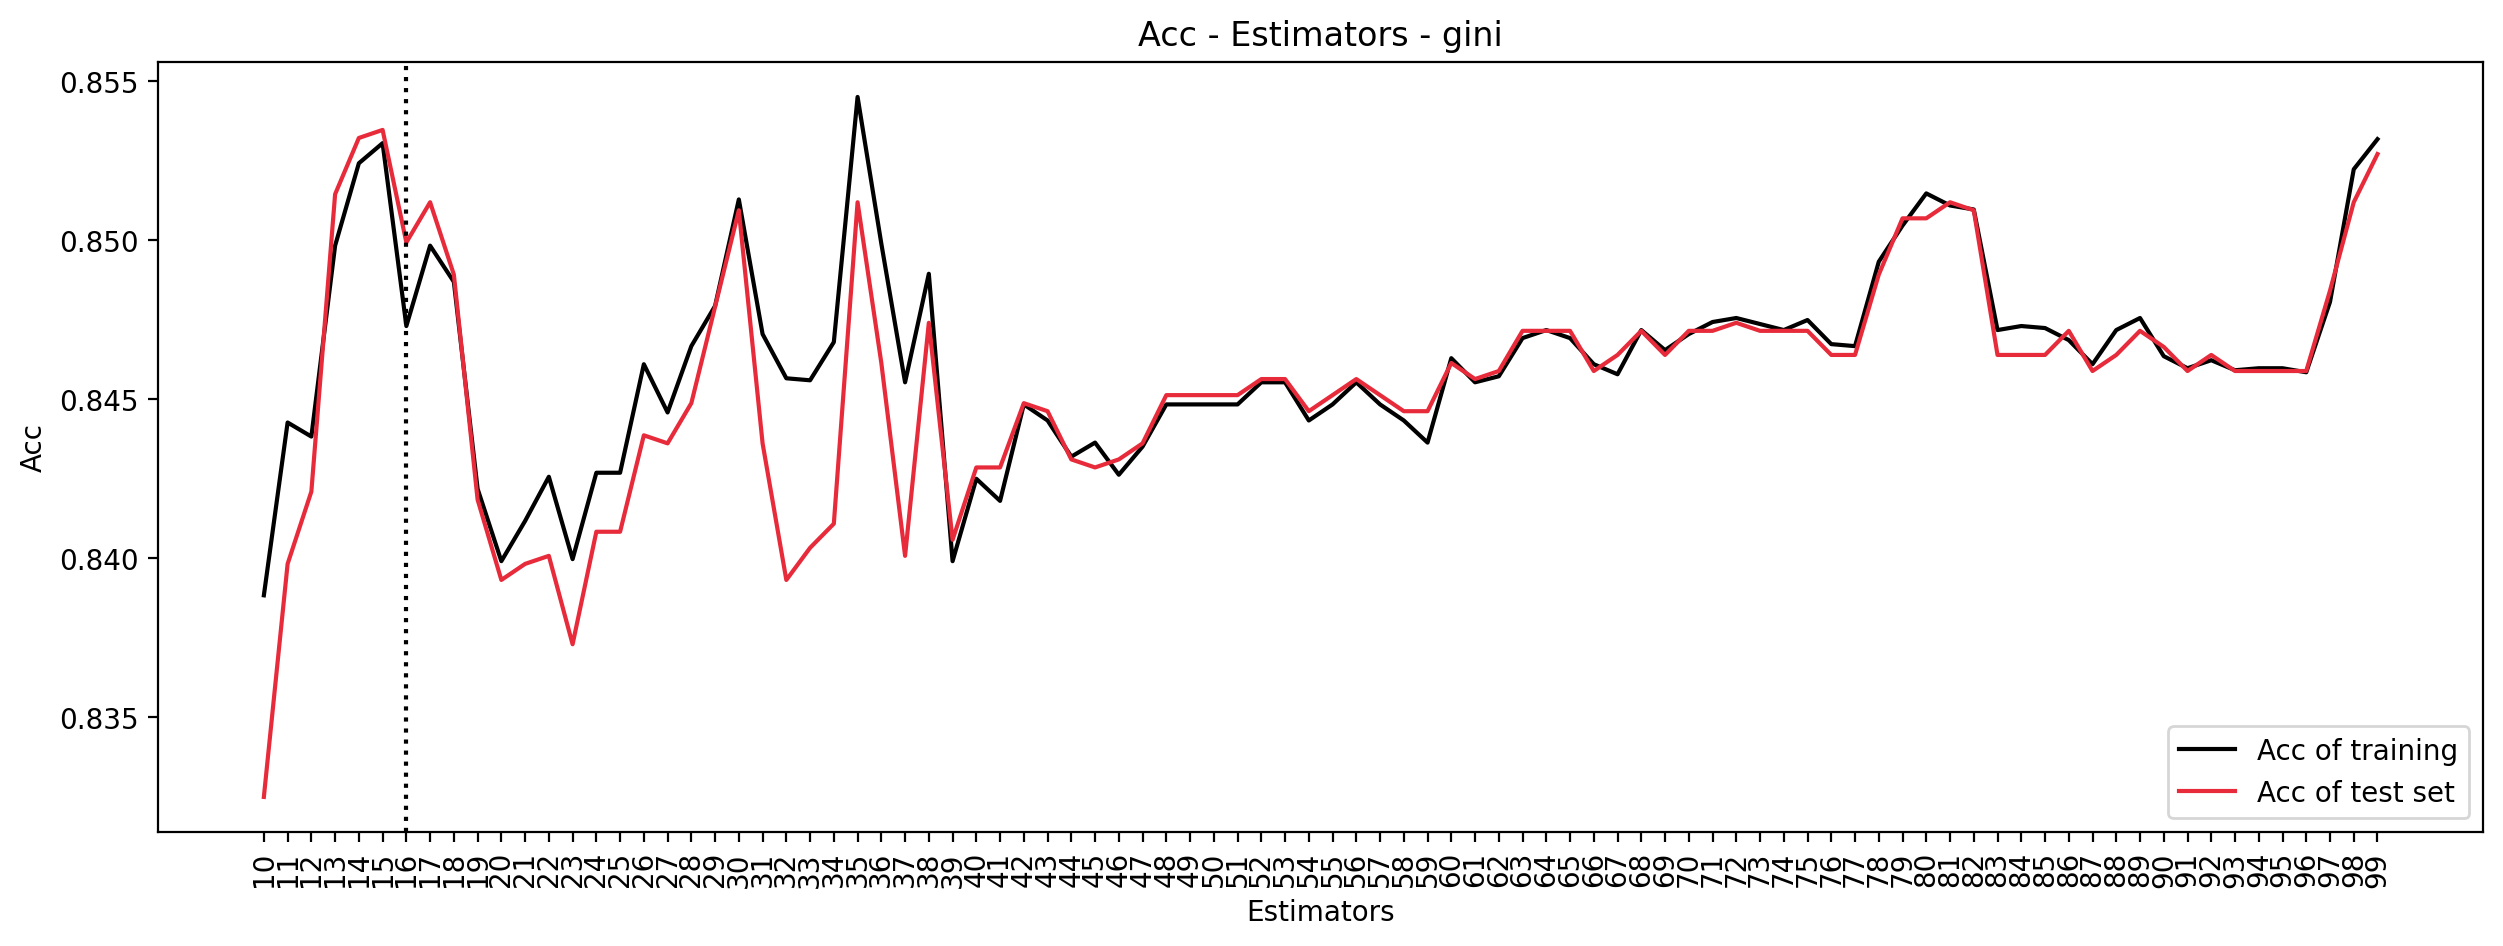

In [86]:
training_acc_10 = []
test_acc_10 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'gini', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_10.append(RF.score(X_train,y_train))
    test_acc_10.append(RF.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(n_estimators, training_acc_10, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_10, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - gini')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

In [87]:
clf_10 = RandomForestClassifier(max_depth = 2, criterion= 'gini', random_state=40, n_estimators= 16)
clf_10.fit(X_train, y_train.ravel())
y_pred_10 = clf_10.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_10))
Best_RF = metrics.accuracy_score(y_test,y_pred_10)

Accuracy 0.8499242041435068


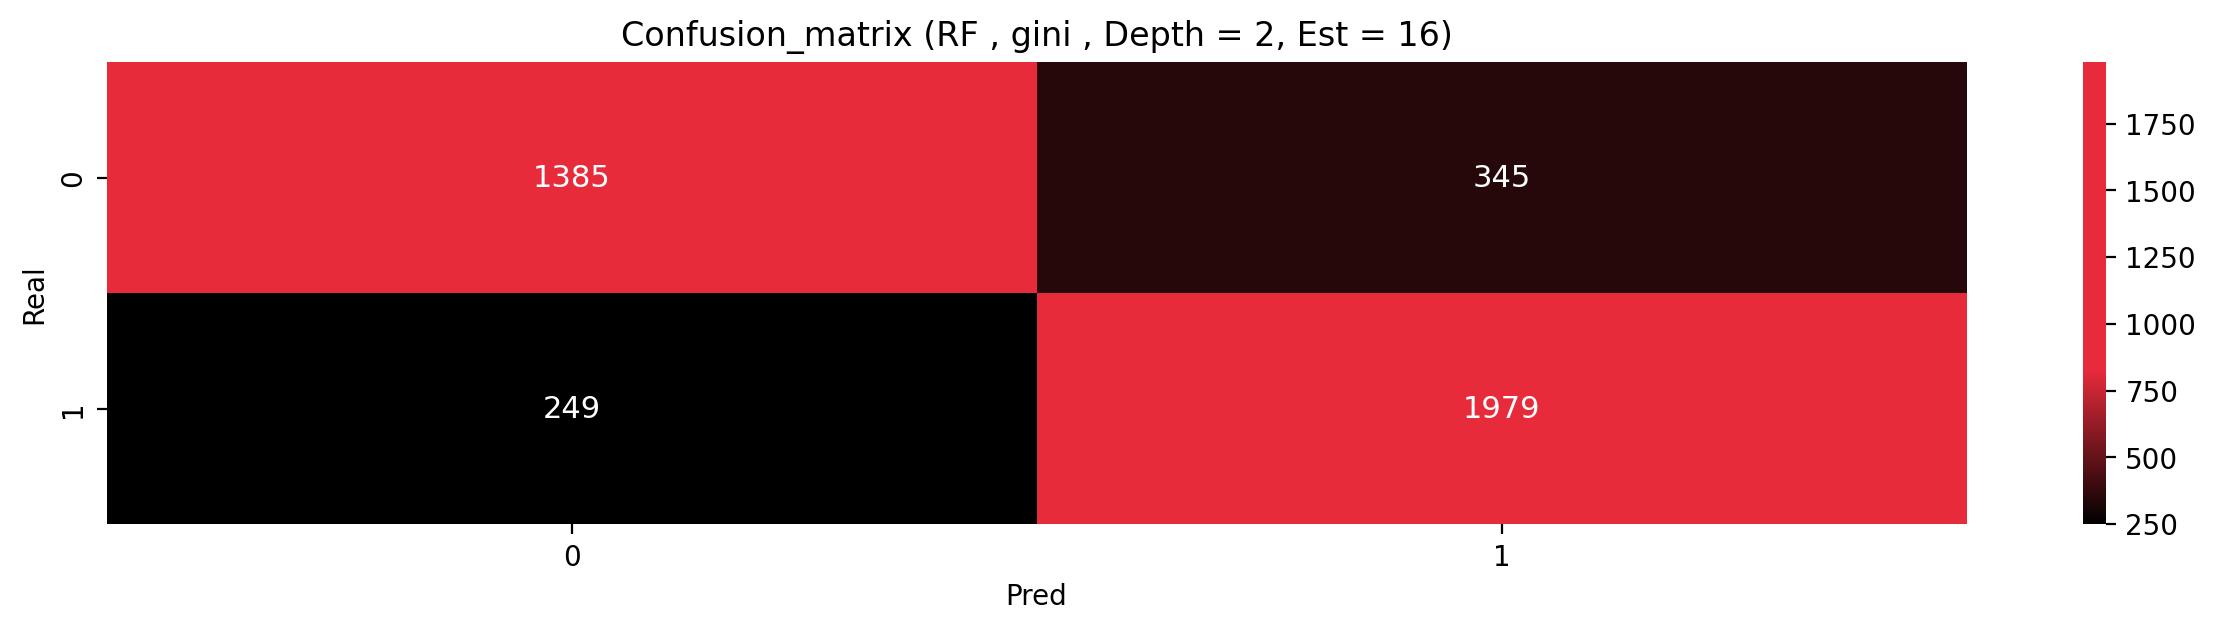

In [88]:
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , gini , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_10[0, 0]}", f"{conf_matrix_10[0, 1]}"],
                  [f"{conf_matrix_10[1, 0]}", f"{conf_matrix_10[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_10,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

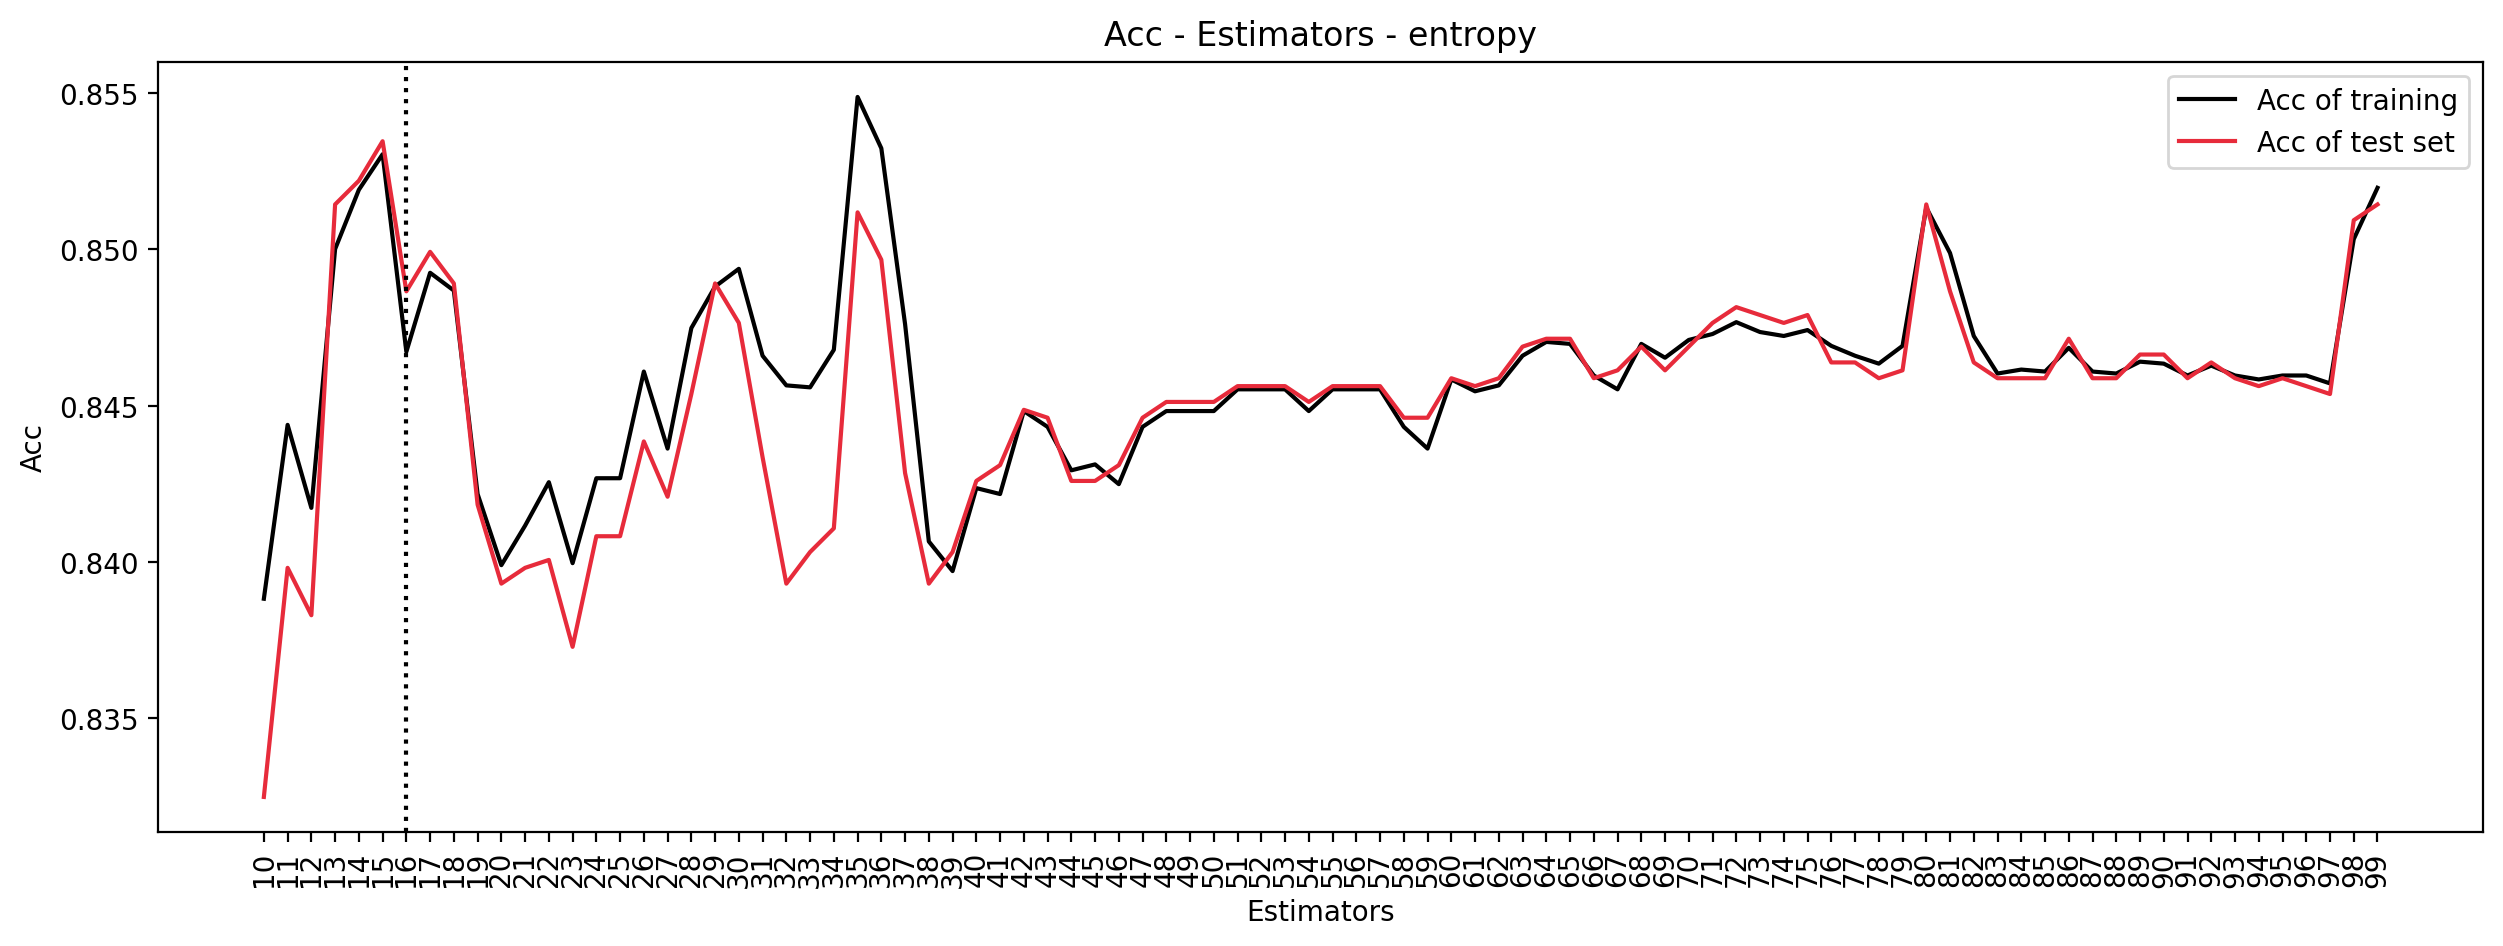

In [89]:
training_acc_11 = []
test_acc_11 = []

n_estimators = range(10,100)
#Criterion = gini, entropy

for estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators= estimator, criterion= 'entropy', random_state=40, max_depth= 2)
    RF.fit (X_train, y_train.ravel())
    training_acc_11.append(RF.score(X_train,y_train))
    test_acc_11.append(RF.score(X_test, y_test))


plt.figure(figsize=(15,5), dpi=200)
plt.plot(n_estimators, training_acc_11, label='Acc of training', color= 'black')
plt.plot(n_estimators, test_acc_11, label='Acc of test set', color= '#E72B3B')
plt.ylabel('Acc')
plt.xlabel('Estimators')
plt.title('Acc - Estimators - entropy')
plt.legend()
plt.xticks(range(10,100), rotation=90)
plt.annotate('Best Estimator', xy=(16,0.83),xytext=(20.2,0.81), arrowprops=dict(facecolor='#E72B3B', shrink=0.05),fontsize=20)
plt.axvline(x =16, linestyle= 'dotted', c= 'black')
plt.show();

In [90]:
clf_11 = RandomForestClassifier(max_depth = 2, criterion= 'entropy', random_state=40, n_estimators= 16)
clf_11.fit(X_train, y_train.ravel())
y_pred_11 = clf_11.predict(X_test)
print("Accuracy", metrics.accuracy_score(y_test,y_pred_11))

Accuracy 0.8486609398686206


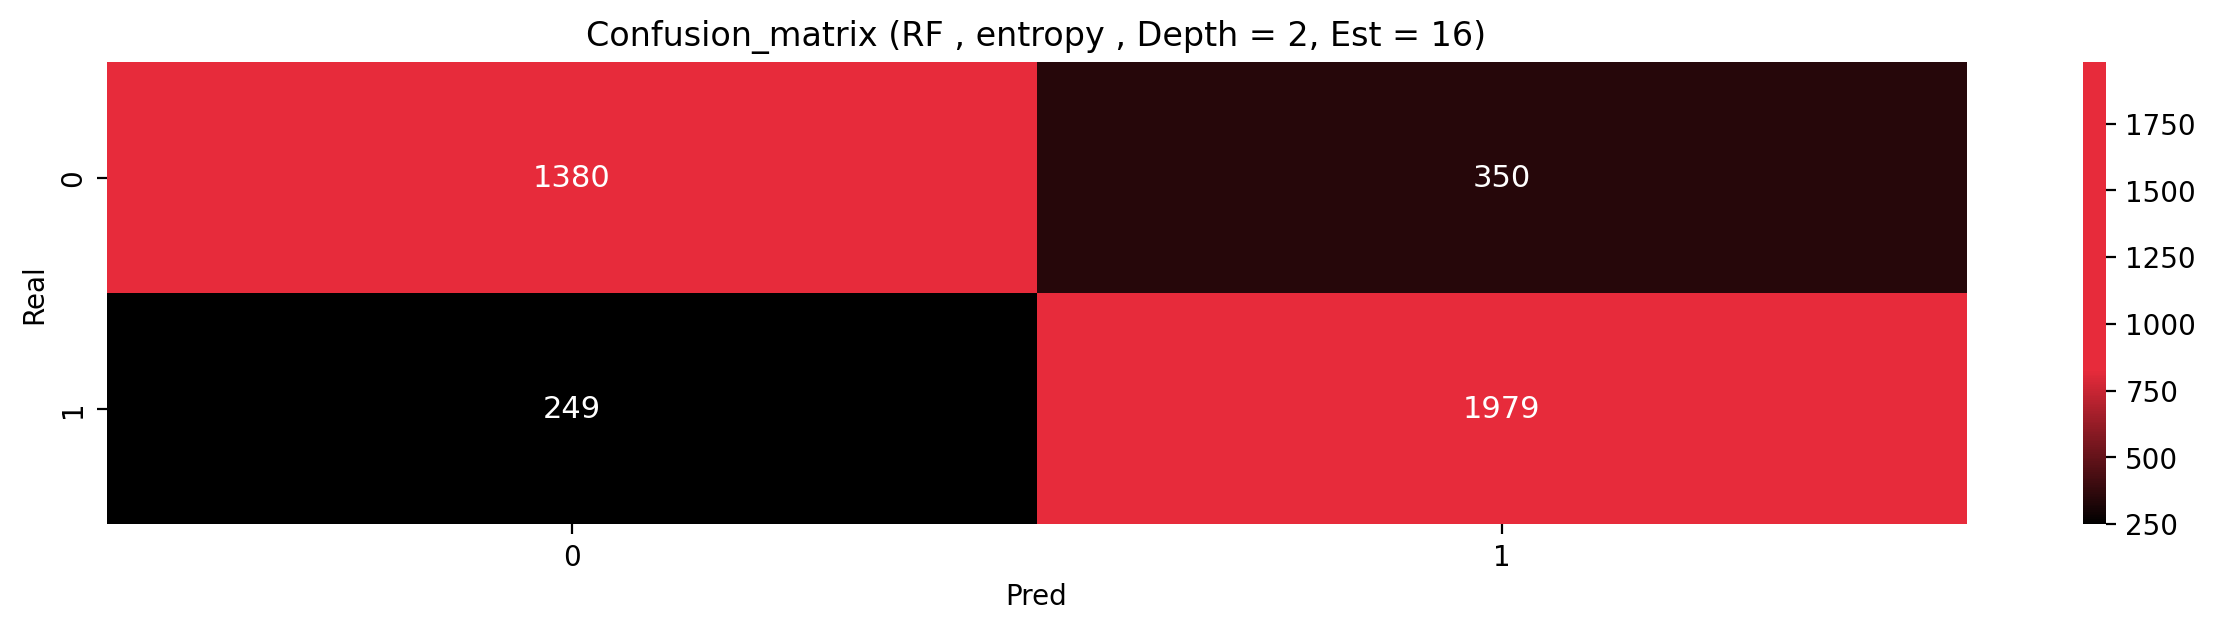

In [91]:
conf_matrix_11 = confusion_matrix(y_test, y_pred_11)

colors = ["black", "#E72B3B", "#E72B3B", "#E72B3B"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
fig = plt.figure(figsize=(15, 3), dpi=200)
ax = plt.subplot()
plt.title("Confusion_matrix (RF , entropy , Depth = 2, Est = 16)")
annot = np.array([[f"{conf_matrix_11[0, 0]}", f"{conf_matrix_11[0, 1]}"],
                  [f"{conf_matrix_11[1, 0]}", f"{conf_matrix_11[1, 1]}"]], dtype=object)

sns.heatmap(conf_matrix_11,
            annot=annot,
            annot_kws={"size": 11},
            ax=ax,
            fmt='',
            cmap=cmap,
            cbar=True,
            )
plt.xlabel("Pred")
plt.ylabel("Real")
plt.show()

In [92]:
print(Back.RED +color.BOLD+ "Classification report for clf_10 (RF, criterion = gini, Depth = 2, N_Estimators = 16):"
      + Back.RESET+ color.END)
print(classification_report(y_train, clf_10.predict(X_train)))
print(Back.RED +color.BOLD +"Classification report for clf_11 (RF, criterion = entropy, Depth = 2, N_Estimators = 16):"
      + Back.RESET+ color.END)
print(classification_report(y_train, clf_11.predict(X_train)))

Classification report for clf_10 (RF, criterion = gini, Depth = 2, N_Estimators = 16):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      7098
           1       0.85      0.88      0.86      8730

    accuracy                           0.85     15828
   macro avg       0.85      0.84      0.84     15828
weighted avg       0.85      0.85      0.85     15828

Classification report for clf_11 (RF, criterion = entropy, Depth = 2, N_Estimators = 16):
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      7098
           1       0.85      0.88      0.86      8730

    accuracy                           0.85     15828
   macro avg       0.85      0.84      0.84     15828
weighted avg       0.85      0.85      0.85     15828



<a id="6"></a>
# <p style="padding:10px;background-color:black ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Conclusion</p>

* **[Table of Content](#0)**

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>




  - As mentioned before, The samples in this dataset are really few. Because of that, Random forest and Decision trees didn't work well on this dataset. Instead of that, SVM and KNN worked well. So let's take a quick view on the comparison between each algorithm.
    



In [135]:
Best_models = pd.DataFrame({'Best_models_acc': [Best_DT, Best_knn, Best_RF, Best_SVM],
               'Best_models_name': ('Decision tree', 'KNN', 'Random Forest','SVM'  )})
Best_models.sort_values(by='Best_models_acc',ascending=False ,inplace = True)
Best_models

Best_models_acc Best_models_name
1         0.984083              KNN
0         0.902223    Decision tree
3         0.862304              SVM
2         0.849924    Random Forest

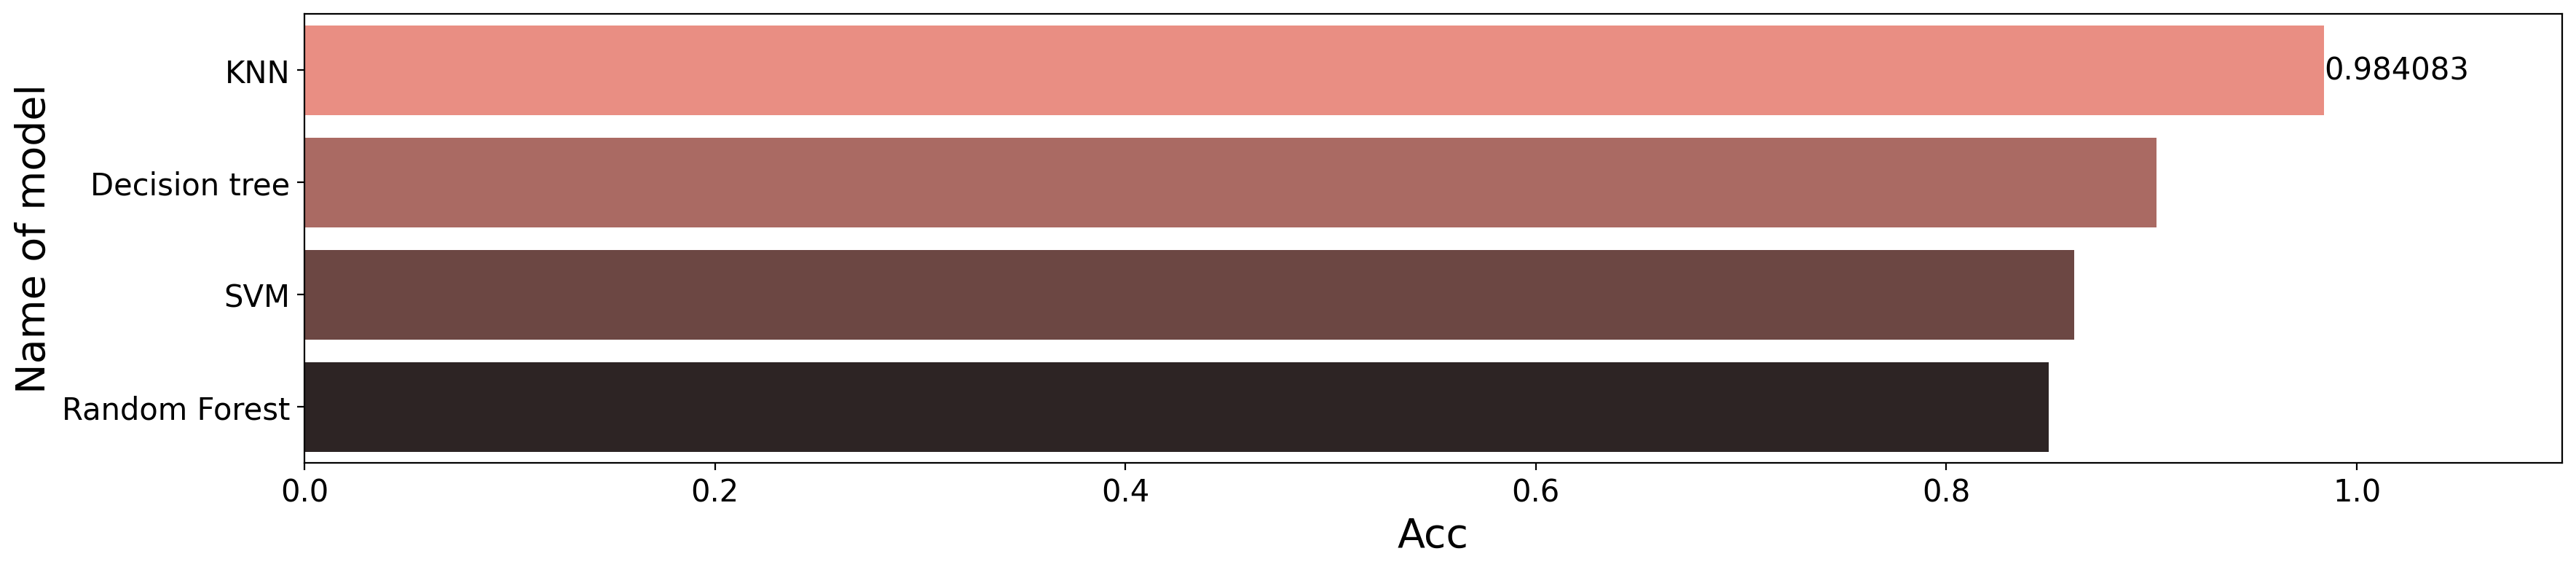

In [94]:
plt.figure(figsize=(20,4),dpi=200)
ax = sns.barplot(x= Best_models['Best_models_acc'], y= Best_models['Best_models_name'], palette="dark:salmon_r")
ax.bar_label(ax.containers[0],fontsize=15)
plt.xlabel("Acc",fontsize=20)
plt.ylabel("Name of model", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlim([0, 1.1])
plt.show()

In [119]:
%%writefile heartdisease.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ------------------------------ Data Functions ------------------------------
@st.cache_data
def load_data():
    df = pd.read_csv("/content/heart_disease_final_filled.csv")
    return df

def get_target_column(df):
    for col in df.columns:
        if 'target' in col.lower() or 'output' in col.lower():
            return col
    return None

def preprocess_data(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=0.3, random_state=42), scaler, X.columns

def train_models(X_train, X_test, y_train, y_test):
    models = {
        'SVM': SVC(probability=True),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results[name] = {"model": model, "accuracy": acc}
    return results

# ------------------------------ Streamlit App ------------------------------
def main():
    st.set_page_config(page_title="Heart Disease Prediction", layout="centered")
    st.title("🫀 Heart Disease Prediction App")

    # Load and preprocess data
    df = load_data()
    target_col = get_target_column(df)

    if not target_col:
        st.error("Target column not found. Ensure dataset has a column named 'target' or 'output'.")
        return

    st.subheader("🔍 Data Preview")
    st.dataframe(df.head())

    # Correlation Heatmap
    st.subheader("📊 Correlation Heatmap")
    fig, ax = plt.subplots()
    sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm', ax=ax)
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.select_dtypes(include=[float, int]).corr()  # compute correlation only on numeric data
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)  # keep only numeric columns
    sns.heatmap(numeric_df.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm', ax=ax)
    st.pyplot(fig)

    # Preprocess and Train Models
    (X_train, X_test, y_train, y_test), scaler, feature_cols = preprocess_data(df, target_col)
    results = train_models(X_train, X_test, y_train, y_test)

    st.subheader("📈 Model Accuracy")
    for name, res in results.items():
        st.markdown(f"**{name}**: {res['accuracy']*100:.2f}%")

    st.markdown("---")
    st.subheader("🧠 Predict Heart Disease from User Input")

    user_data = {}
    col1, col2 = st.columns(2)
    for i, feature in enumerate(feature_cols):
        with (col1 if i % 2 == 0 else col2):
            user_data[feature] = st.number_input(f"{feature}", value=float(df[feature].mean()))

    user_input_df = pd.DataFrame([user_data])
    user_input_scaled = scaler.transform(user_input_df)

    selected_model = st.selectbox("Choose a Model", list(results.keys()))
    model = results[selected_model]["model"]

    if st.button("Predict"):
        prediction = model.predict(user_input_scaled)[0]

        # Assuming 'df' is your dataframe
        corr_matrix = df.corr()

        plt.figure(figsize=(12, 10))  # Make the figure bigger
        sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            cbar=True,
            square=True,
            linewidths=0.5,
            annot_kws={"size":8})  # Smaller annotation size

        plt.xticks(rotation=45, ha='right')  # Rotate x labels
        plt.yticks(rotation=0)               # Keep y labels horizontal
        plt.title("Correlation Heatmap", fontsize=16)
        plt.tight_layout()
        plt.show()


        # Show prediction result
        if prediction == 1:
            st.error("⚠️ The model predicts that this person MAY have heart disease.")
        else:
            st.success("✅ The model predicts NO heart disease.")

        # Show prediction probabilities
        try:
            if hasattr(model, "predict_proba"):
                proba = model.predict_proba(user_input_scaled)[0]
                st.subheader("🧮 Prediction Probabilities")
                fig, ax = plt.subplots()
                ax.bar(["No Disease (0)", "Disease (1)"], proba, color=['green', 'red'])
                ax.set_ylabel("Probability")
                ax.set_ylim([0, 1])
                st.pyplot(fig)
            else:
                st.info("This model does not support probability predictions.")
        except Exception as e:
            st.warning(f"Could not generate prediction chart: {e}")

# ------------------------------
if __name__ == '__main__':
    main()


Overwriting heartdisease.py


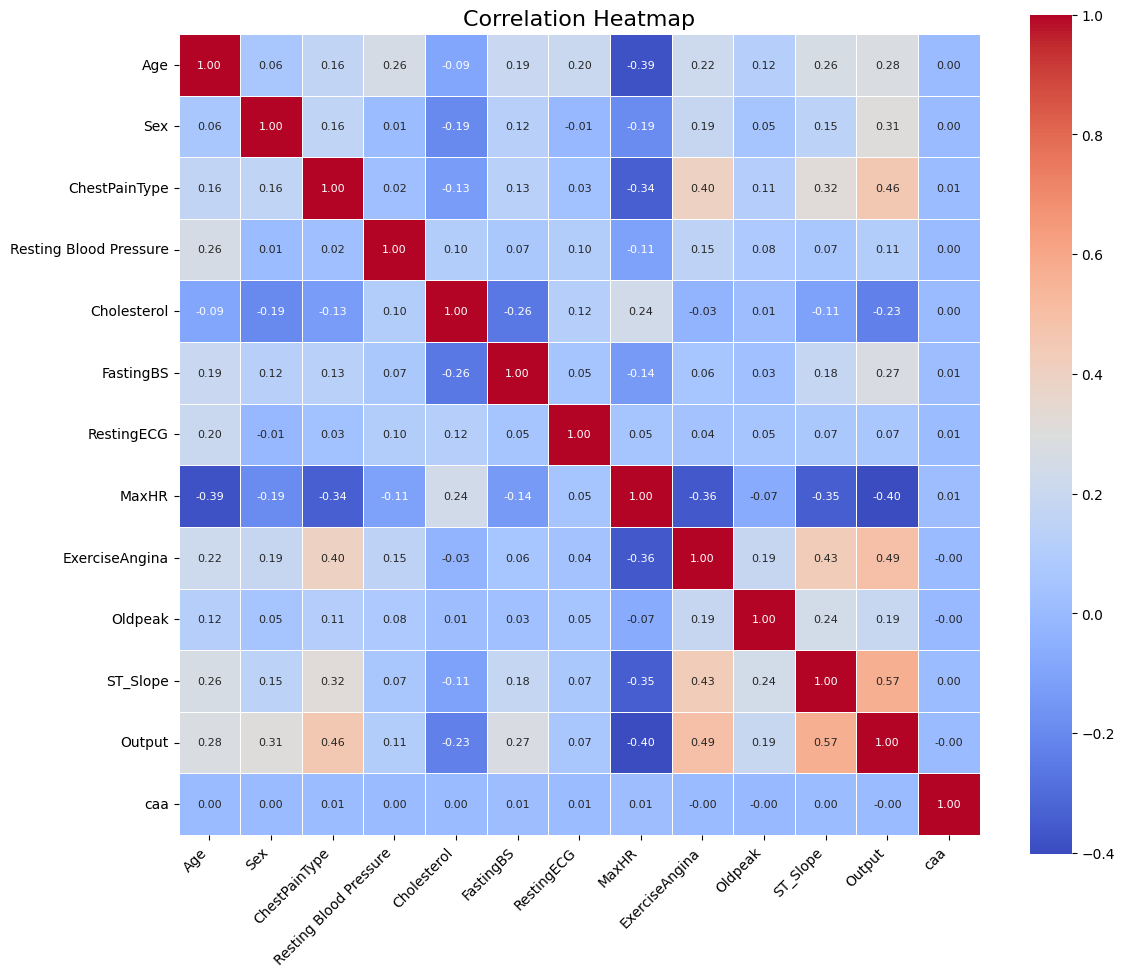

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your dataframe
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))  # Make the figure bigger
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            cbar=True,
            square=True,
            linewidths=0.5,
            annot_kws={"size":8})  # Smaller annotation size

plt.xticks(rotation=45, ha='right')  # Rotate x labels
plt.yticks(rotation=0)               # Keep y labels horizontal
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


In [130]:
!streamlit run heartdisease.py  &>/content/logs.txt & curl ipv4.icanhazip.com

34.169.113.26


In [131]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧
up to date, audited 23 packages in 1s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠧

In [132]:
!npx localtunnel --port 8501

⠙your url is: https://modern-buttons-strive.loca.lt
^C
